# Introduction
In this case study, we will apply a simplified machine learning workflow in the breast cancer dataset.
this dataset was already cleaned and is ready for data preprocessing, and modelling.

The goal if this study is to create a machine learning model that can help us in understanding and differentiating a malignant and benign tumor.

## Importing the Dataset
The following code below will load the breast cancer dataset from sklearn.datasets and store it in a pandas dataframe with proper column names.

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
# Define the feature matrix and the target vector as NDArray
import pandas as pd
import numpy as np


dataset = pd.DataFrame(
    np.c_[cancer["data"], cancer["target"]],
    columns=np.append(cancer["feature_names"], ["target"])
)

dataset.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

## Data Visualization
Next, we familiarize ourselves with the data by viewing its histogram, ECDF, and correlation plot.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("retina")

colors = ["#334aff","#ae2fe0","#e415bd","#ff289b","#ff4e7f","#ff726b","#ff9361","#ffb066"]
sns.set_palette(sns.color_palette(colors))

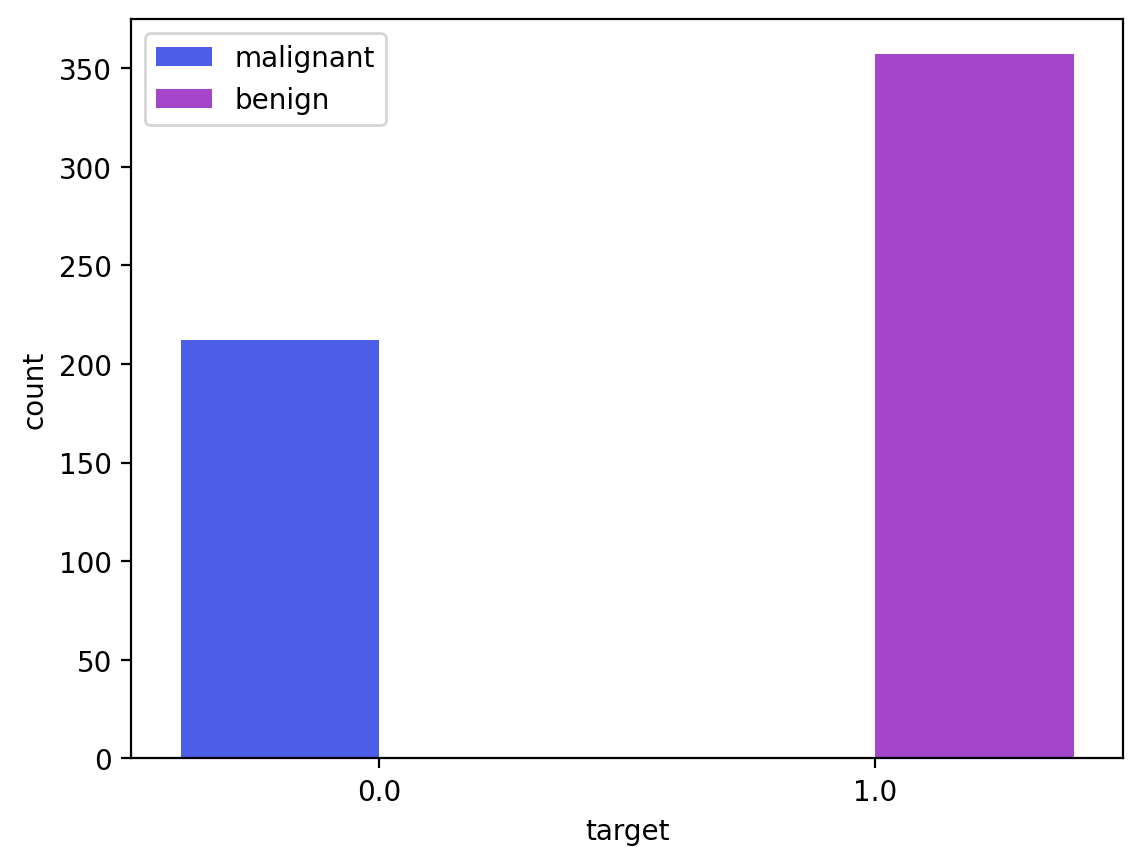

In [17]:
sns.countplot(data=dataset, x="target", hue="target")
plt.legend(labels=cancer["target_names"])

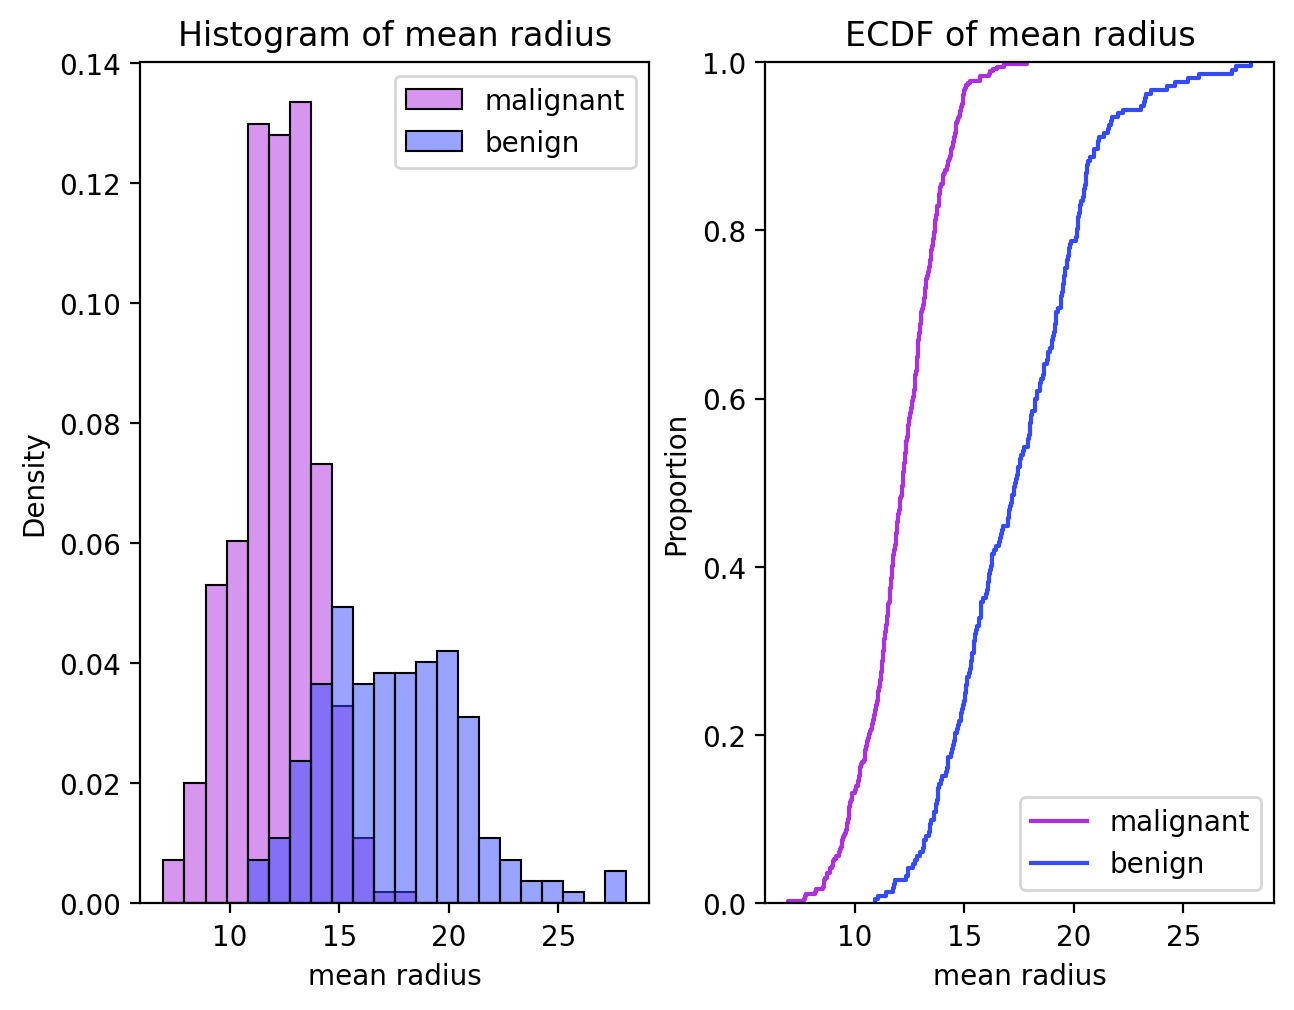

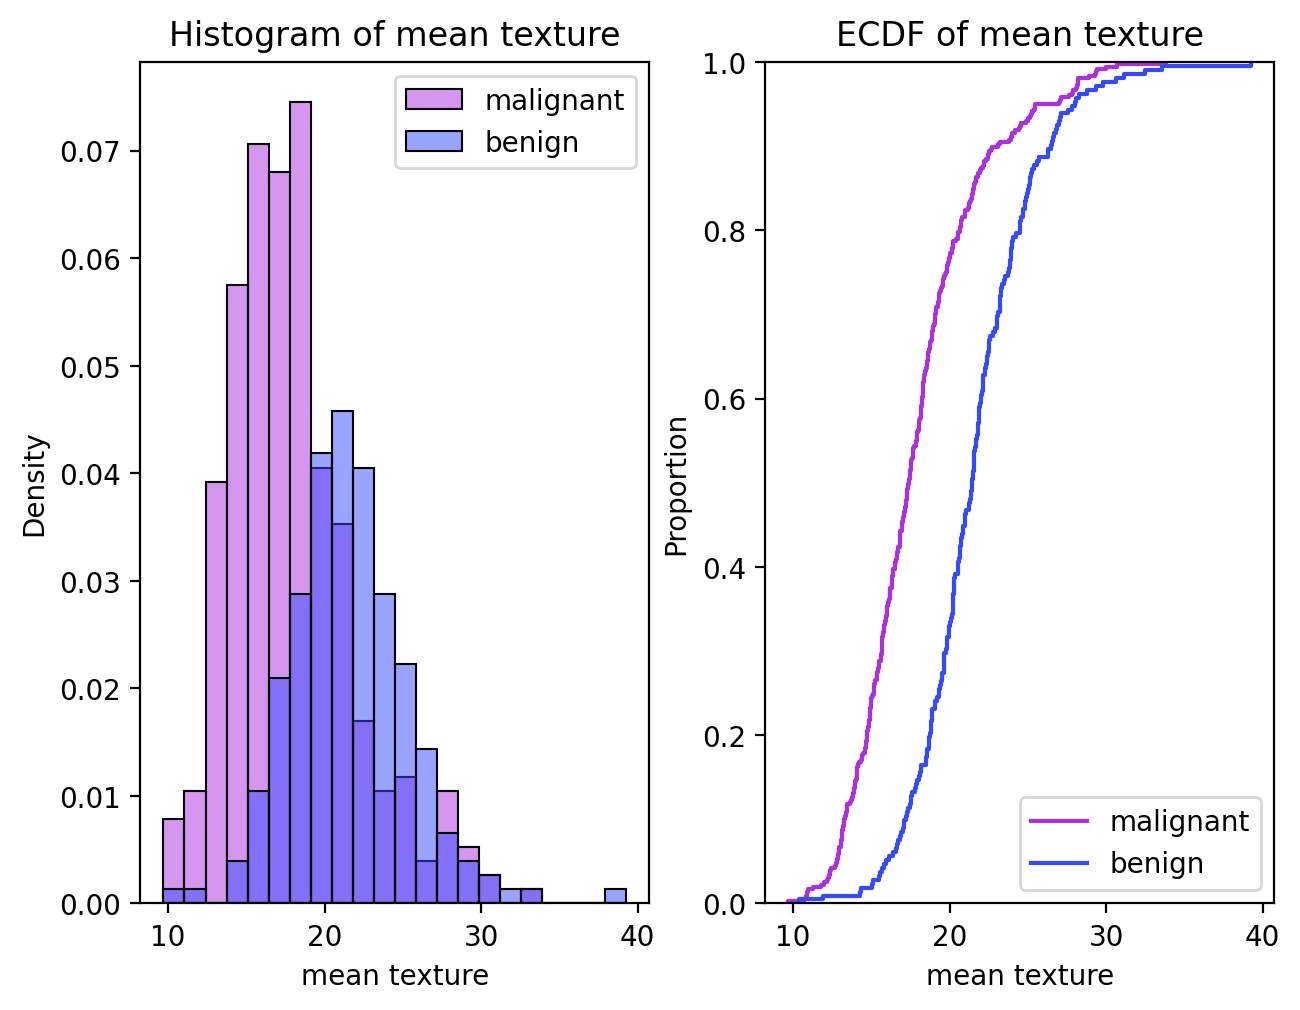

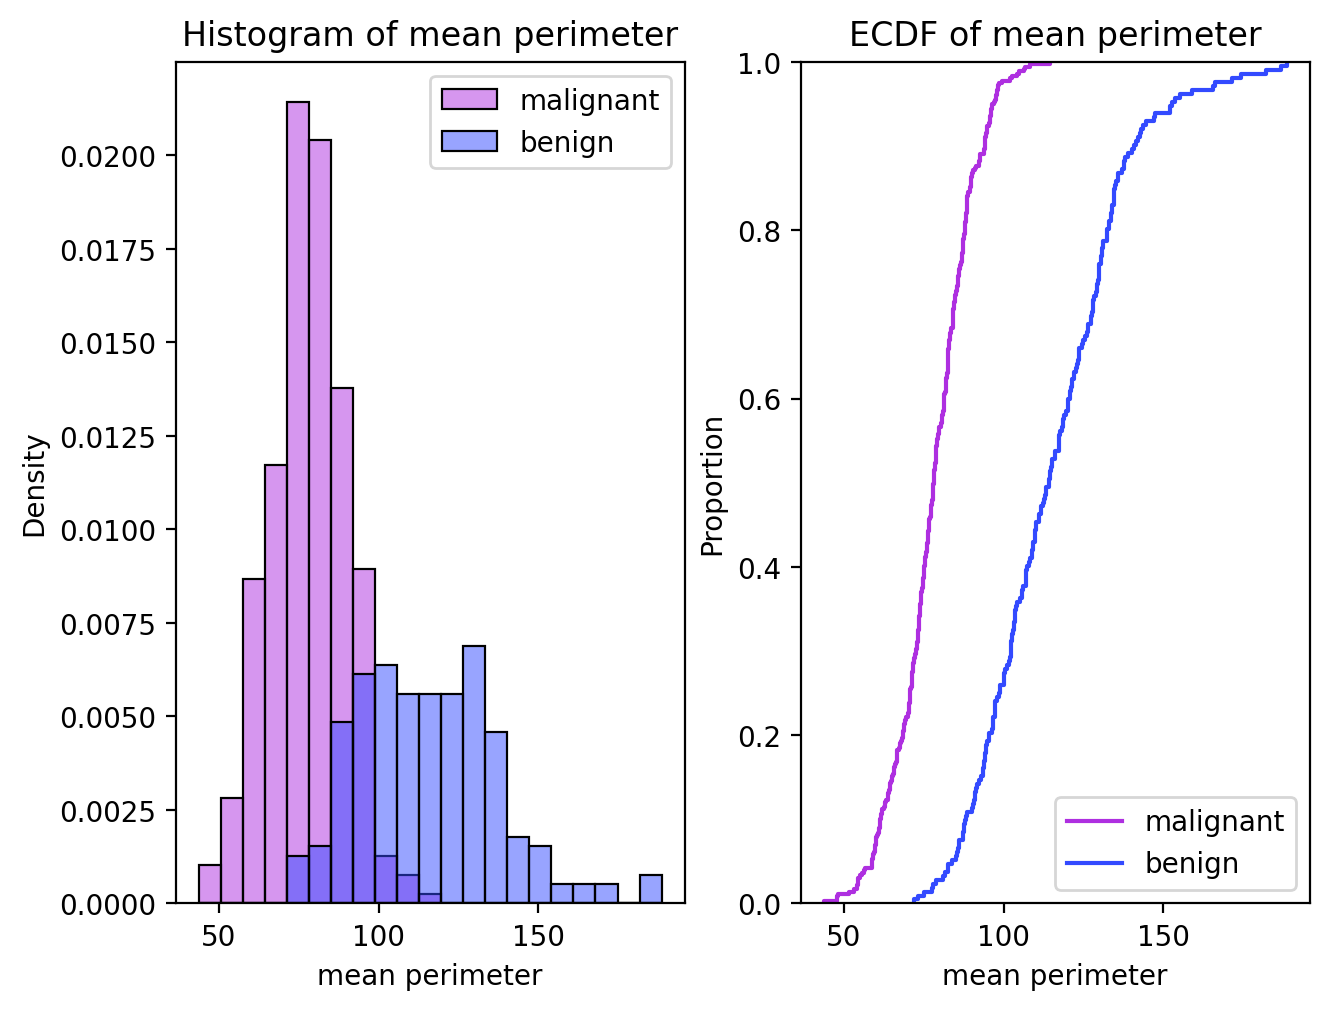

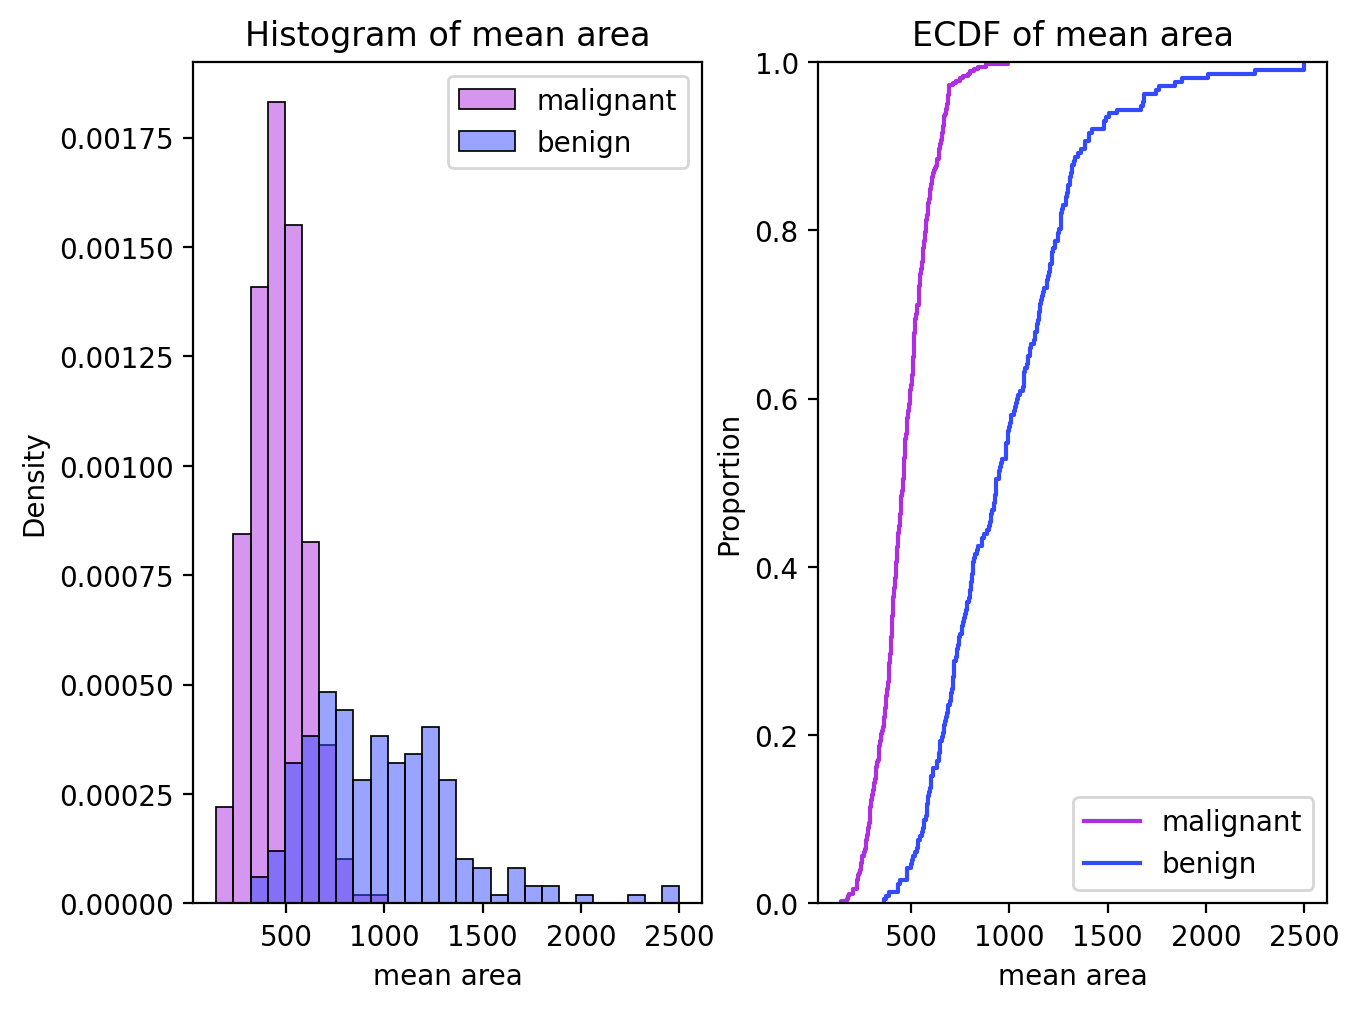

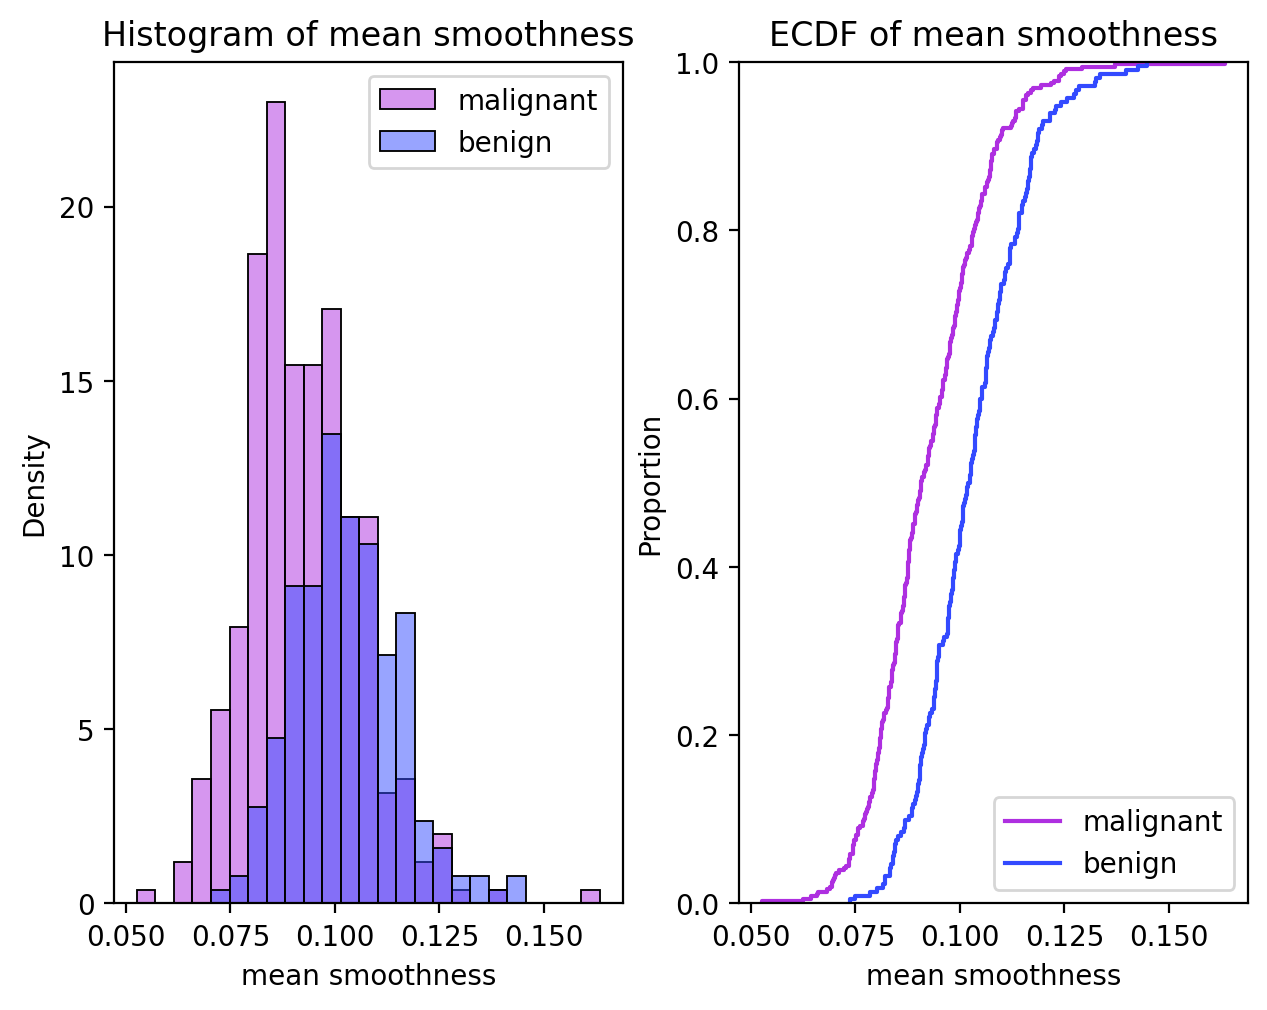

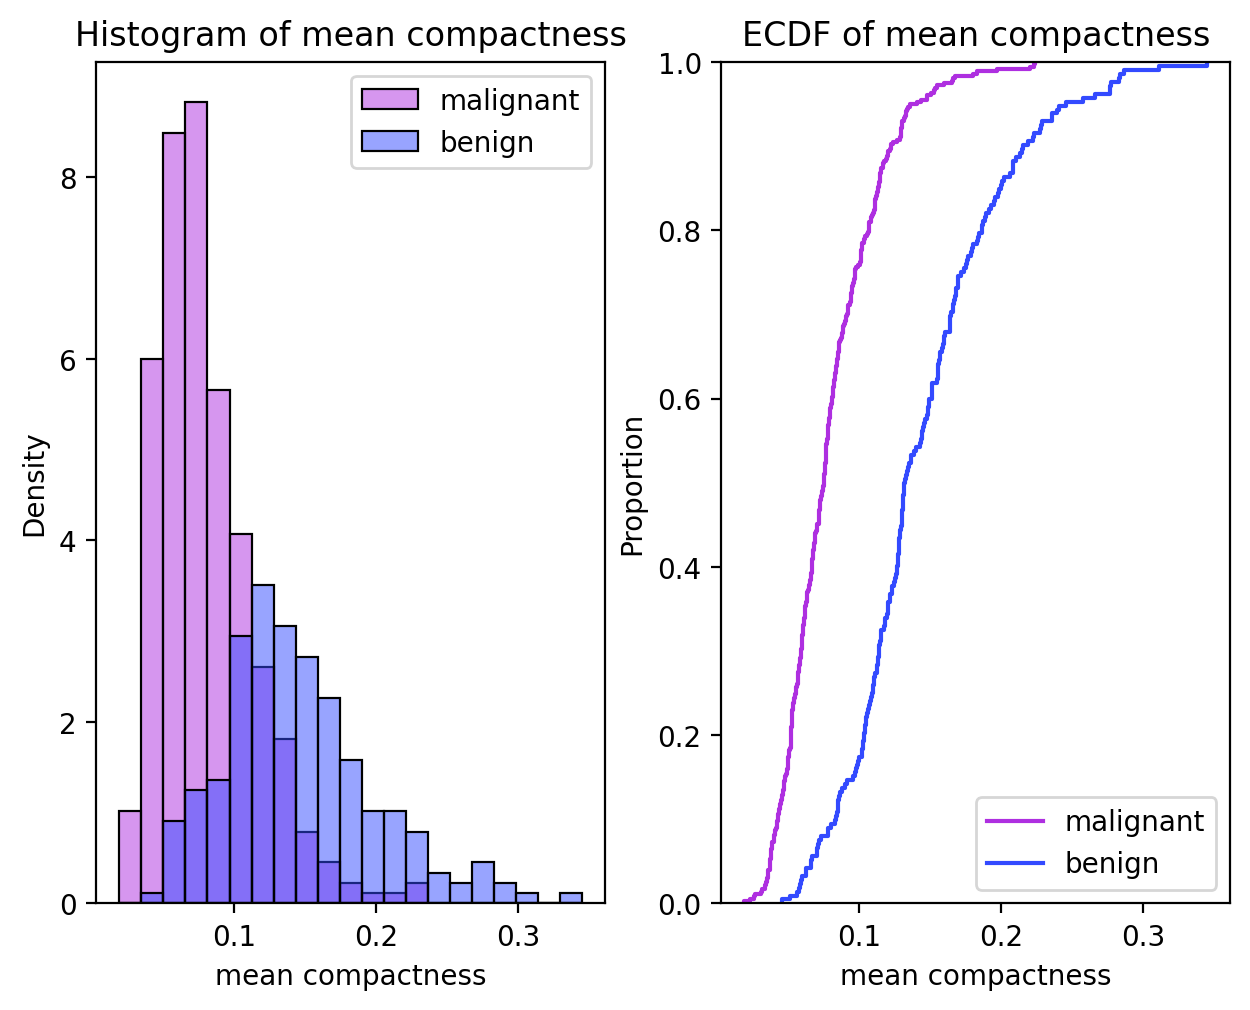

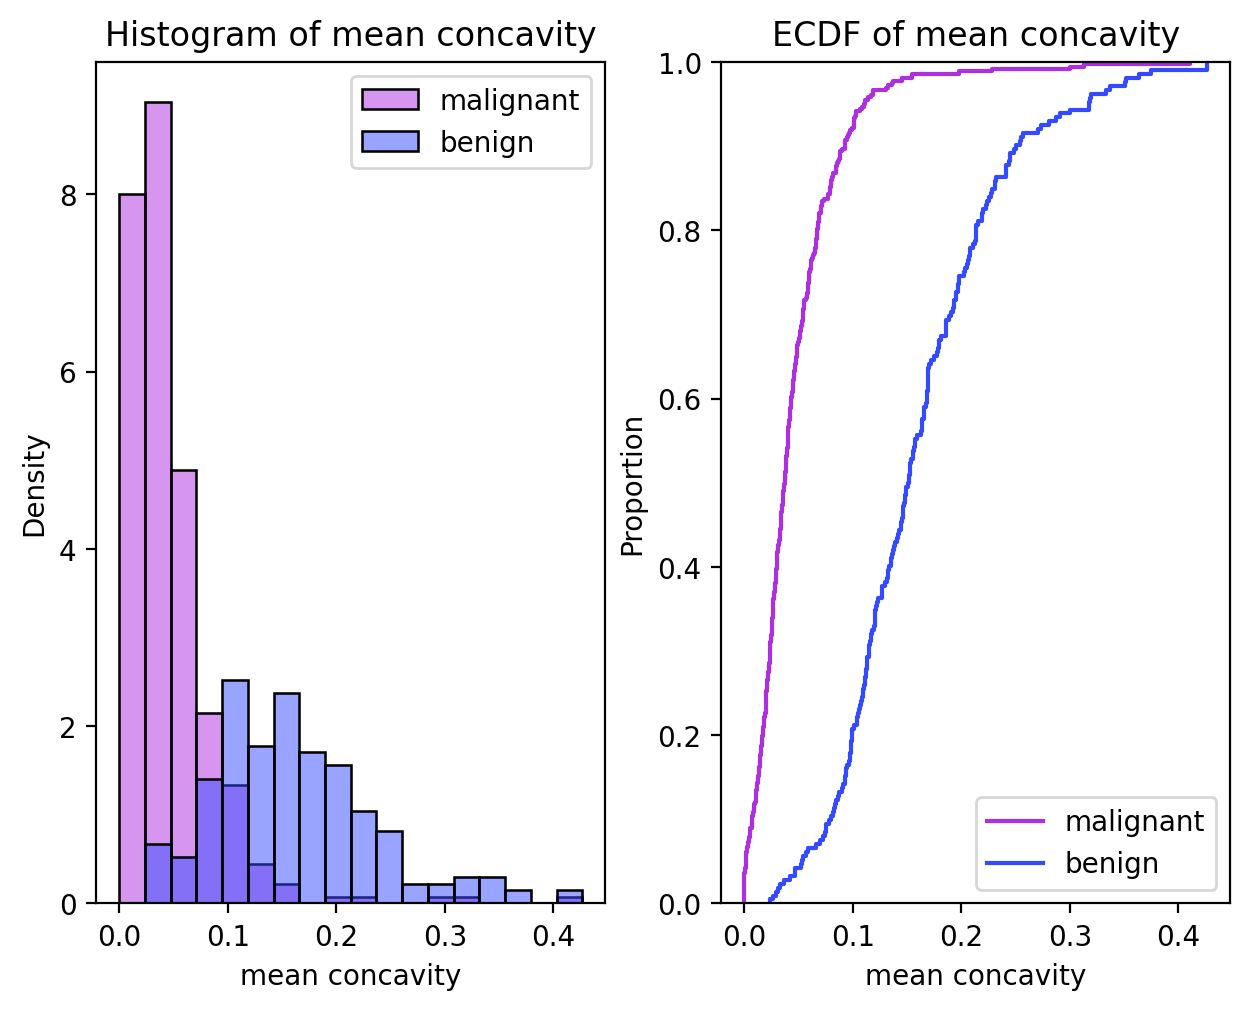

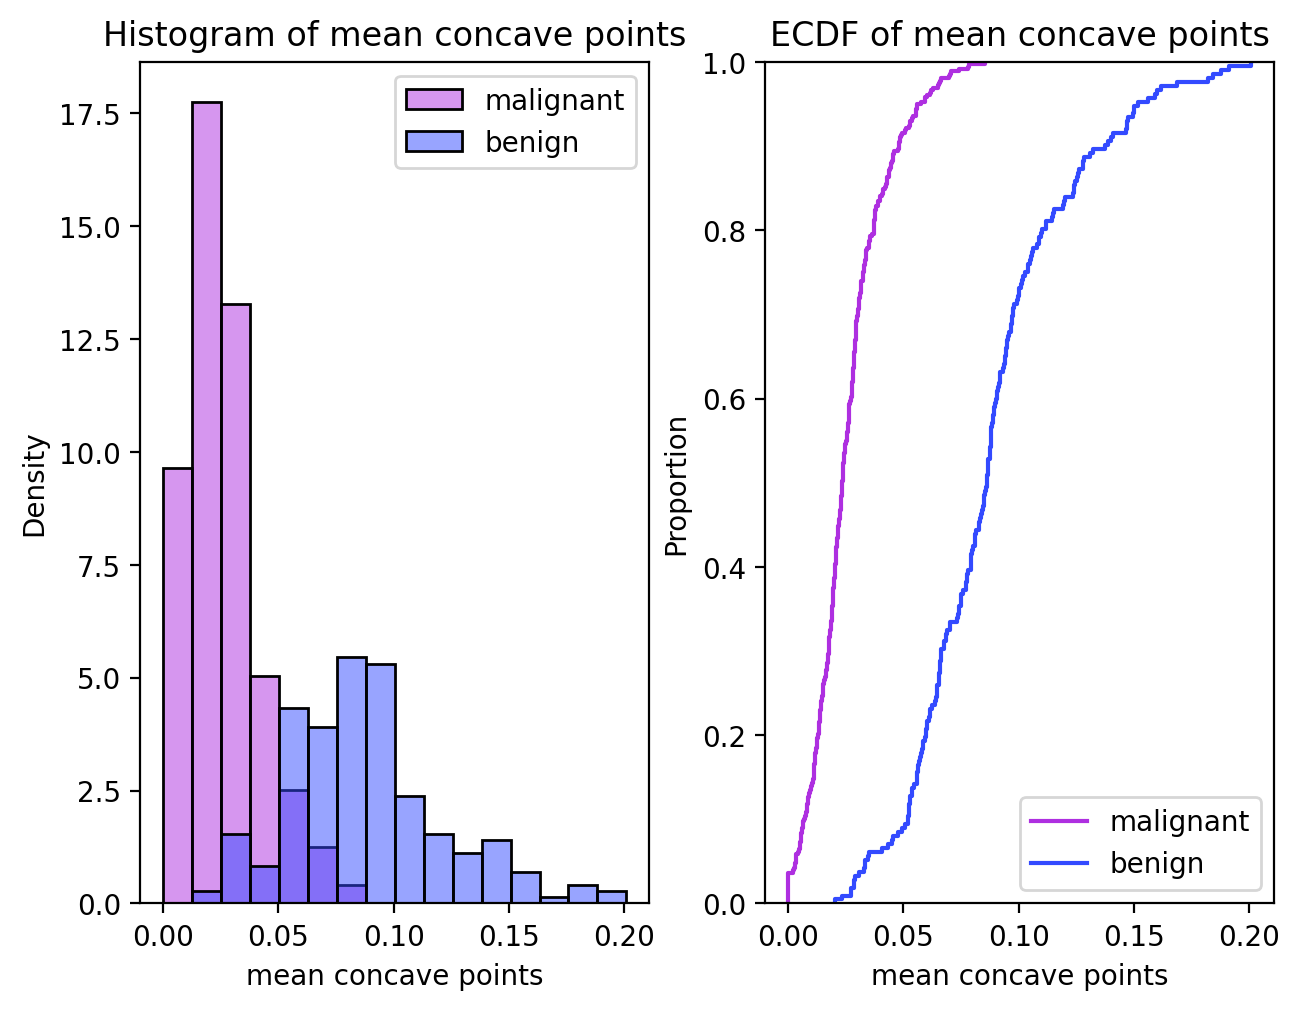

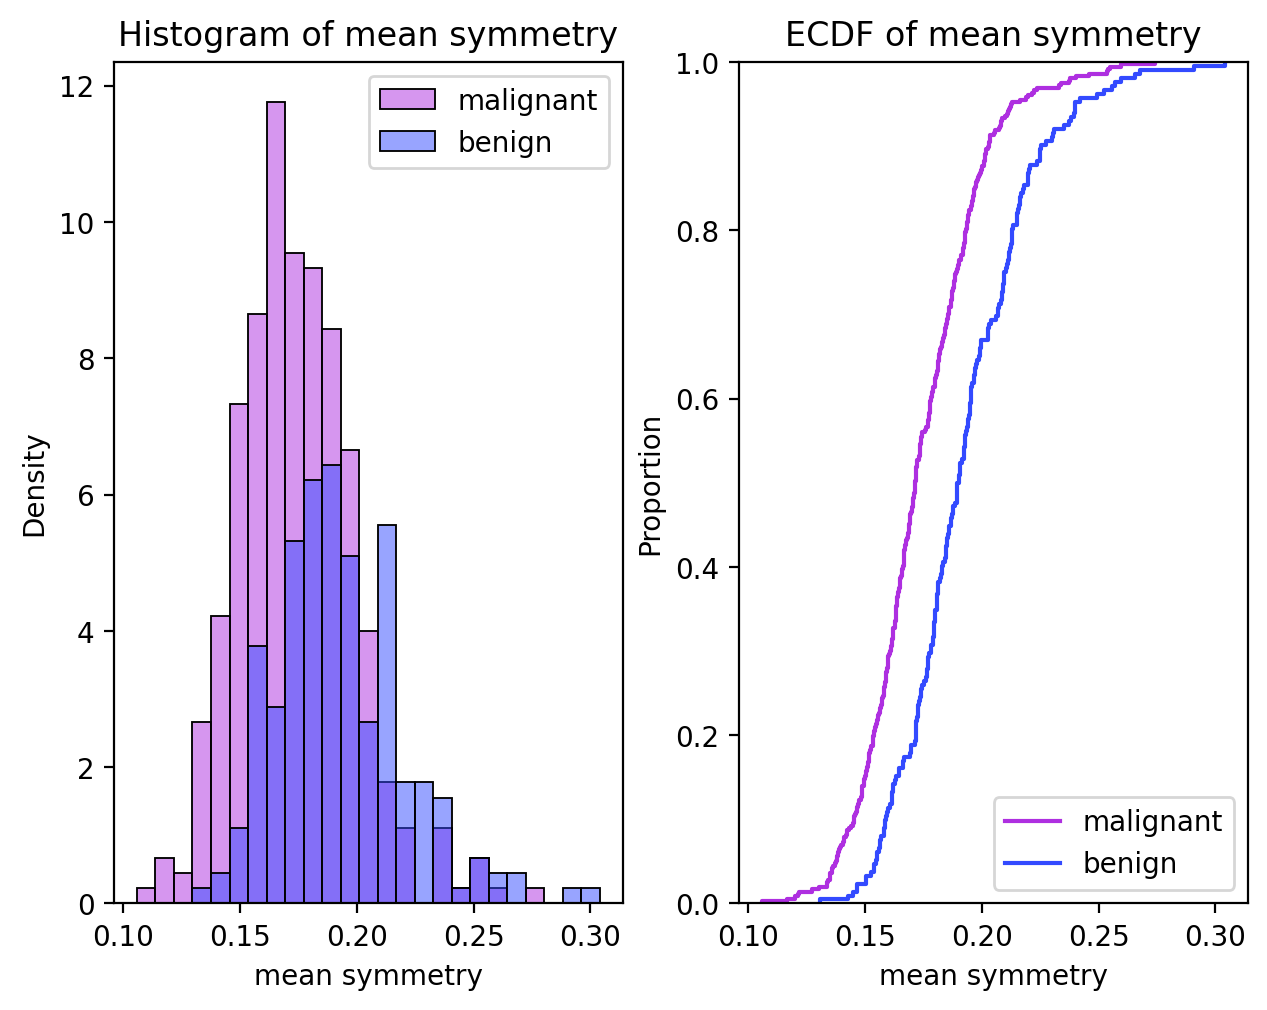

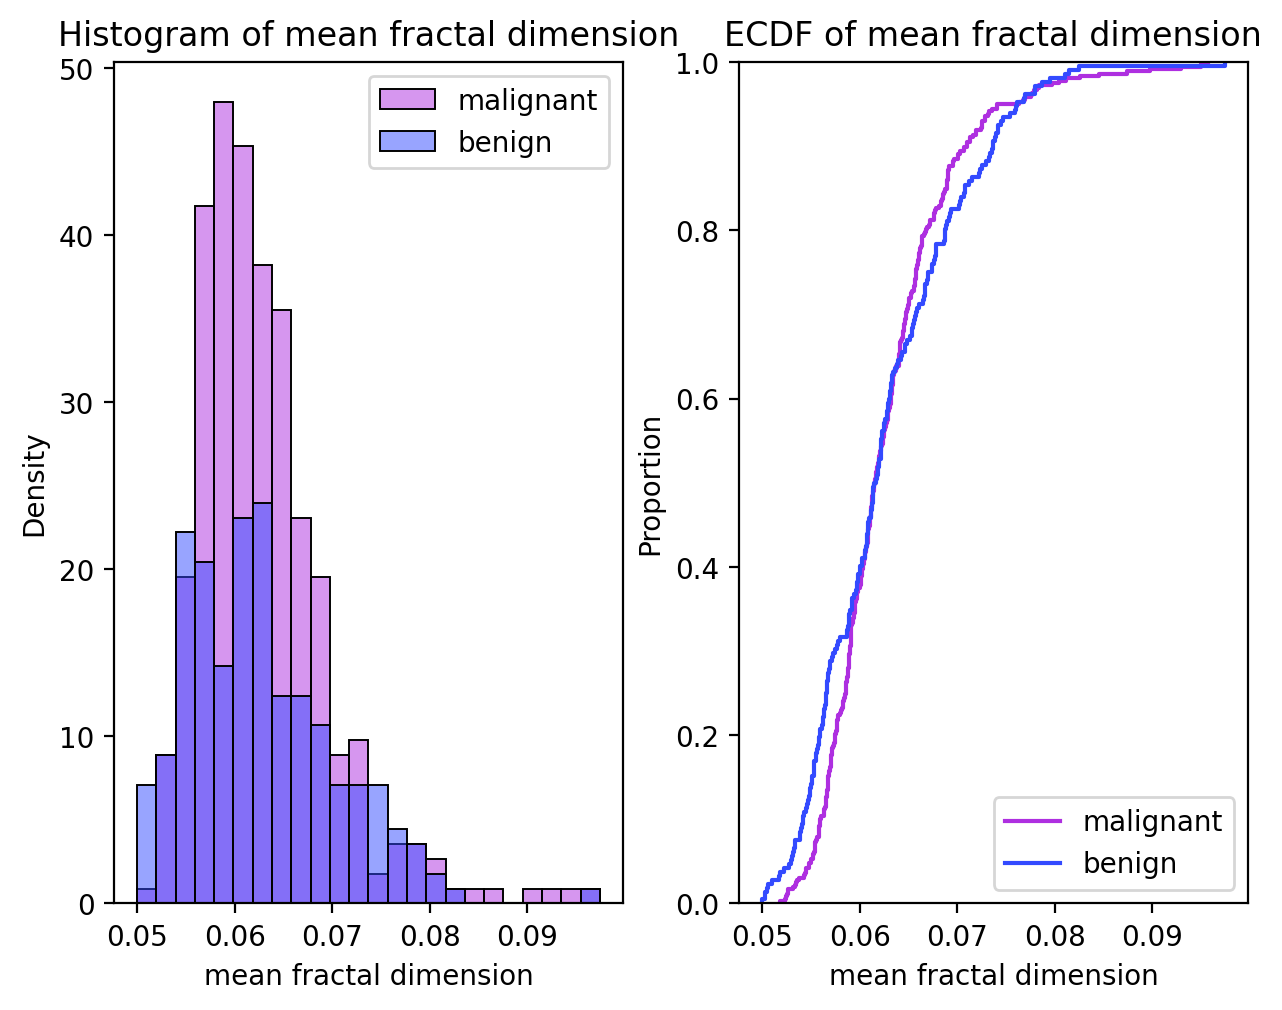

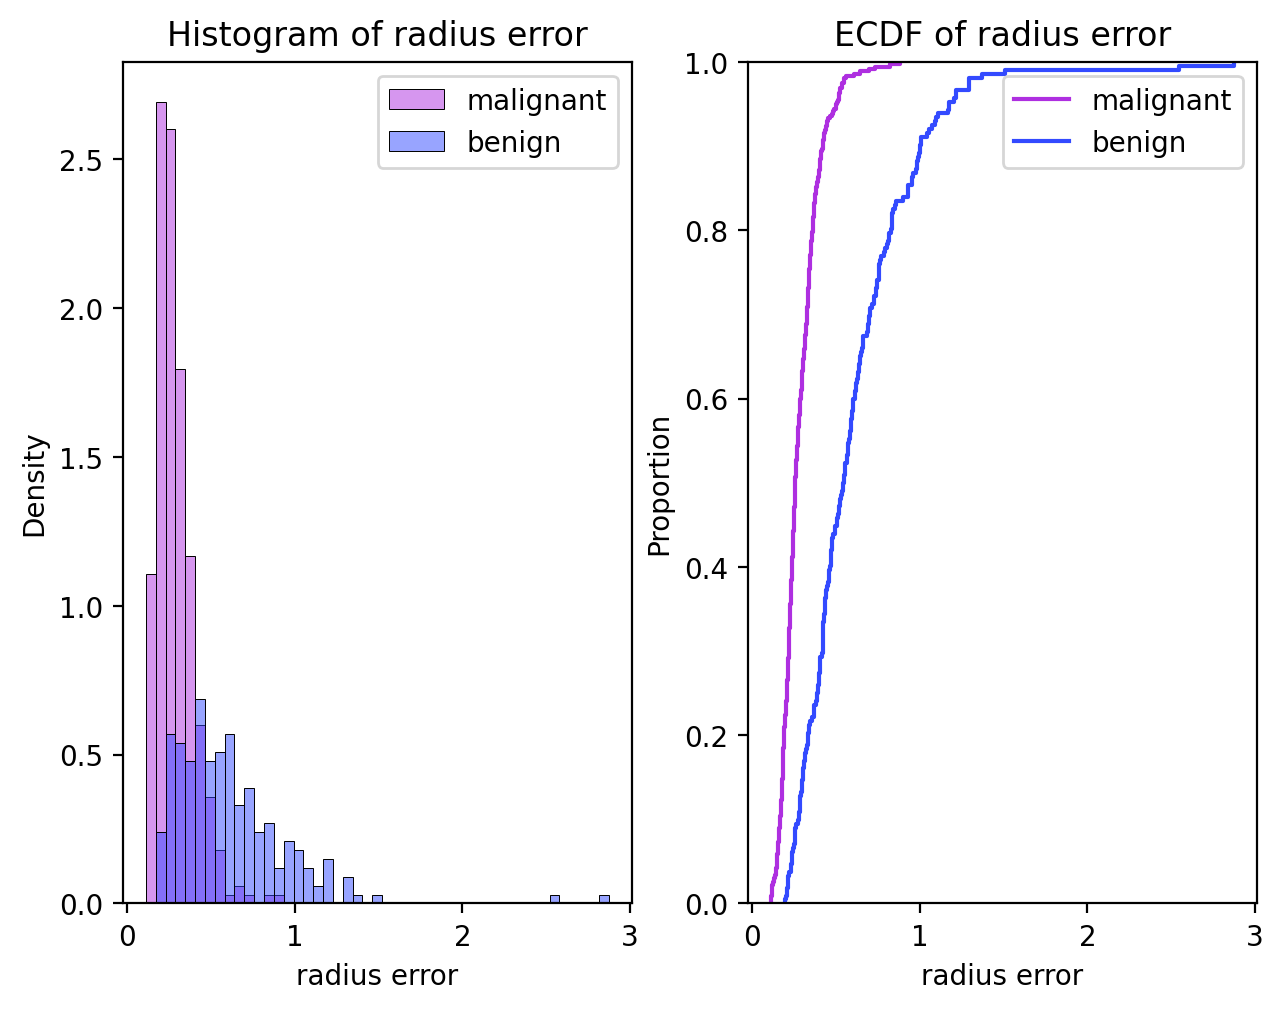

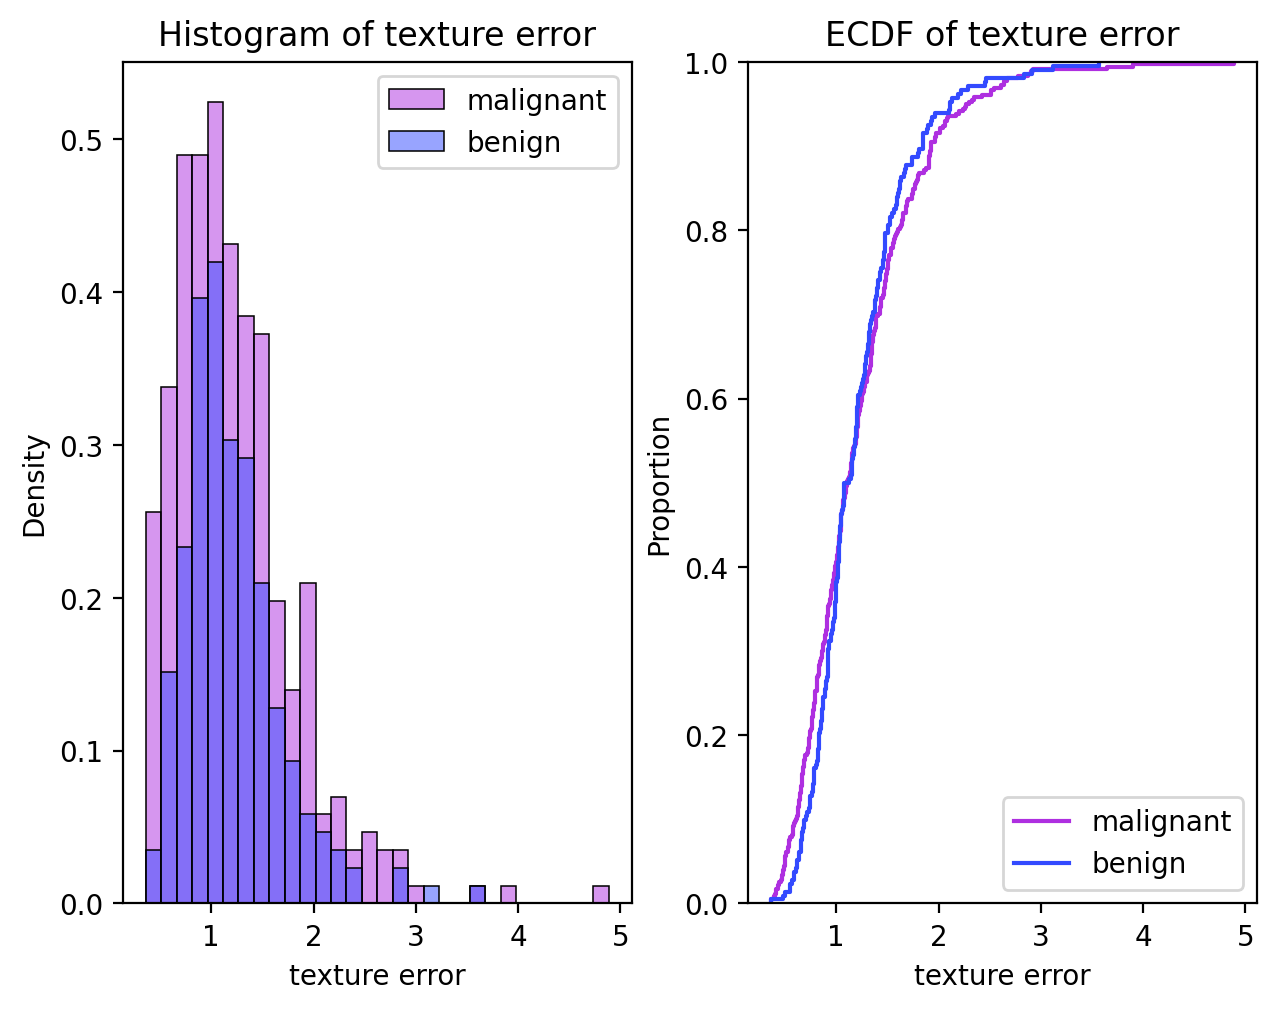

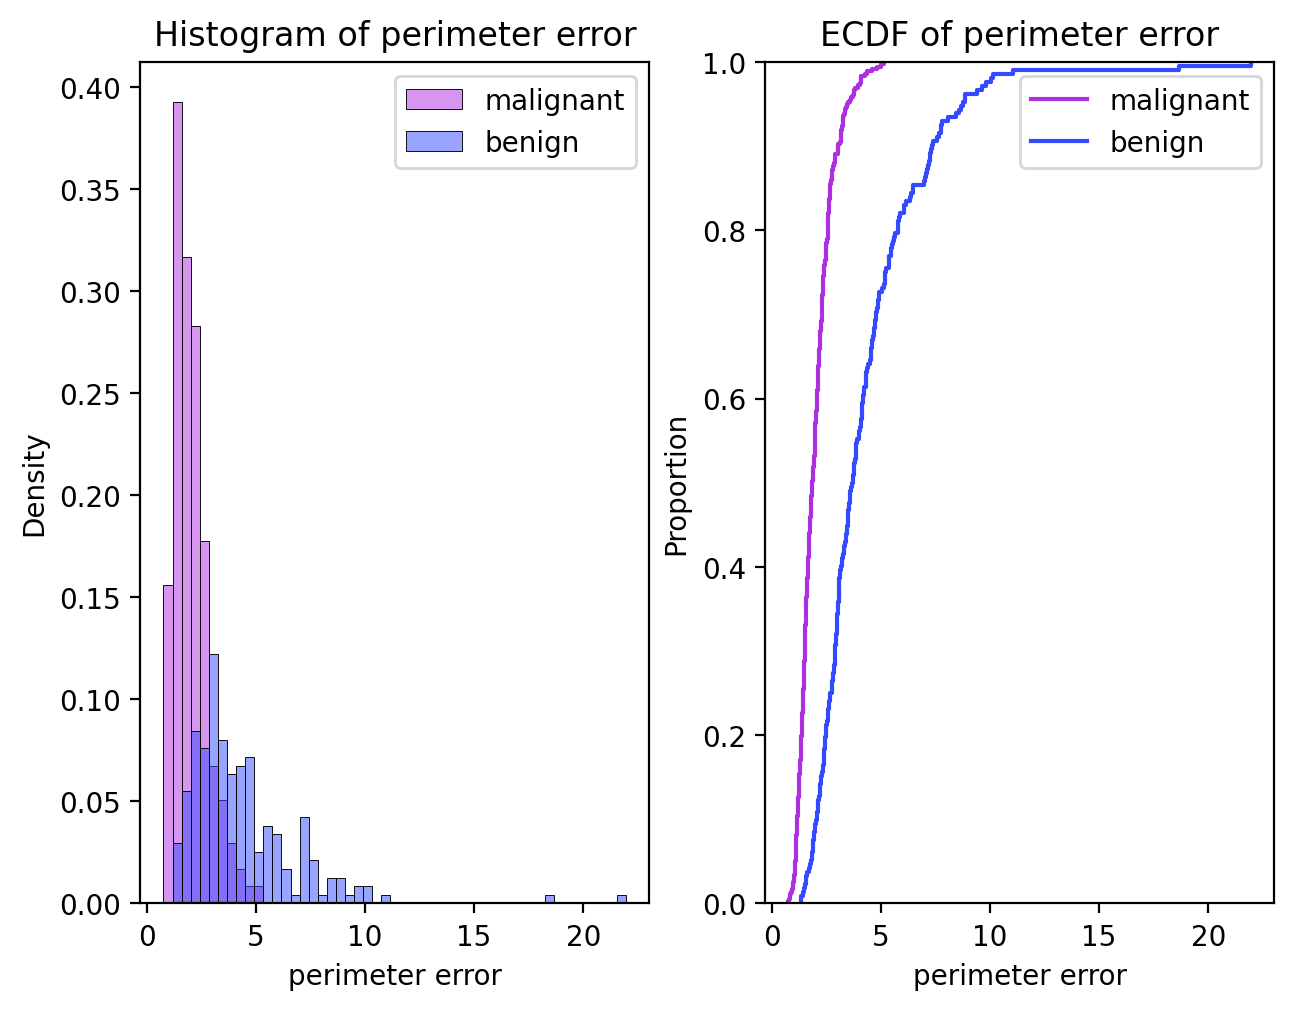

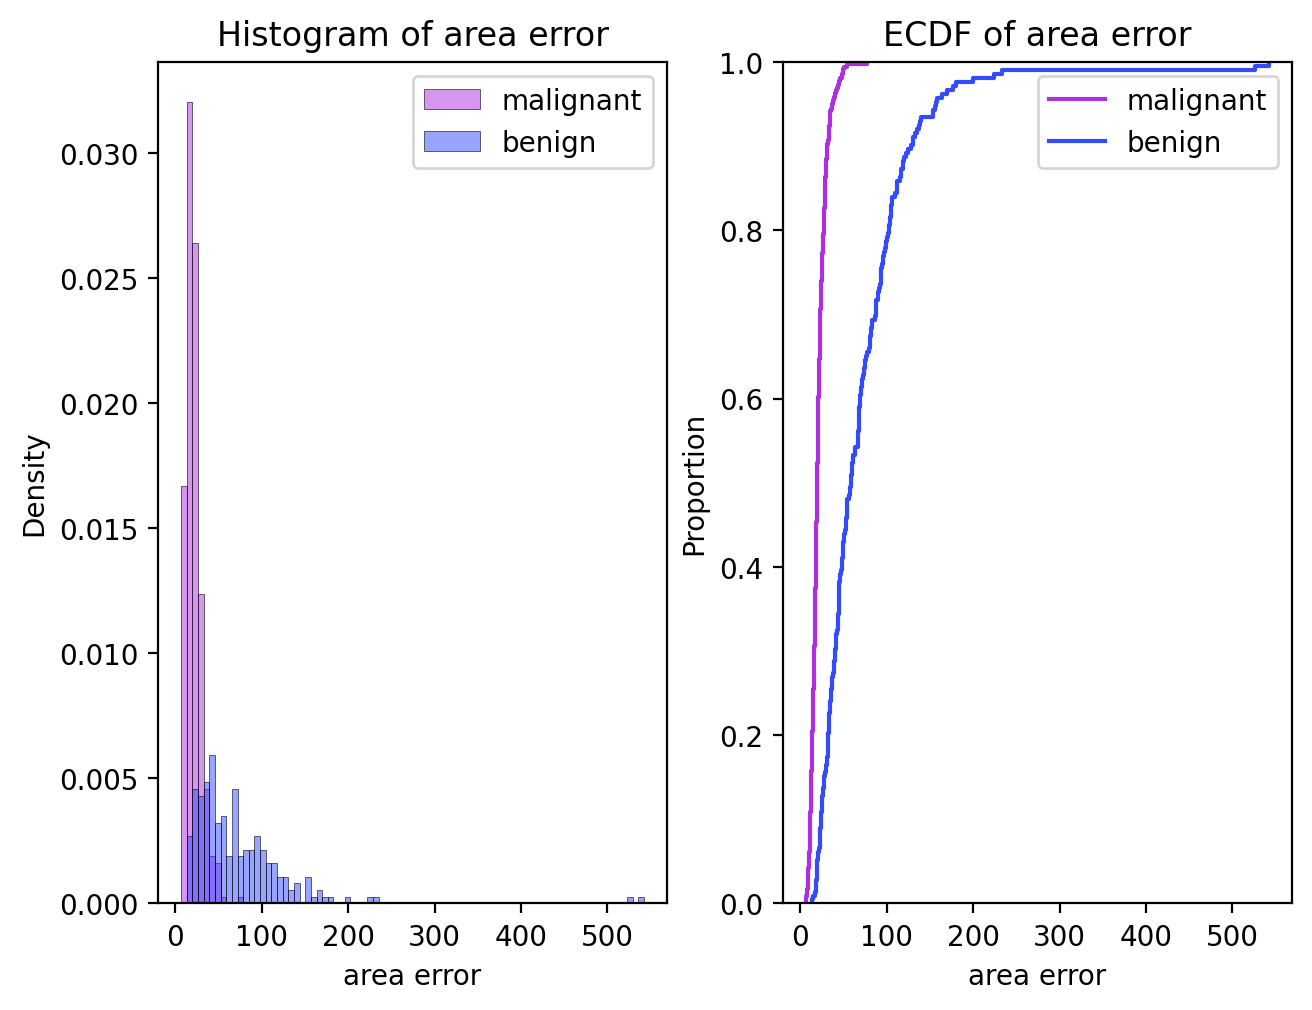

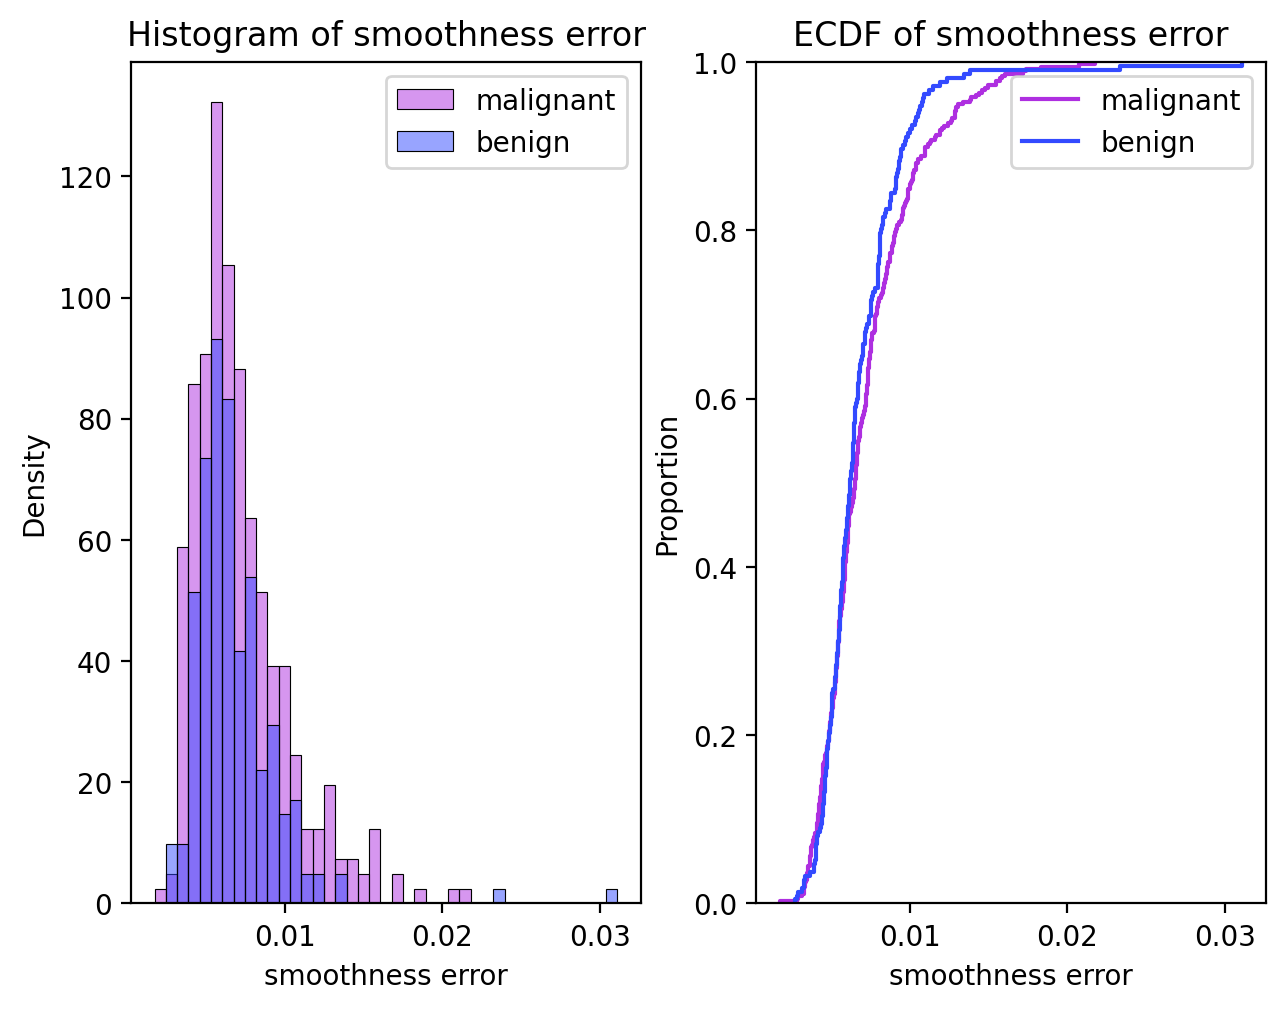

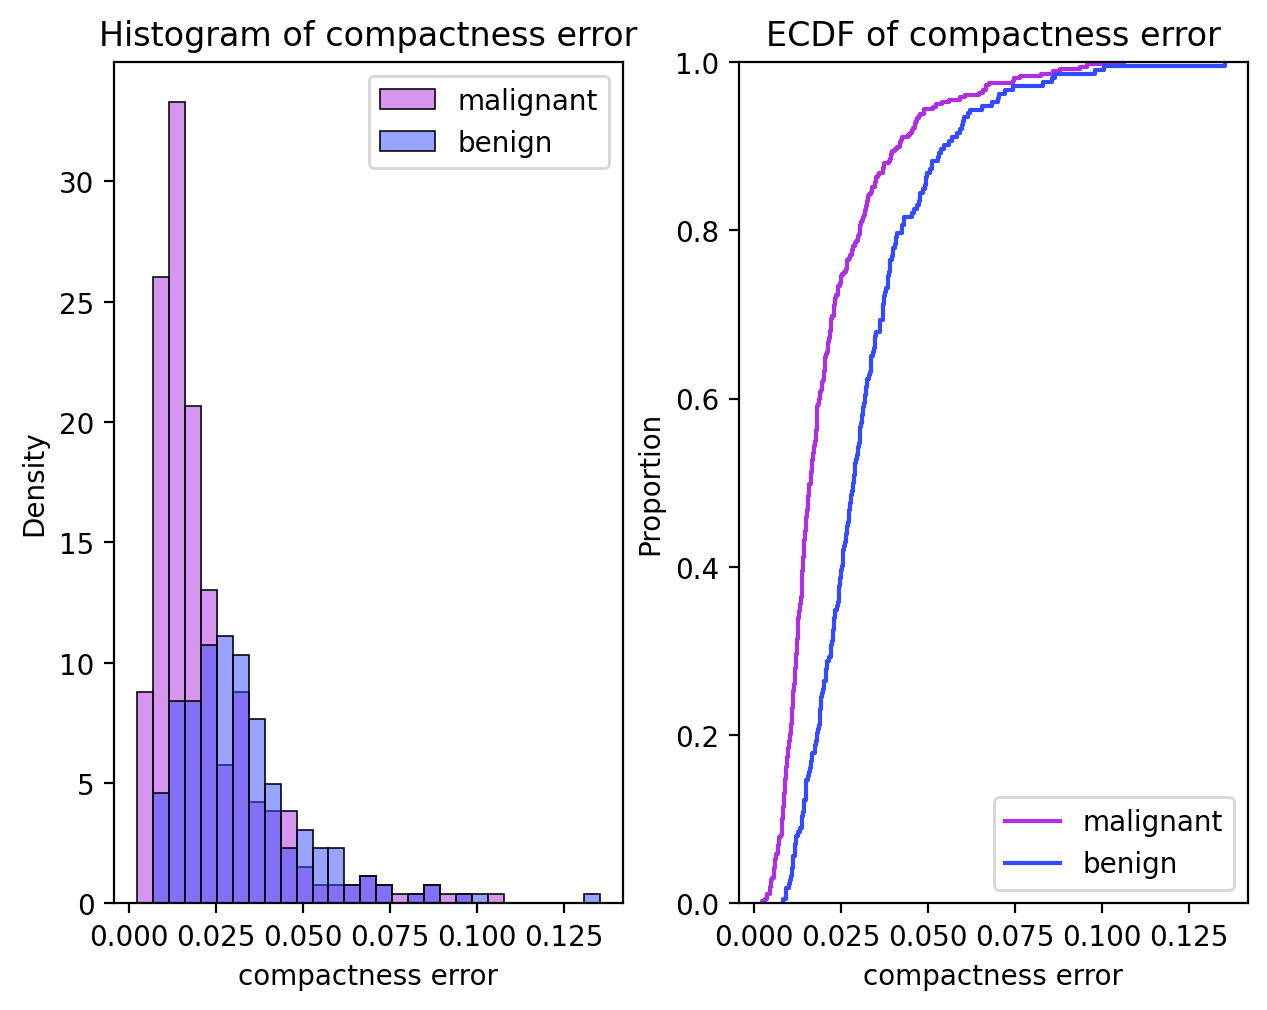

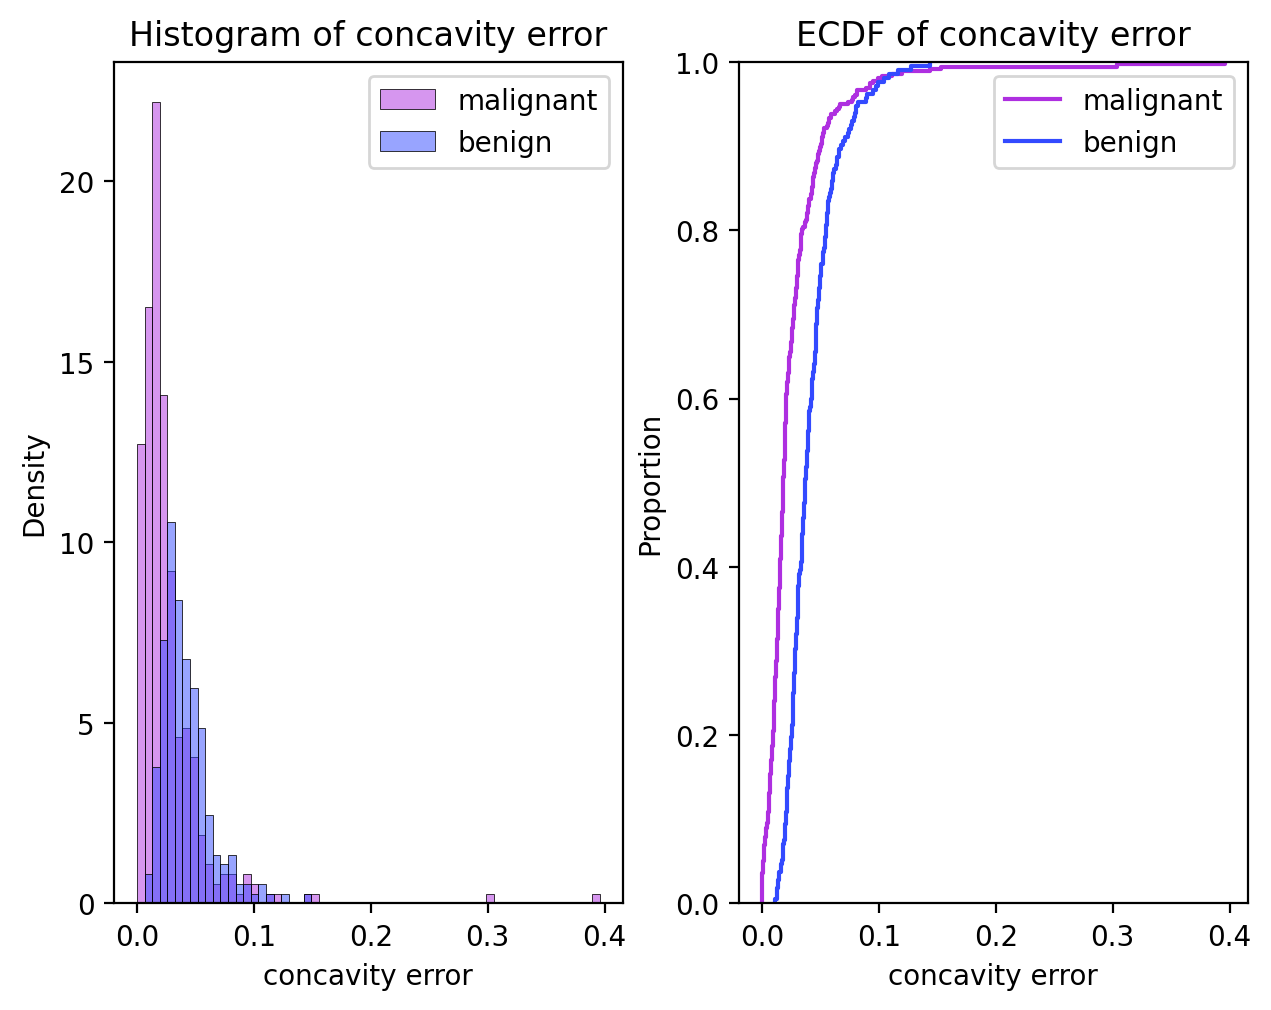

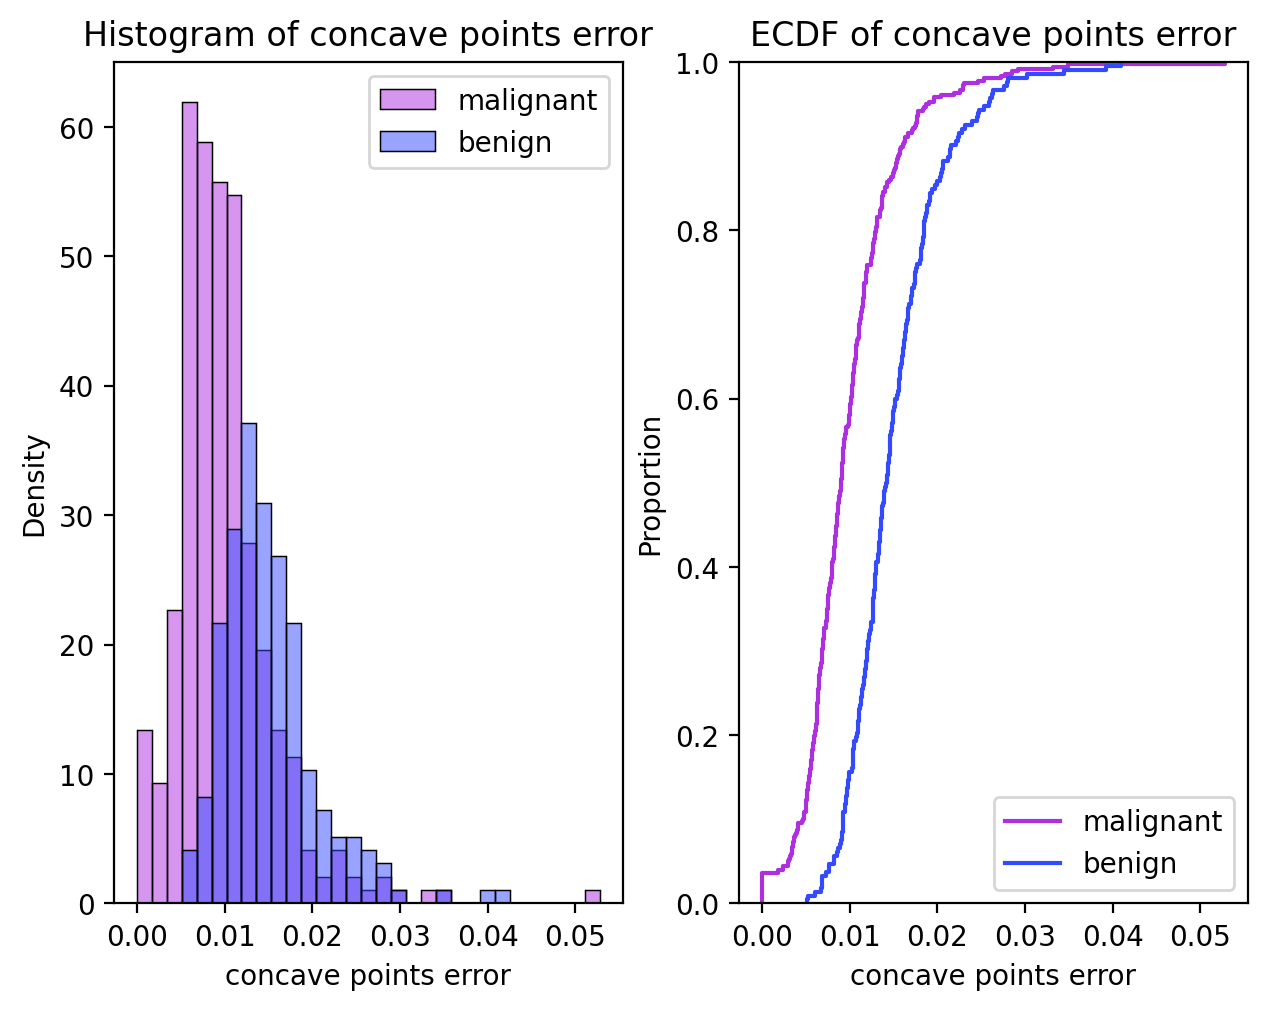

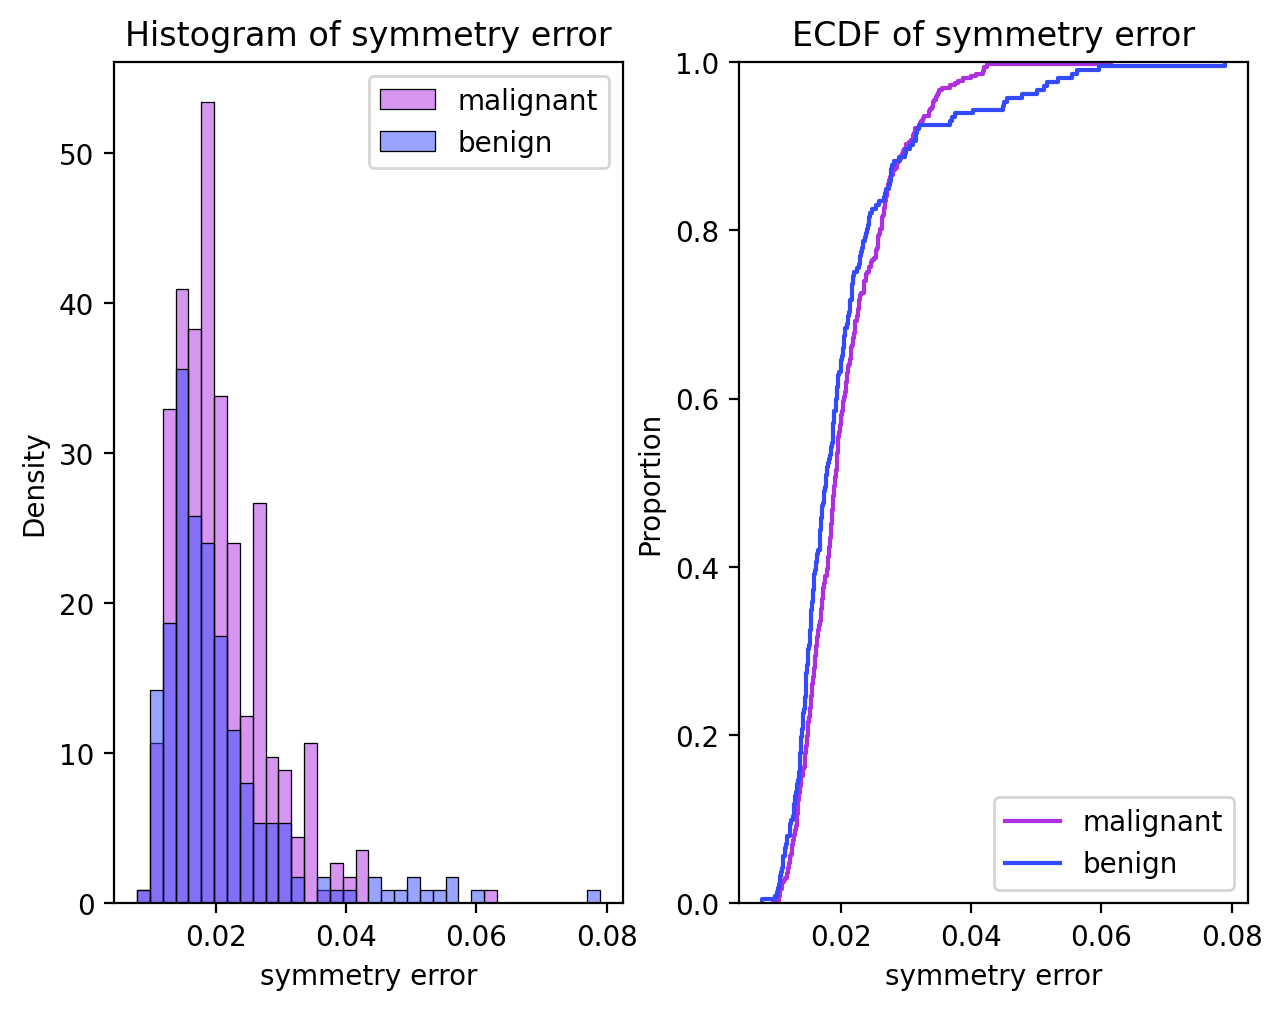

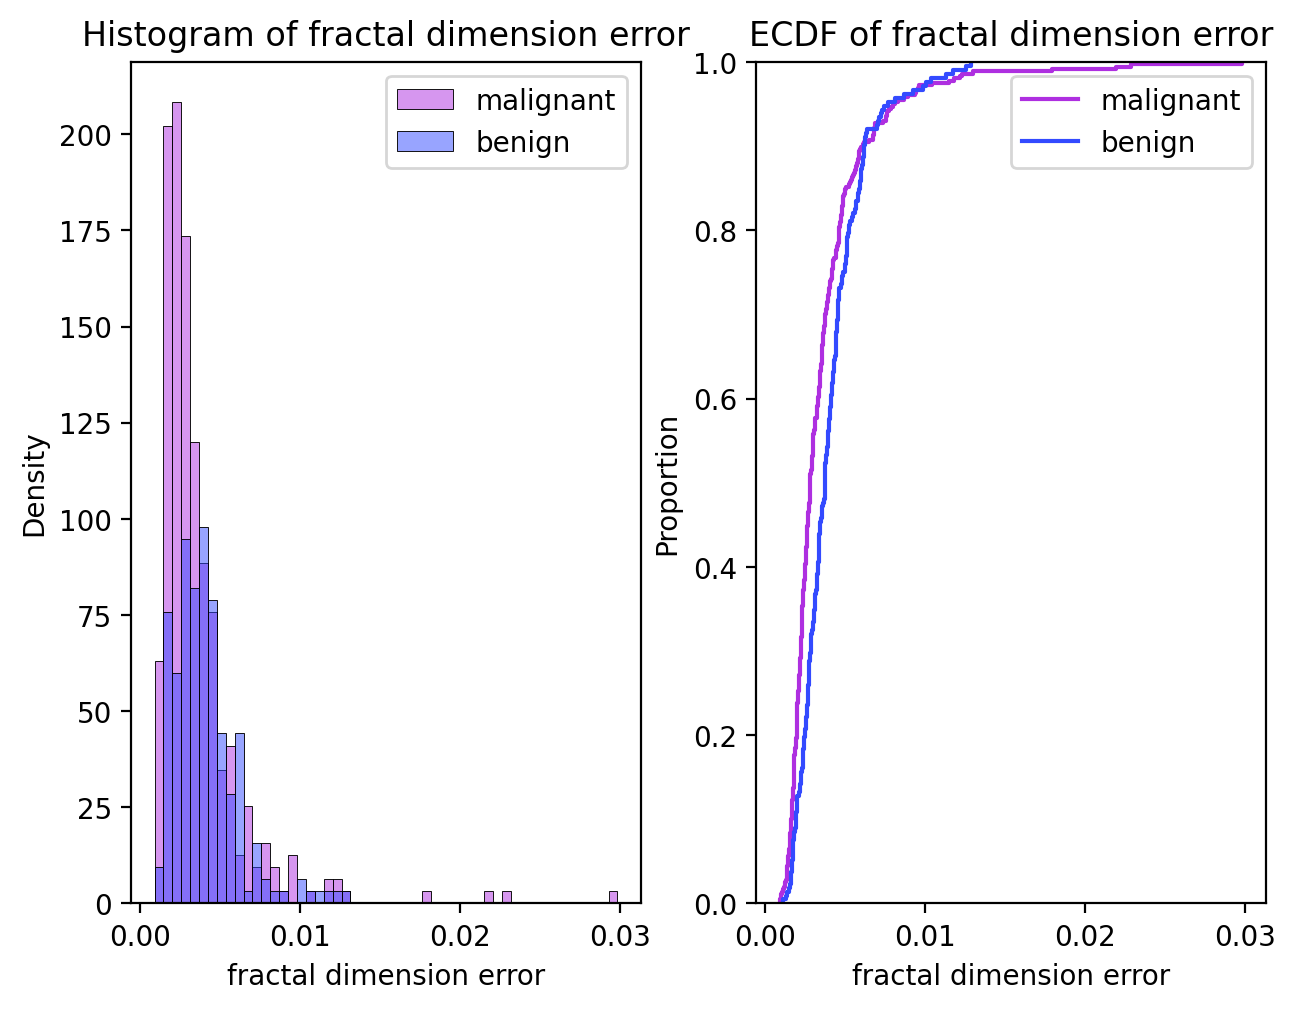

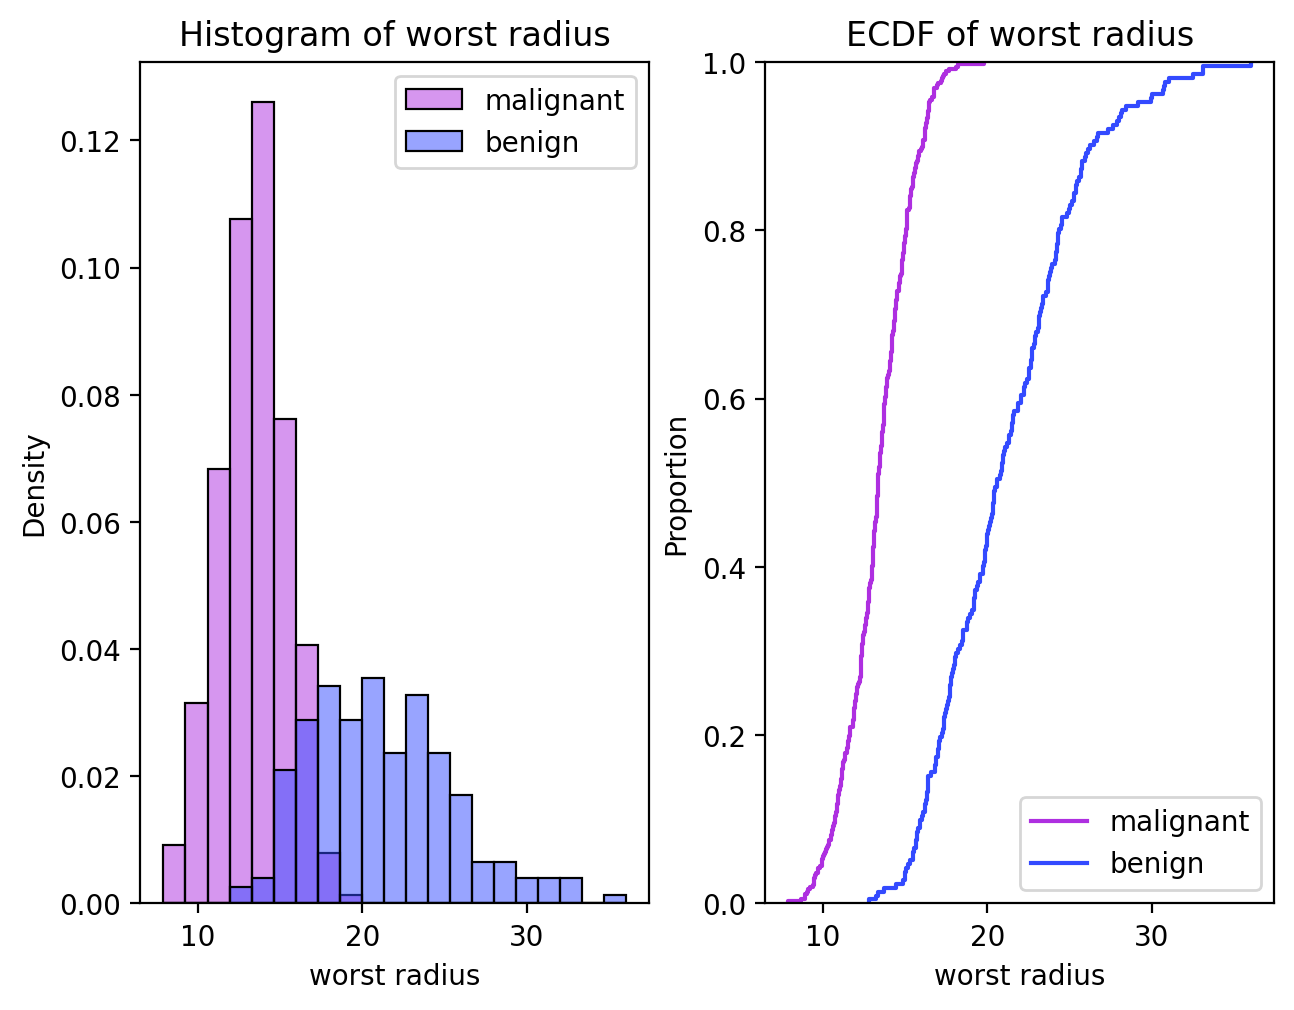

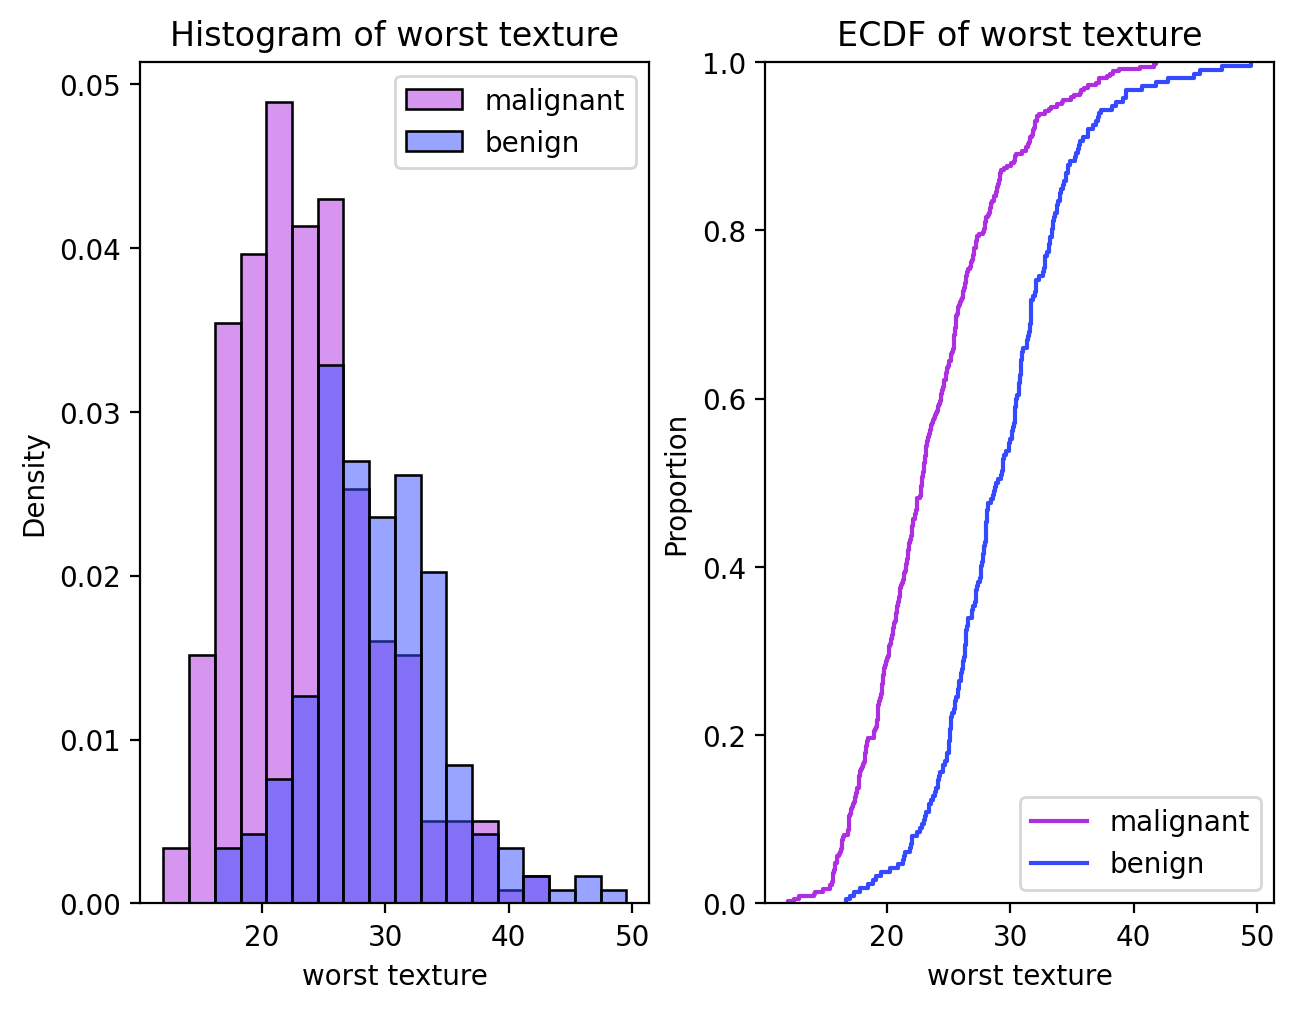

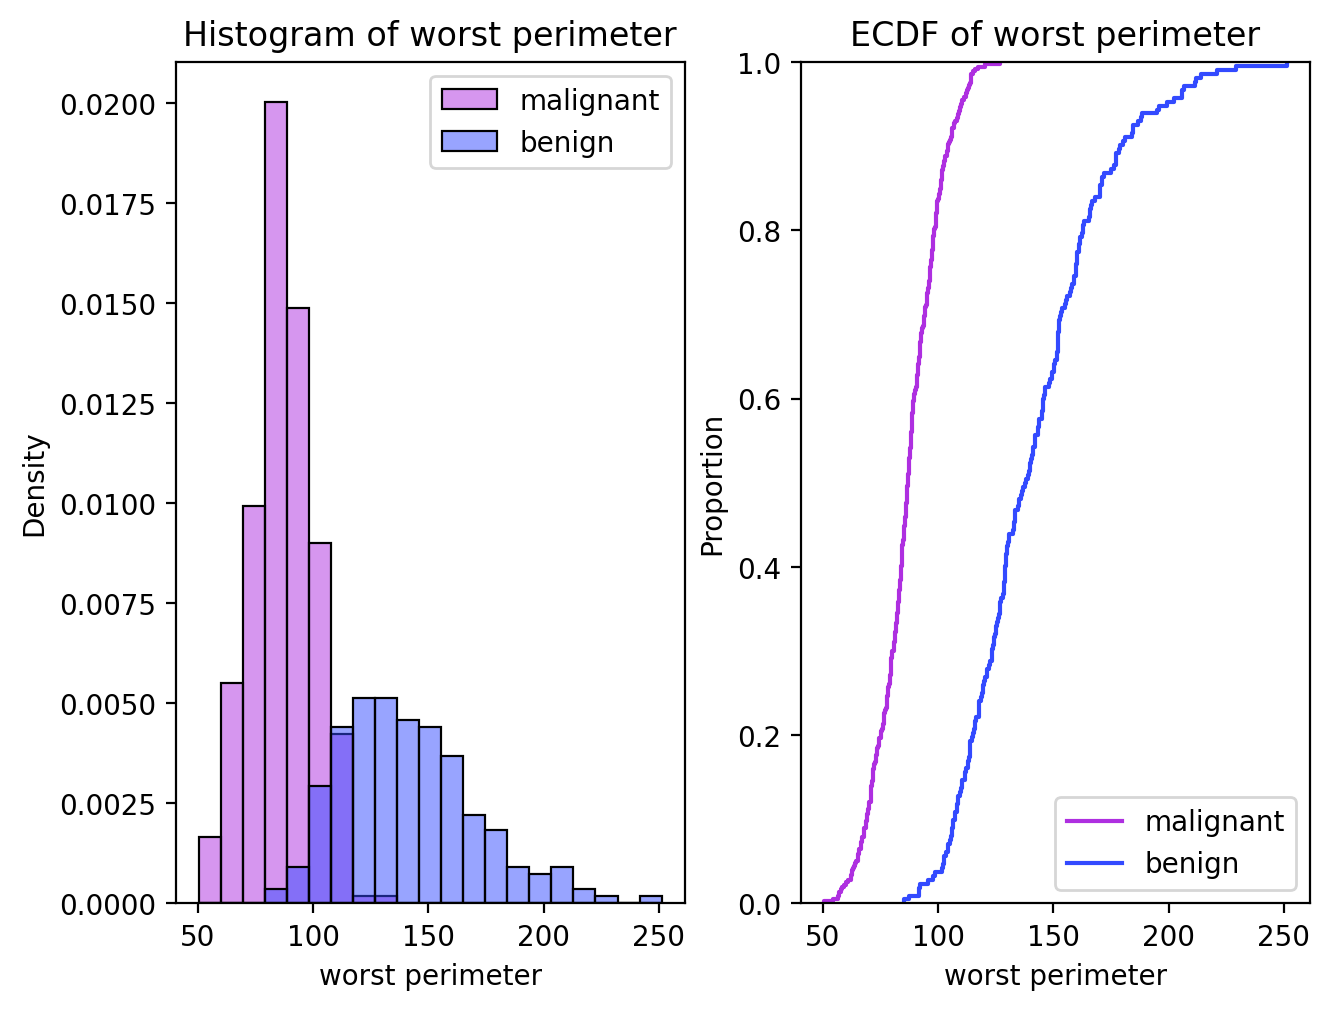

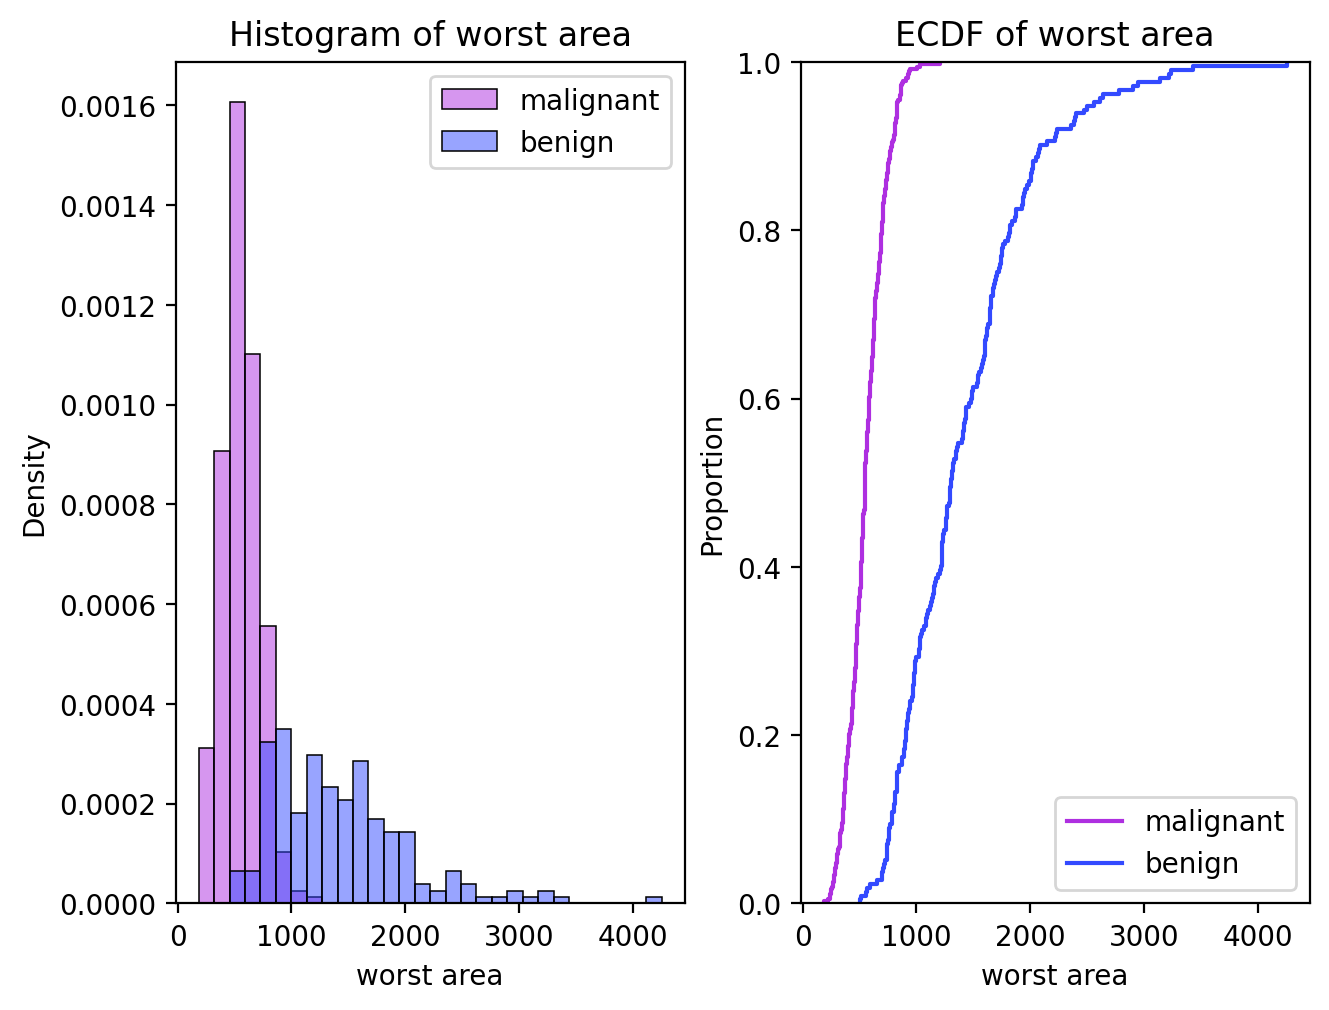

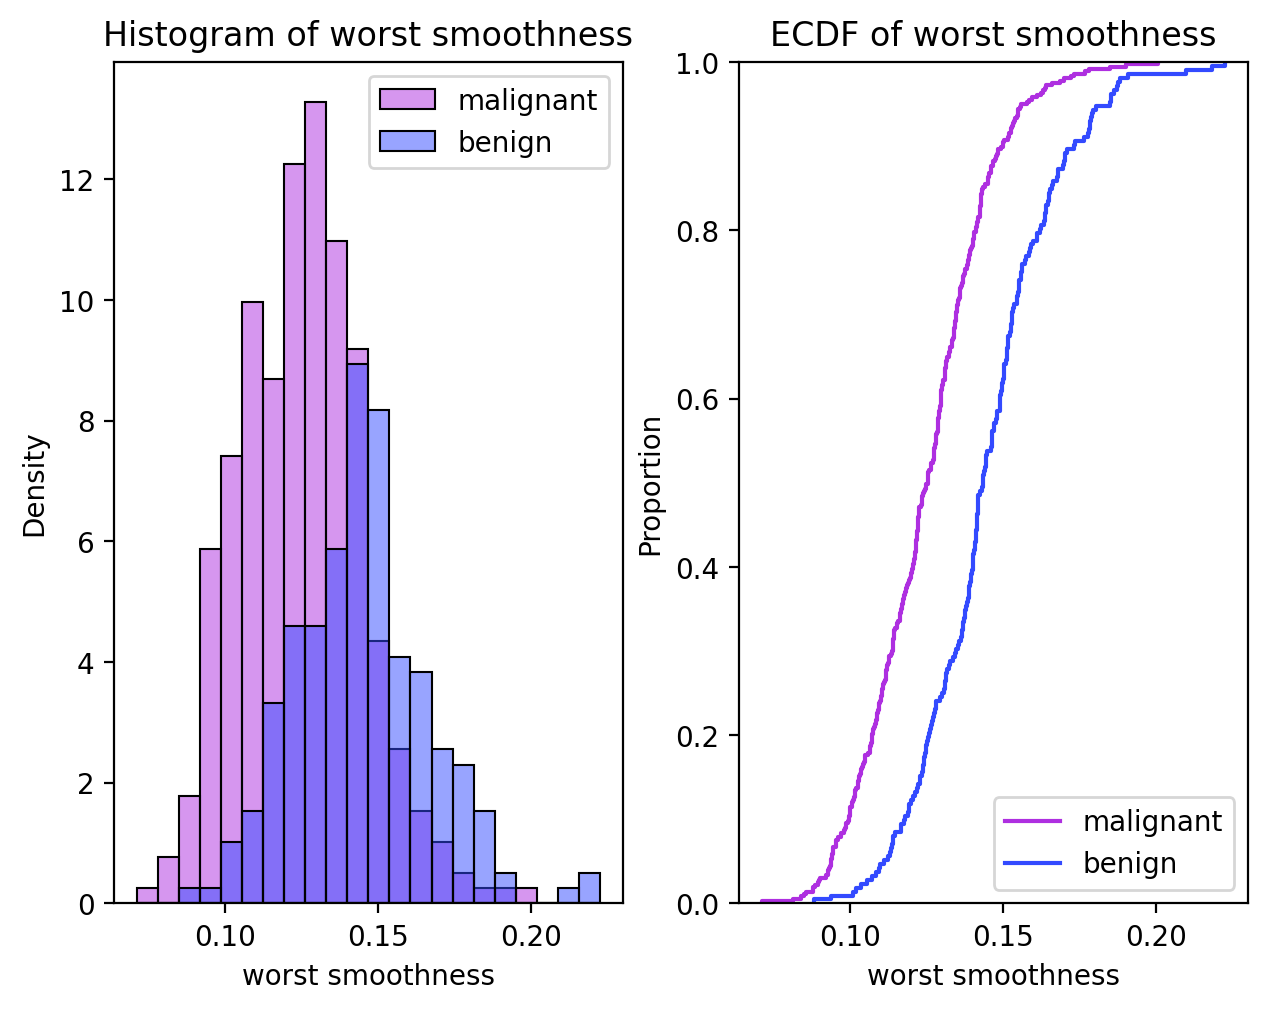

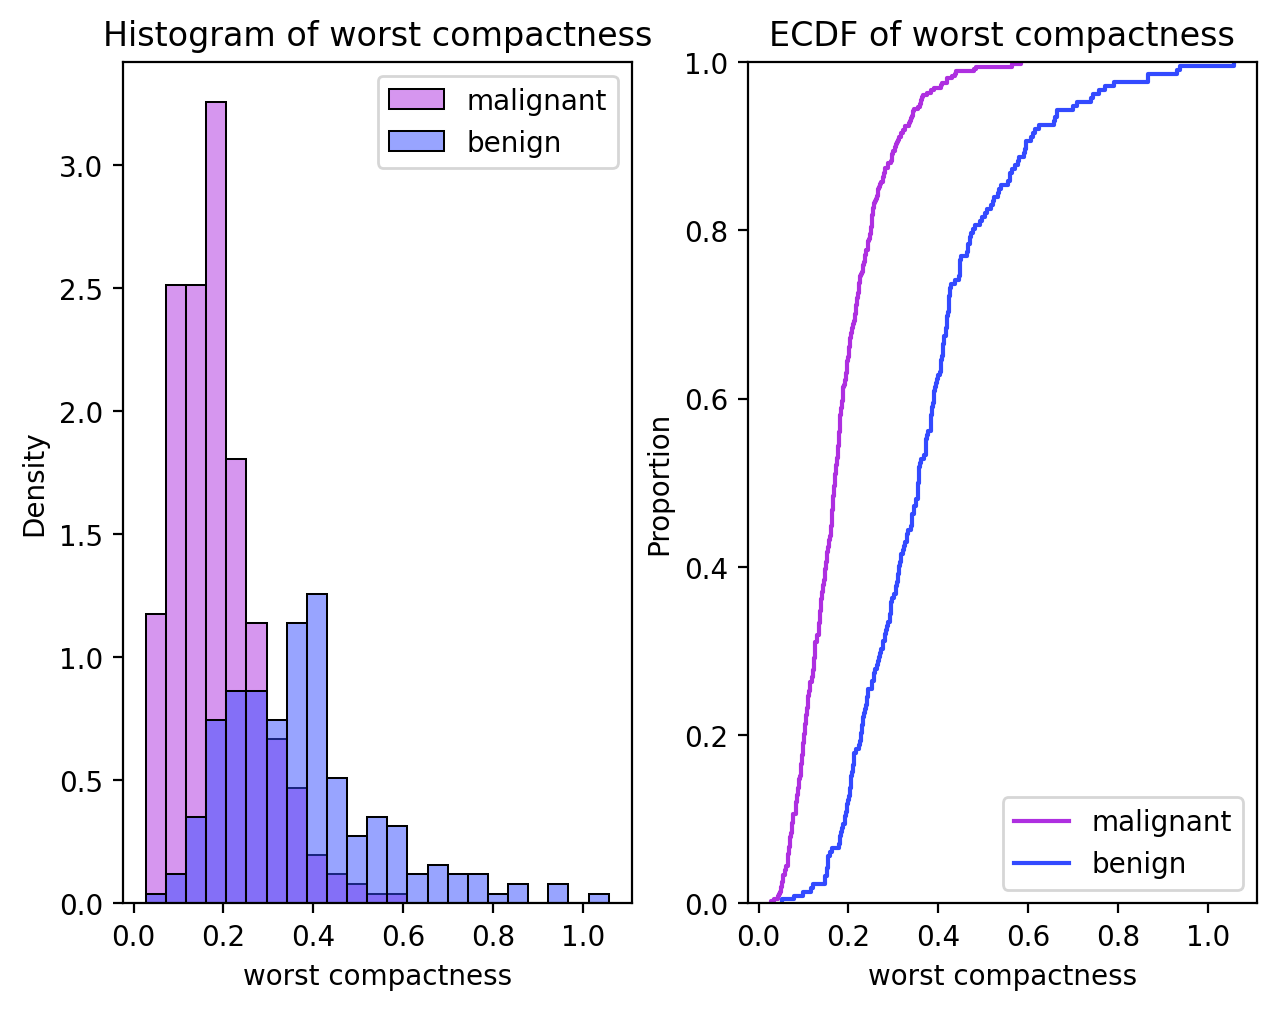

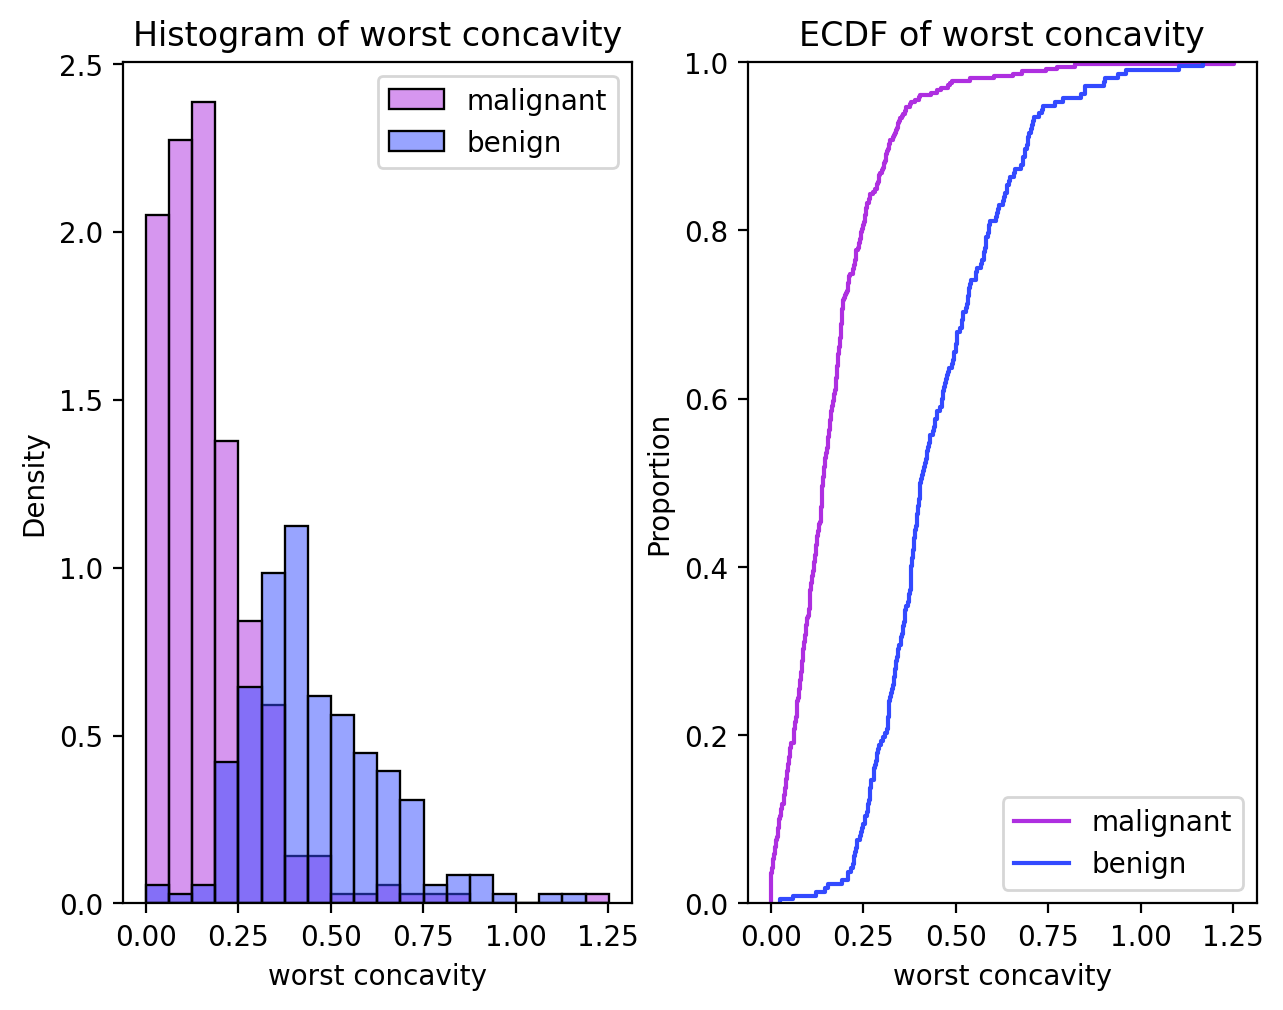

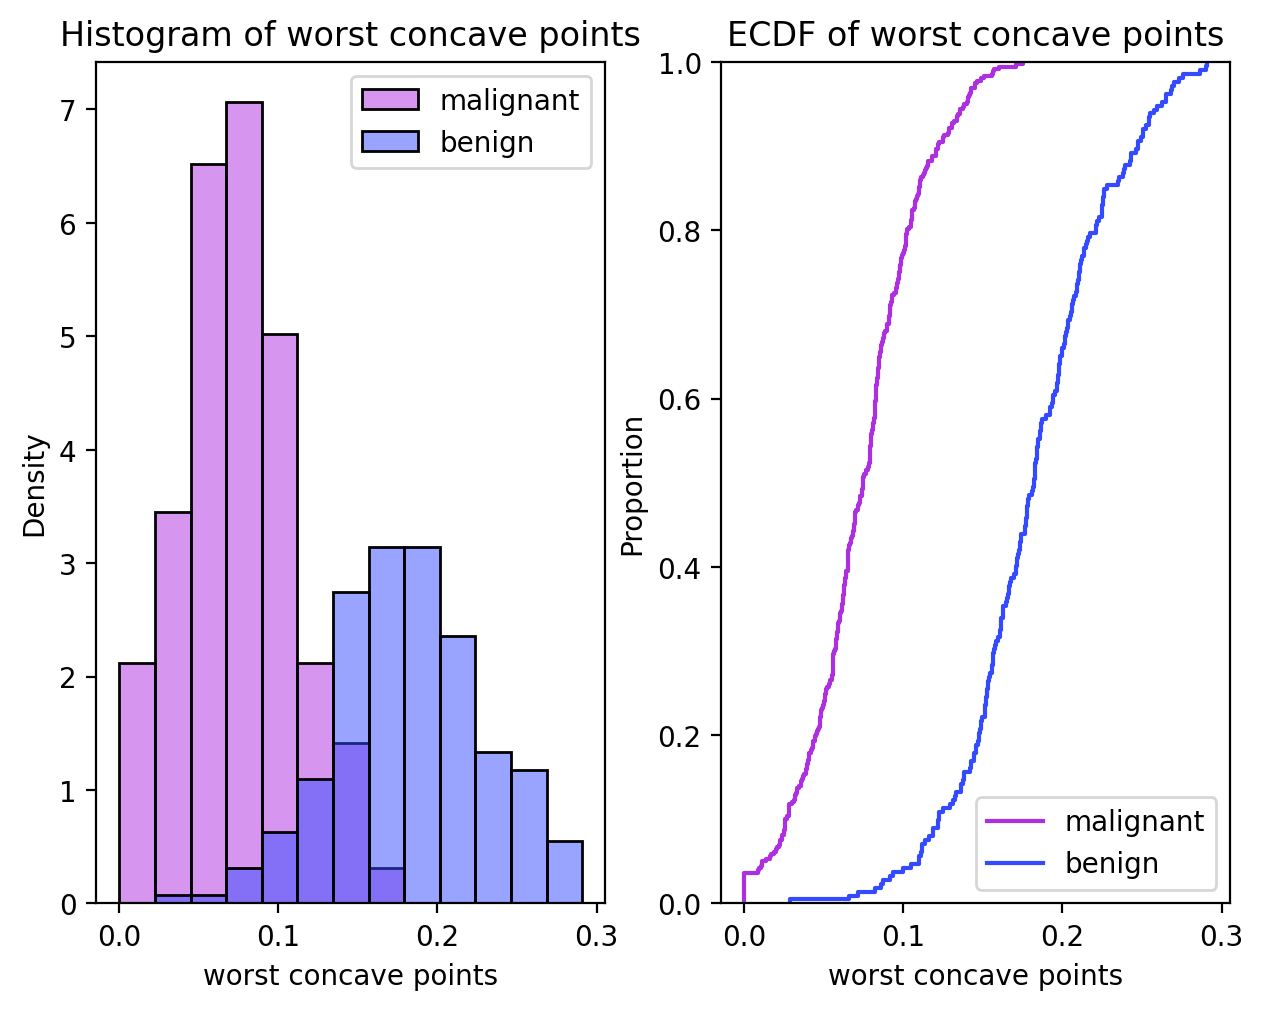

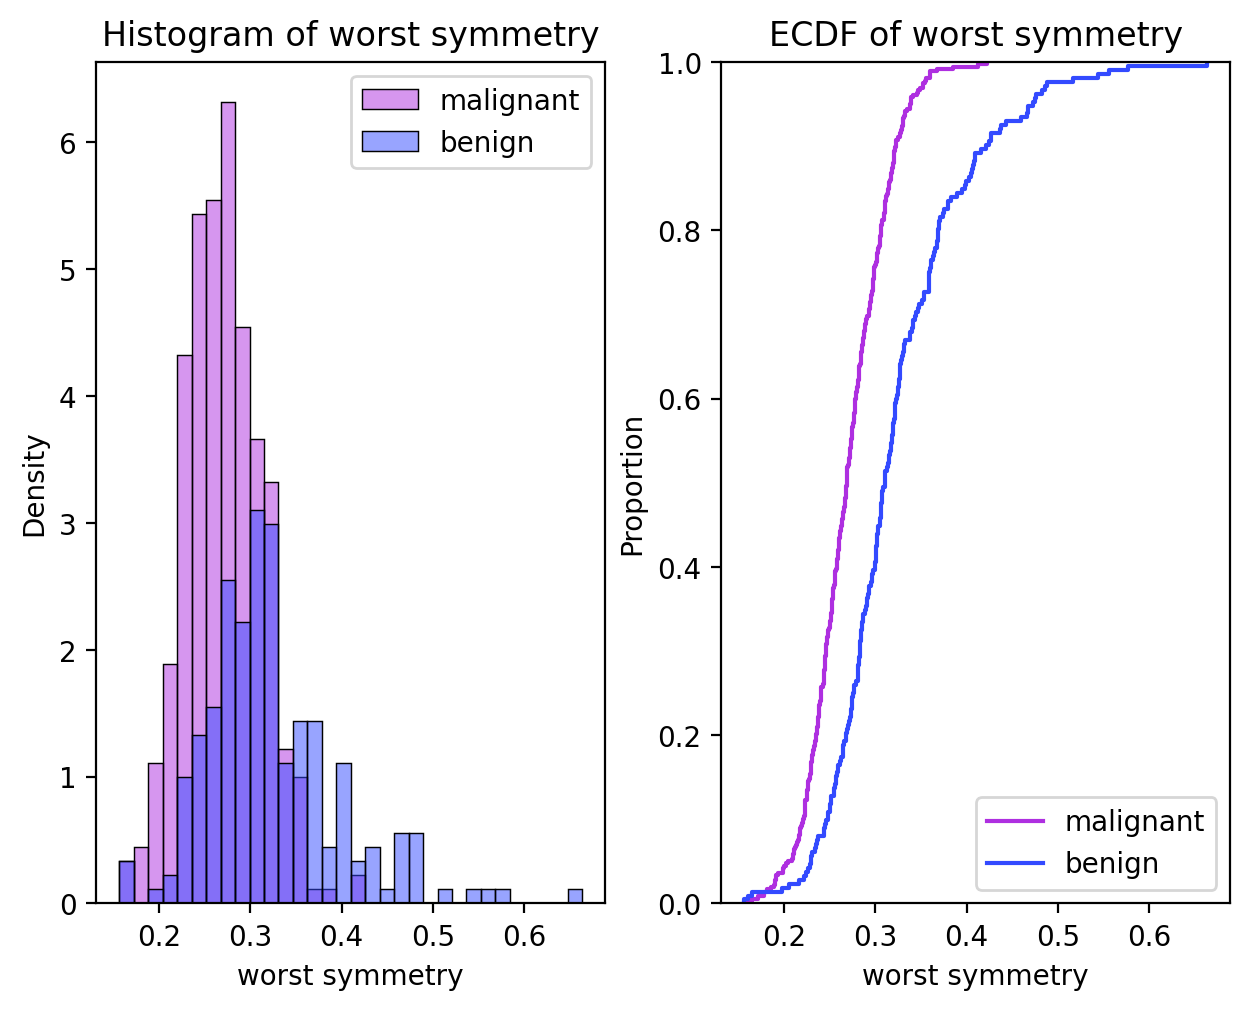

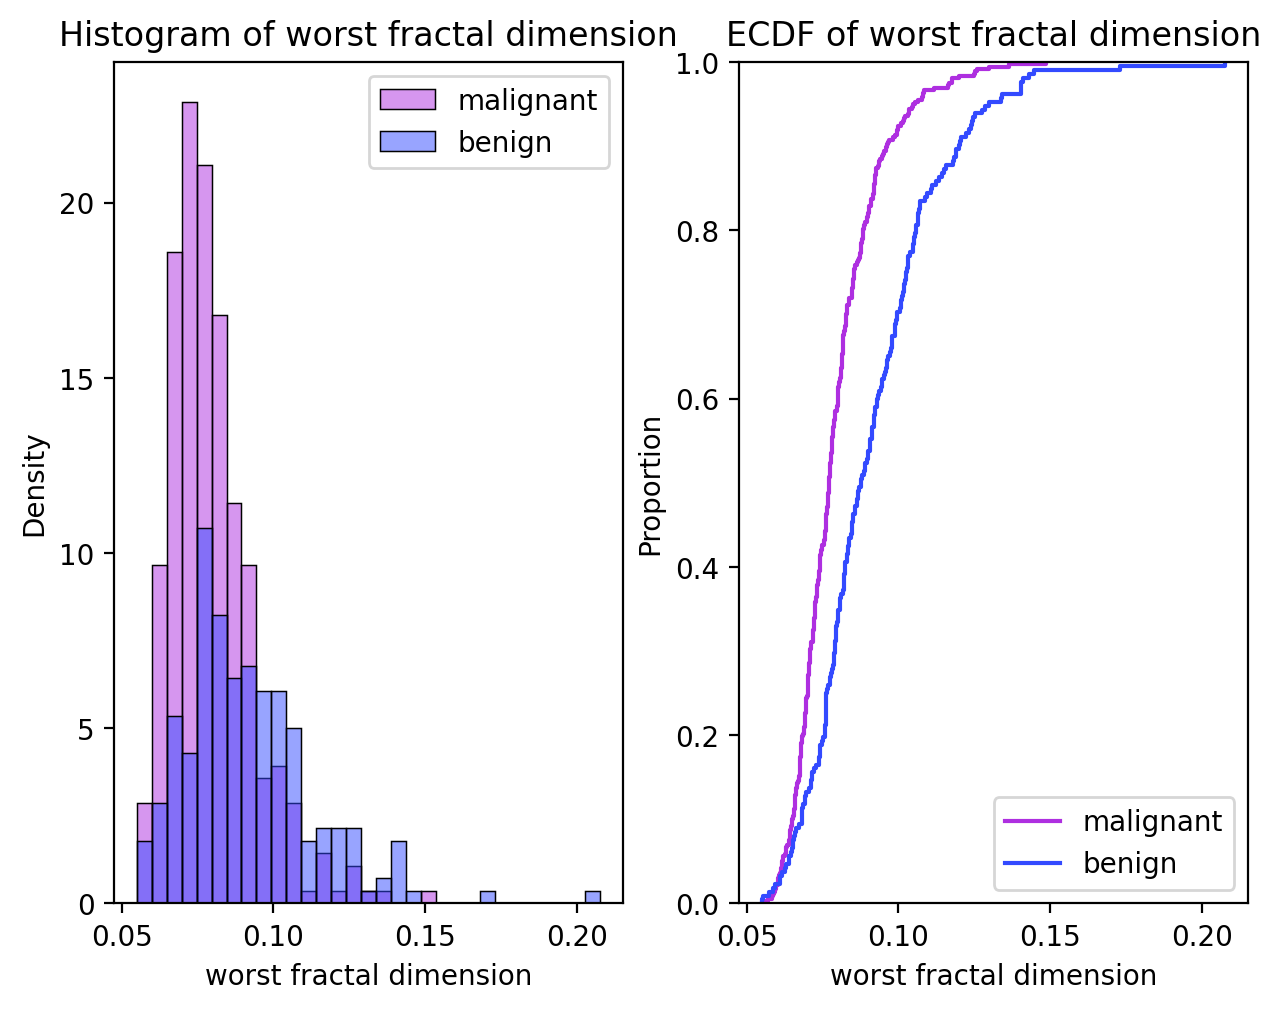

In [5]:
for feature in cancer["feature_names"]:
    # Define the Figure and Axes
    fig, ax = plt.subplots(1,2)
    fig.tight_layout()
    
    
    # Place the Seaborn plots on their respective axis
    sns.histplot(data=dataset, x=dataset[feature], ax=ax[0], hue="target", stat="density").set(title=f"Histogram of {feature}")
    sns.ecdfplot(data=dataset, x=dataset[feature], ax=ax[1], hue="target").set(title=f"ECDF of {feature}")
    
    # Configure individual axis
    ax[0].legend(labels = cancer["target_names"])
    ax[1].legend(labels = cancer["target_names"])
    
    # Plot the final result
    plt.show()

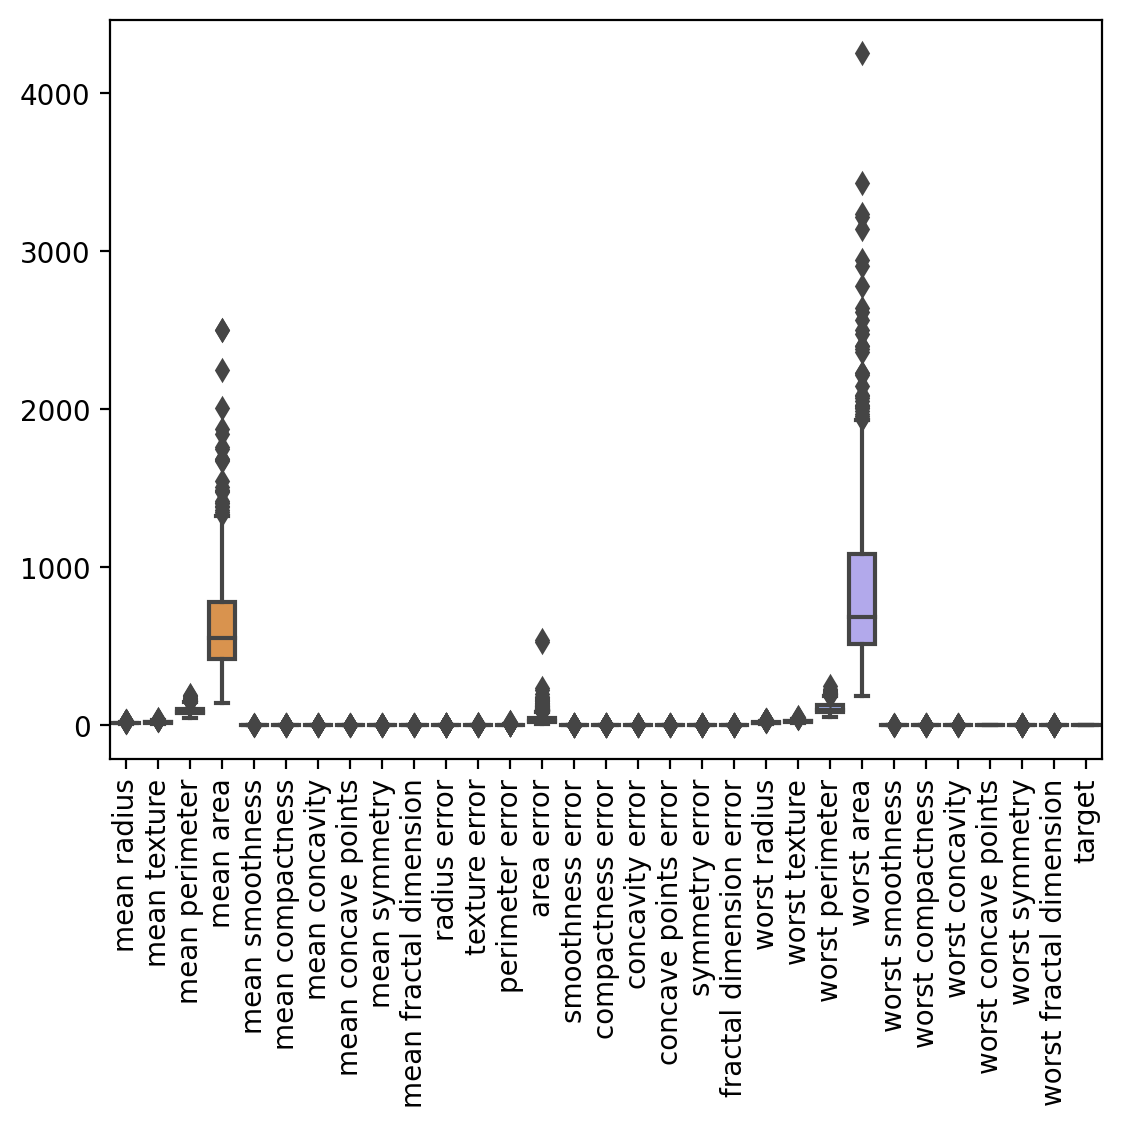

In [6]:
sns.boxplot(data=dataset);
plt.xticks(rotation = 90);

## Data Pre-processing
Before we proceed to feature selection and modelling, our data must be preprocessed in order for our machine learning models to work efficiently and effectively.

### Normalizing Skewed Data
Now, it can be observed that almost all of our features were having a long tail on the right indicating that they are skewed.
Thus, log transformations should be applied in order to normalize the data.

### Scaling the Features
Based on the above box plots, `mean area`, and `worse area` contains values that reaches above 2000, while majority of the features does not. This indicates that our features were unscaled and this can affect the performance of our machine learning model. To address this, we will conduct standard scaler to balance the features magnitude with respect to their variances, and finaly a min-max scaler in order to limit all the range of values between zero and 1.

### Building the Preprocessing Pipeline
The code below will define a preprocessing pipeline using Scikit-Learn. This pipeline will perform a log transform, then standard scaling, and finally min-max scaling.

In [7]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# Define the Transformers to be used
function_transformer = FunctionTransformer(func=np.log1p), # For normalizing skewed data
standard_scaler = StandardScaler(), # For scaling features according to their variances
minmax_scaler   = MinMaxScaler(), # For limiting all the feature values between zero and 1.

# Build the preprocessing Pipeline
pipeline_preprocessing = Pipeline(
    steps = [
        ("log_transformer", function_transformer[0]),
        ("standard_scaler", standard_scaler[0]),
        ("minmax_scaler", minmax_scaler[0])
    ]
)

Once the pipeline was built, we can now use it to preprocessed the input features. The code below will show the final result of the pipeline.

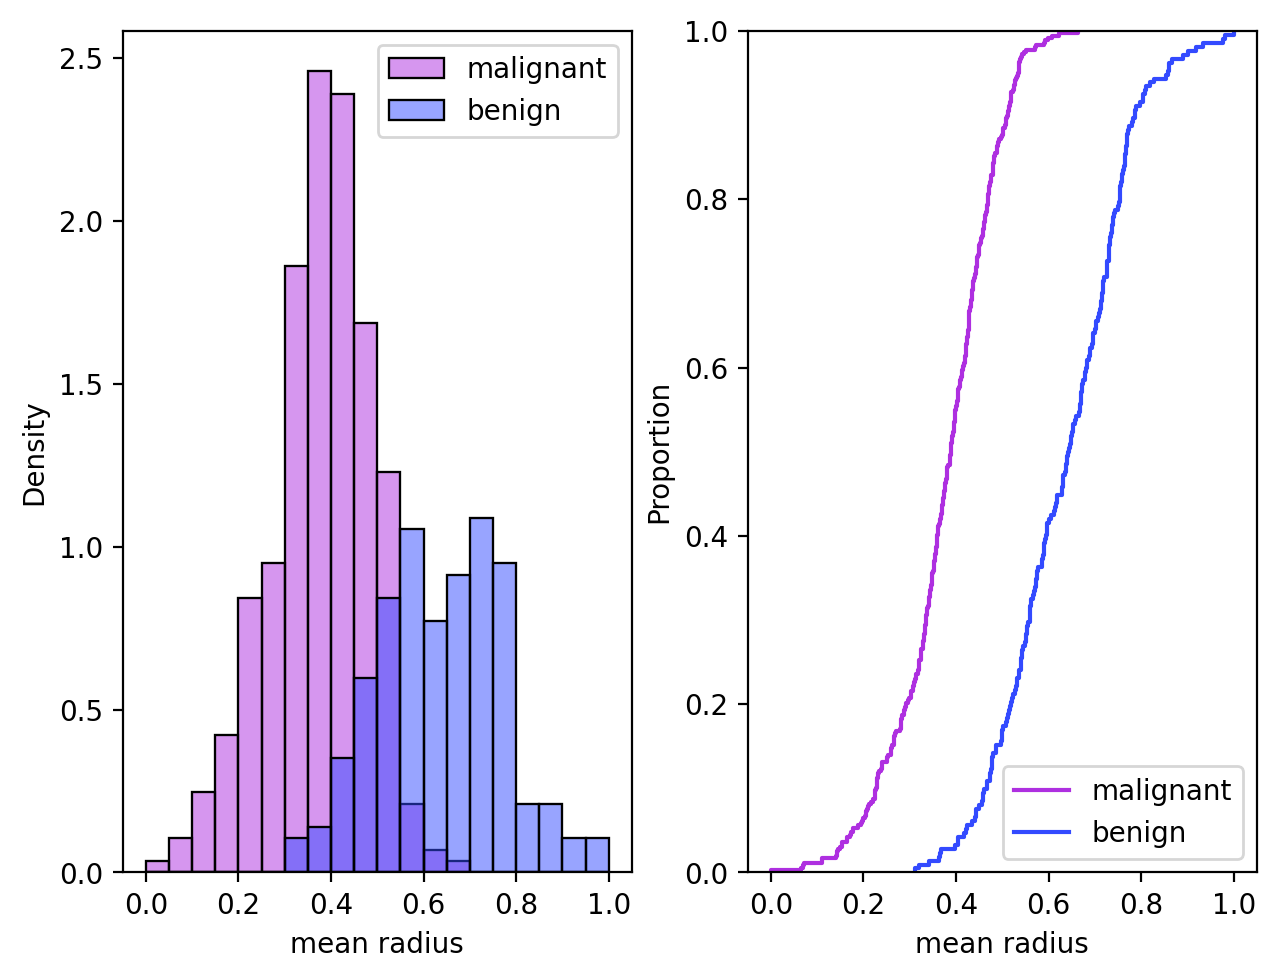

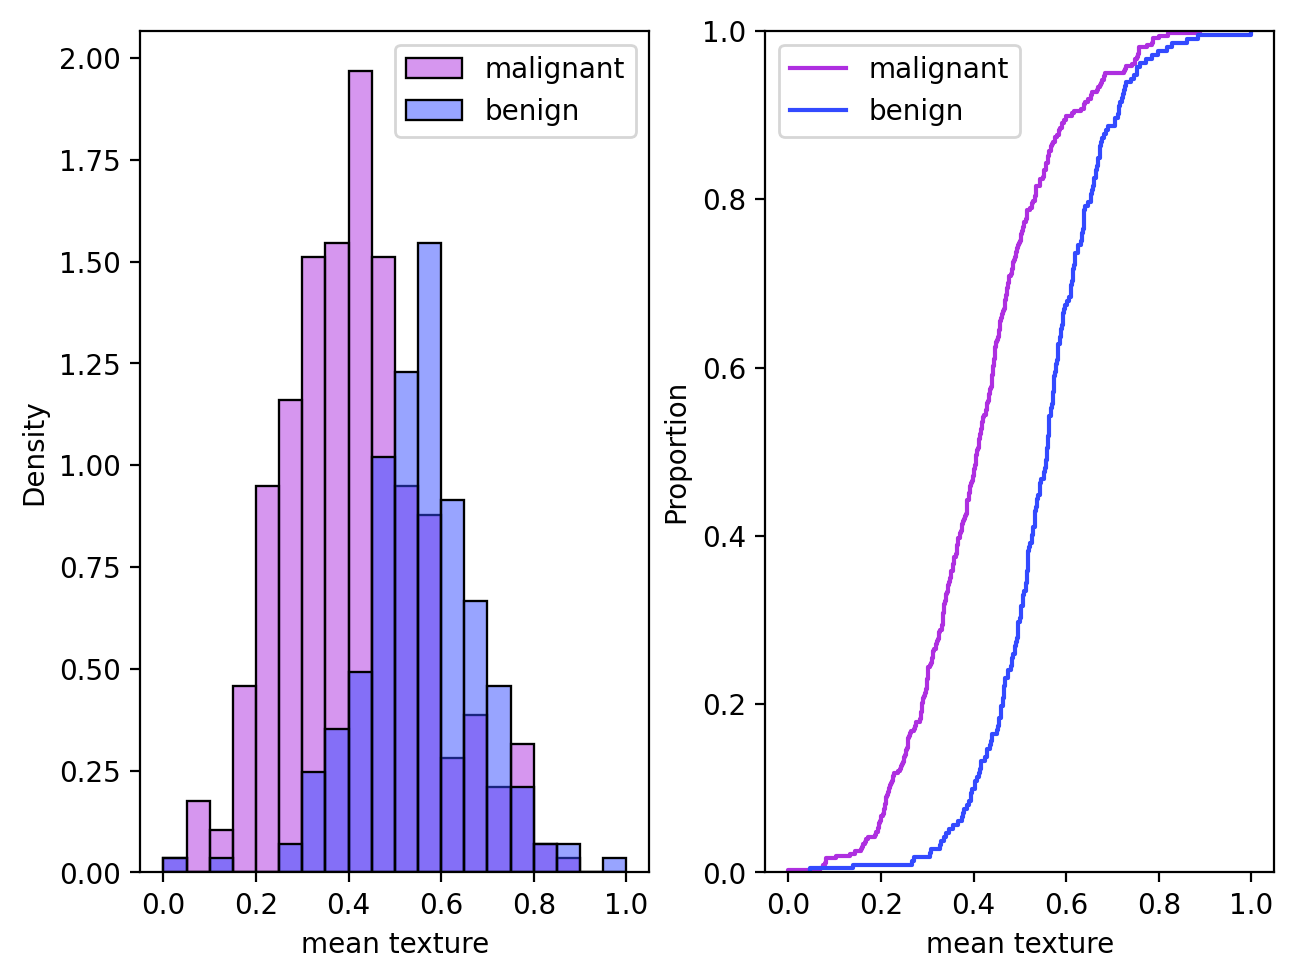

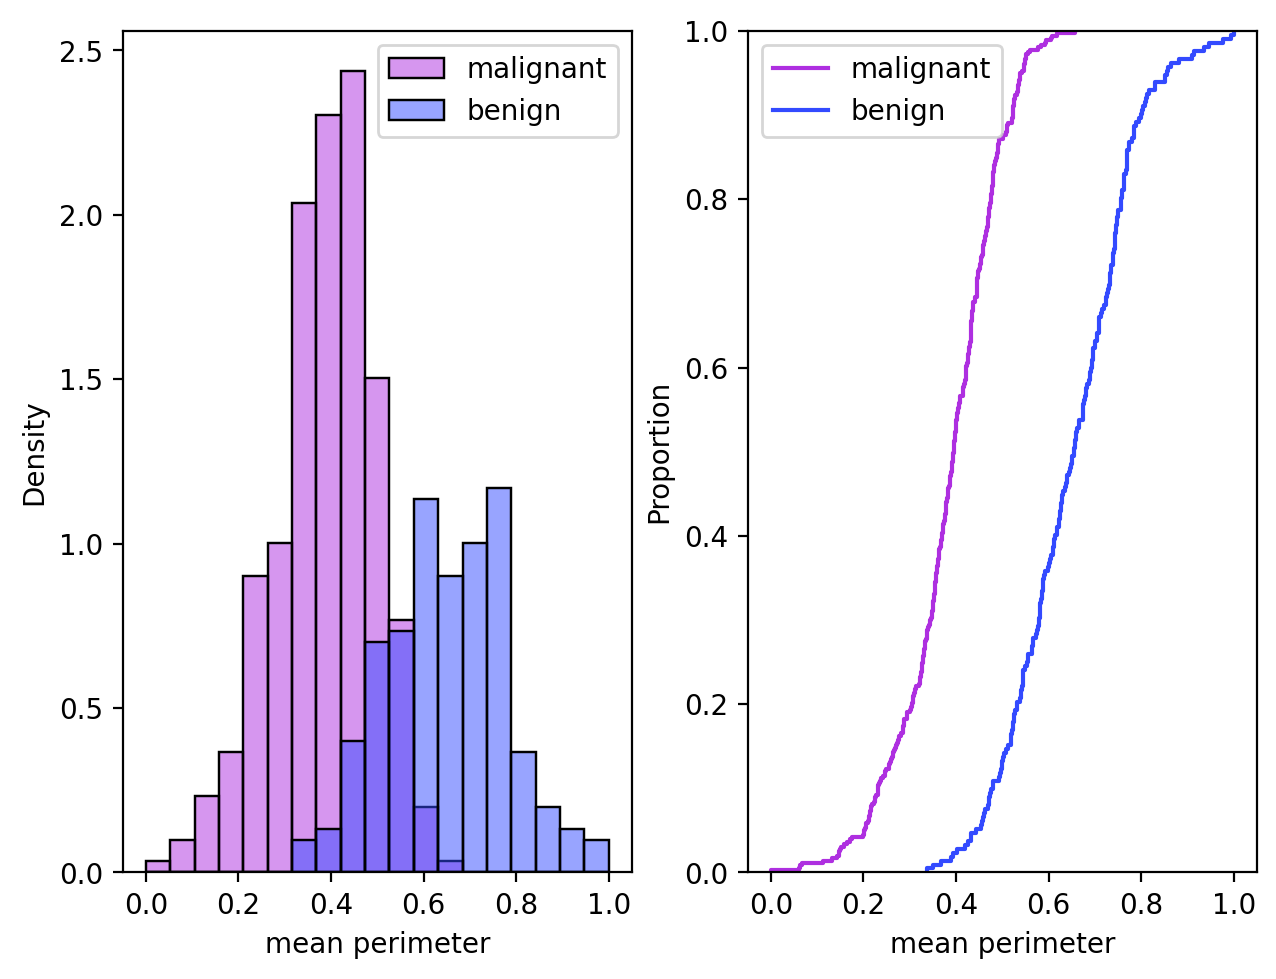

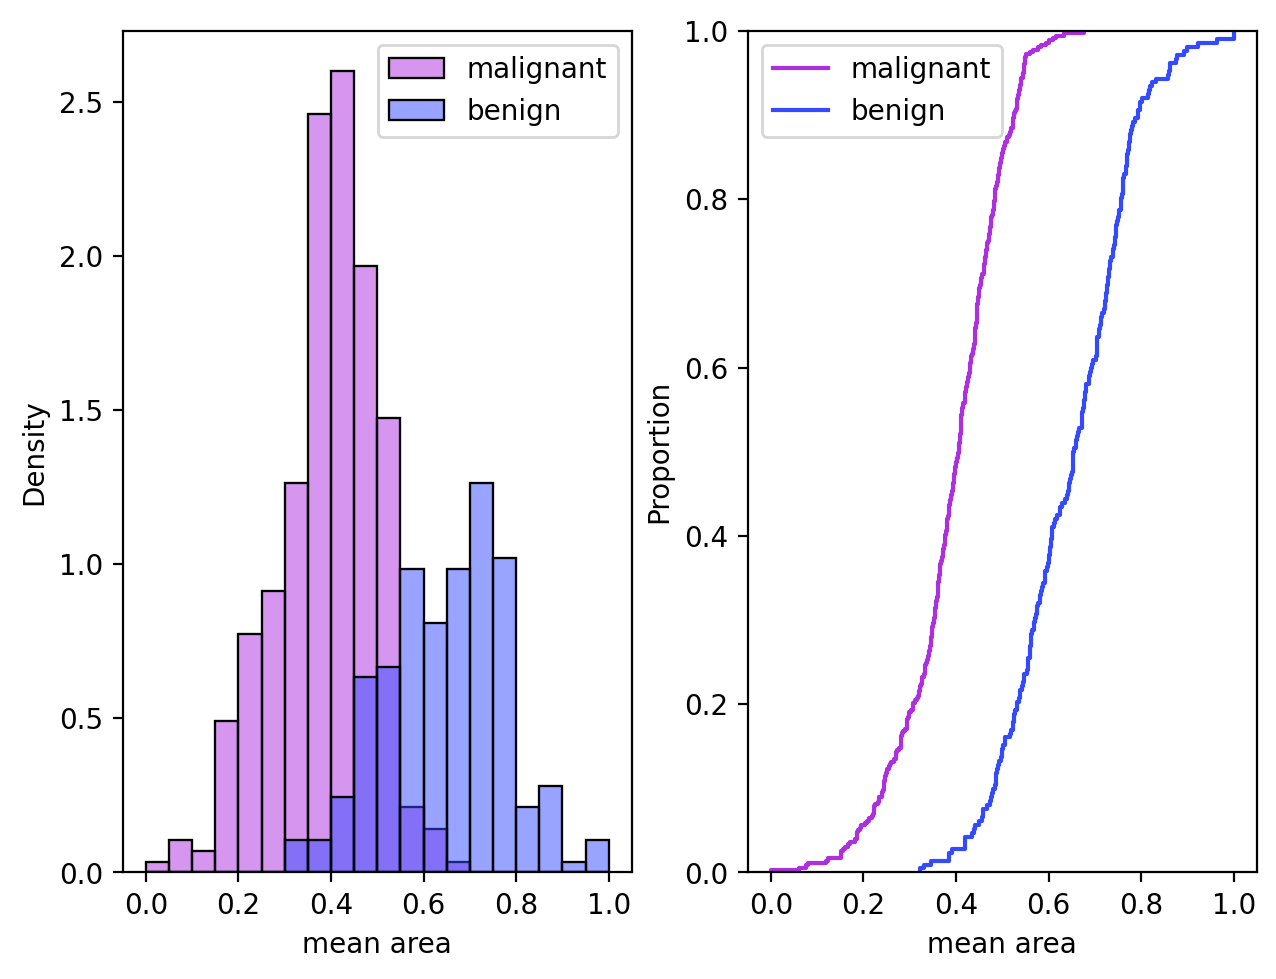

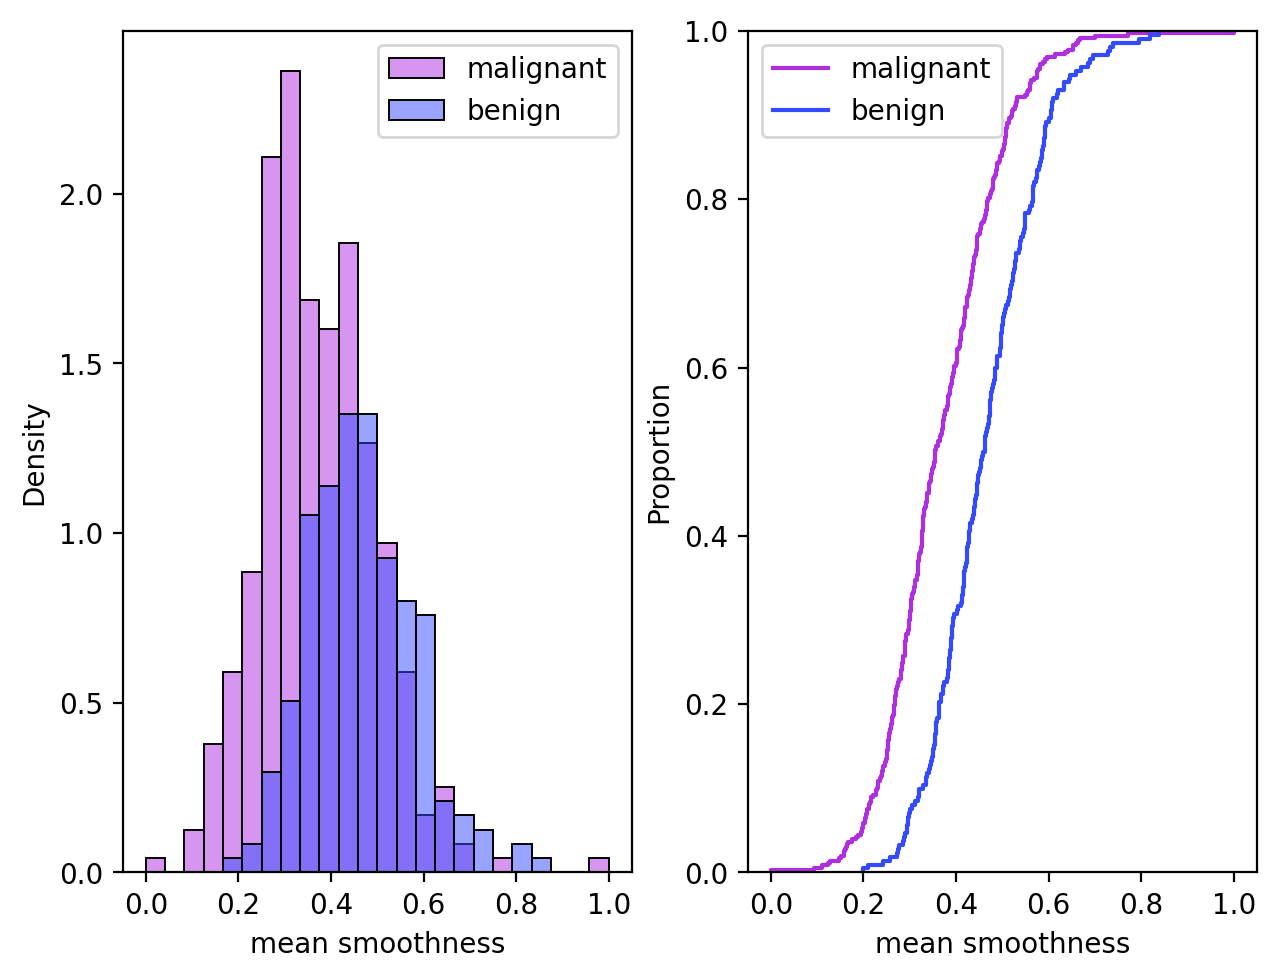

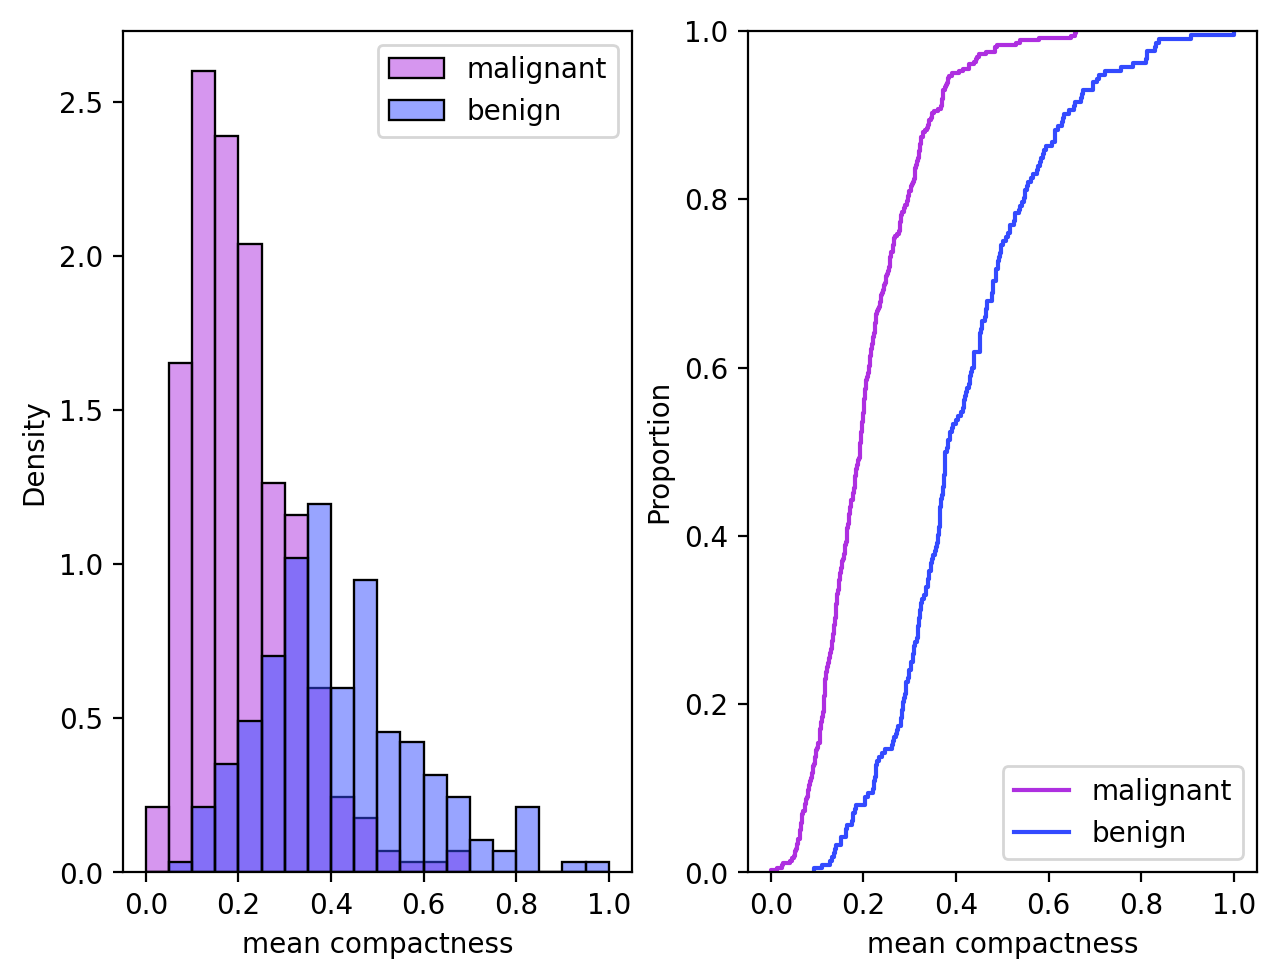

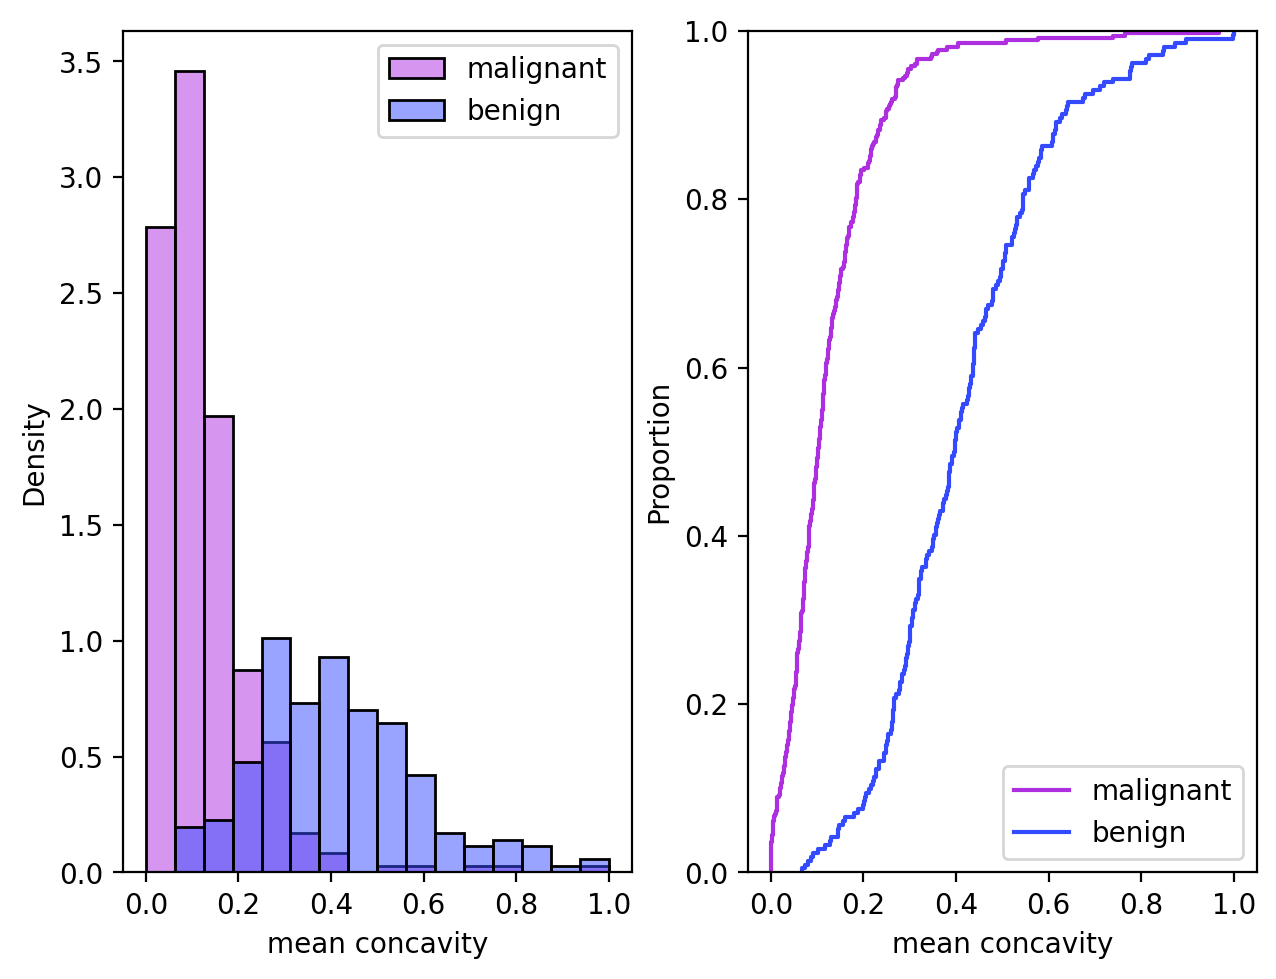

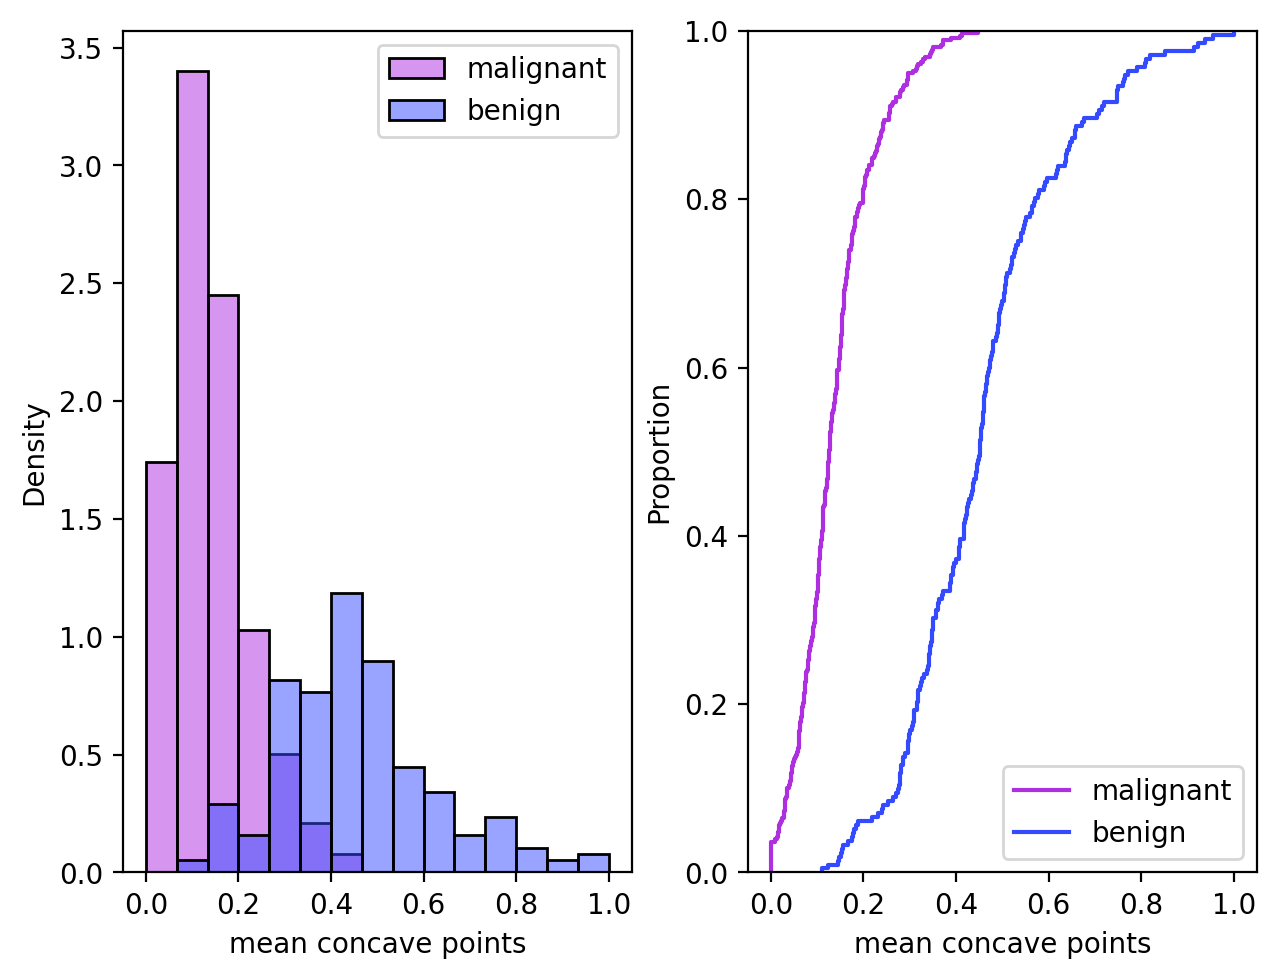

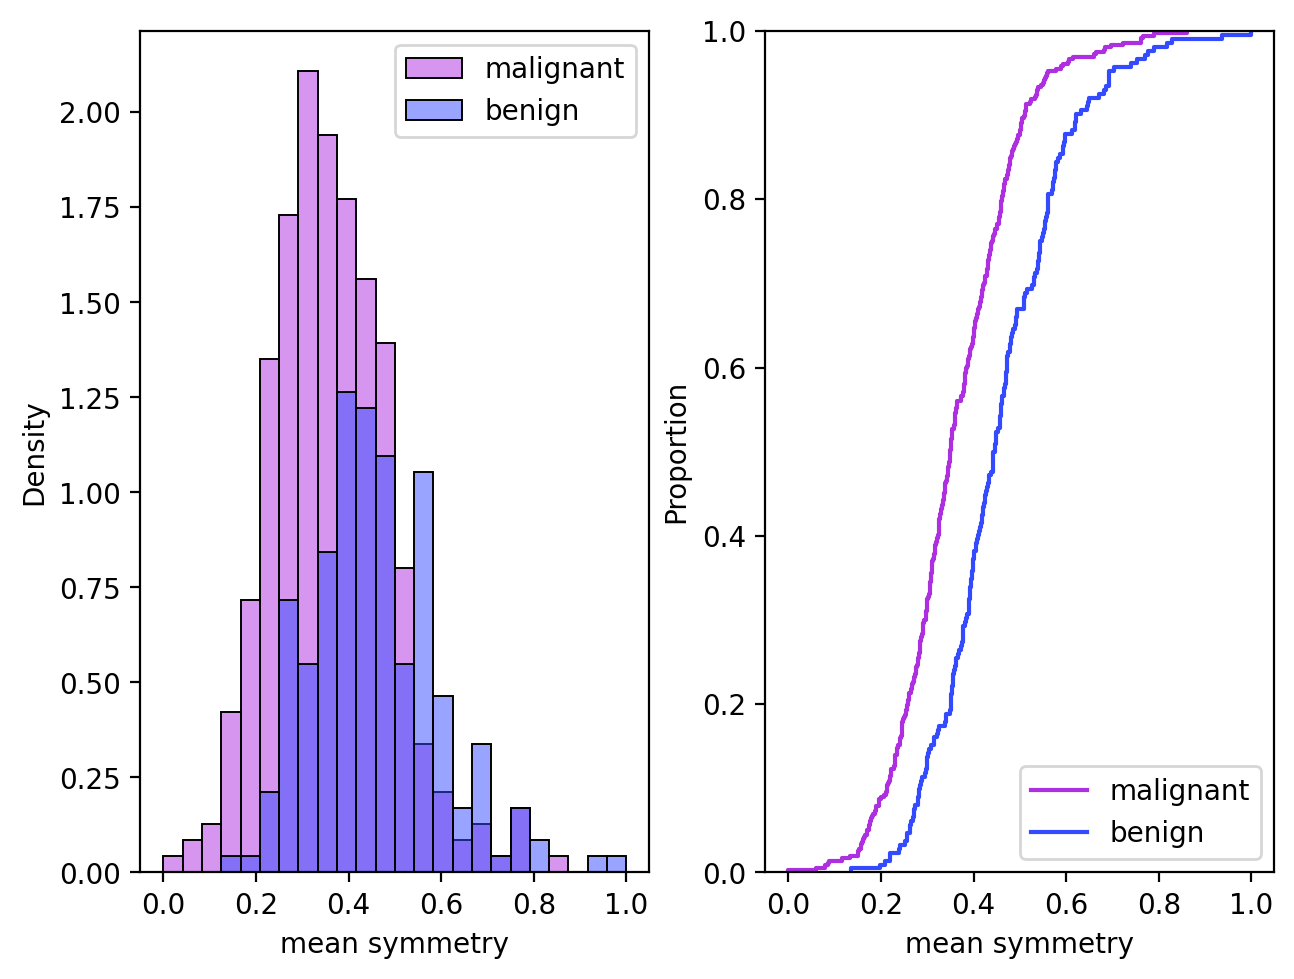

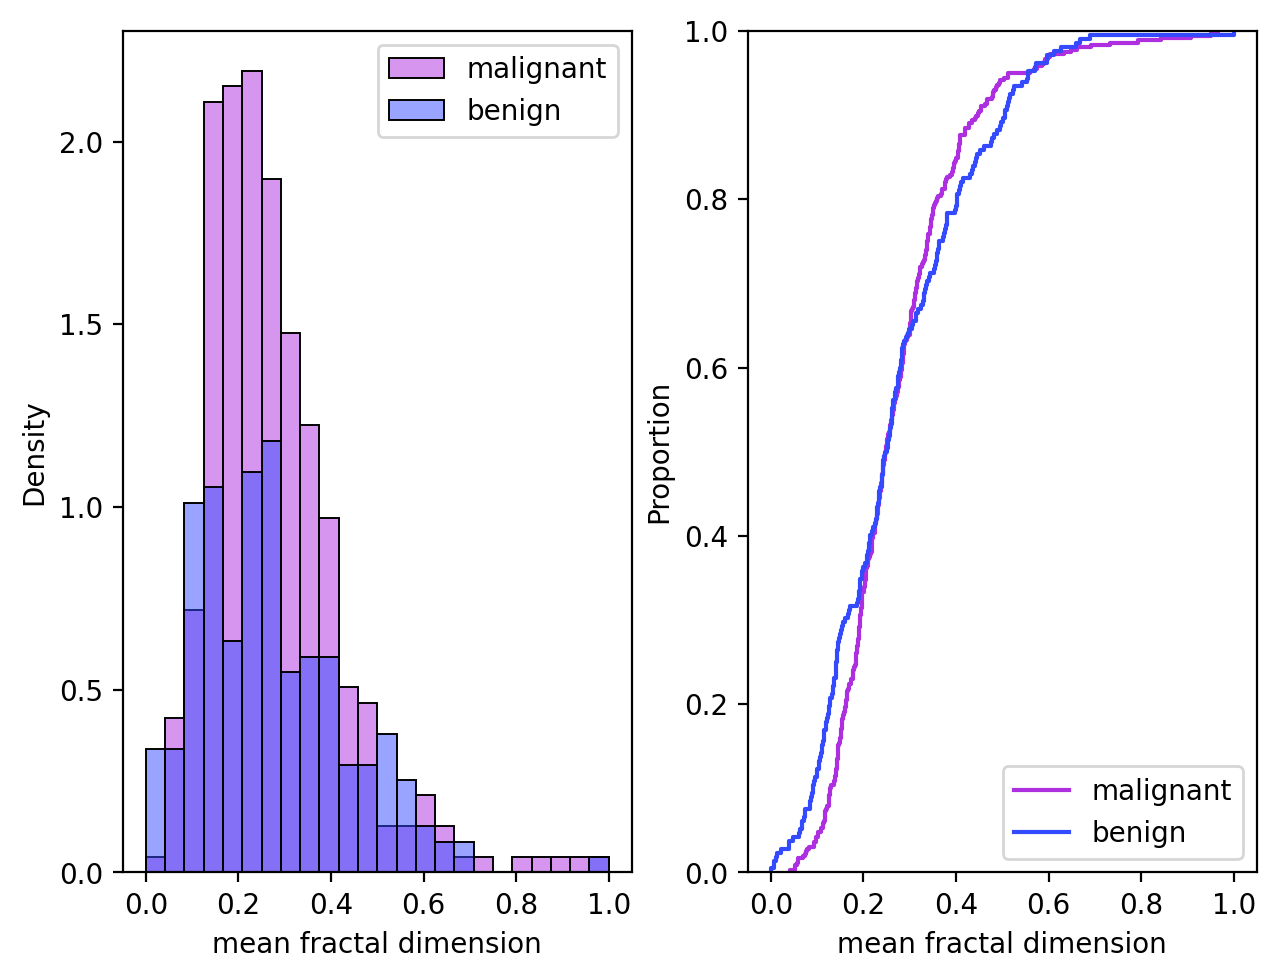

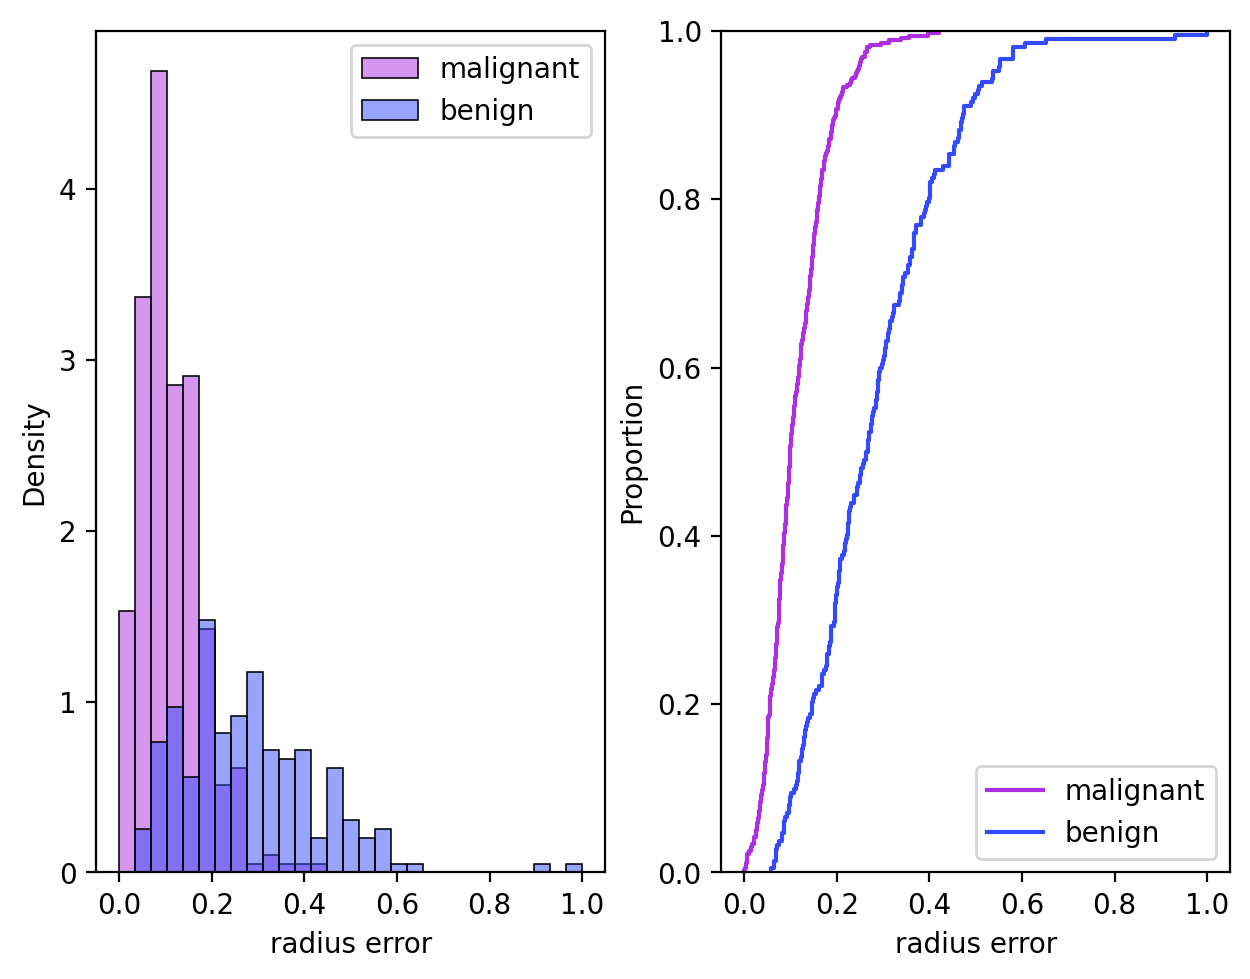

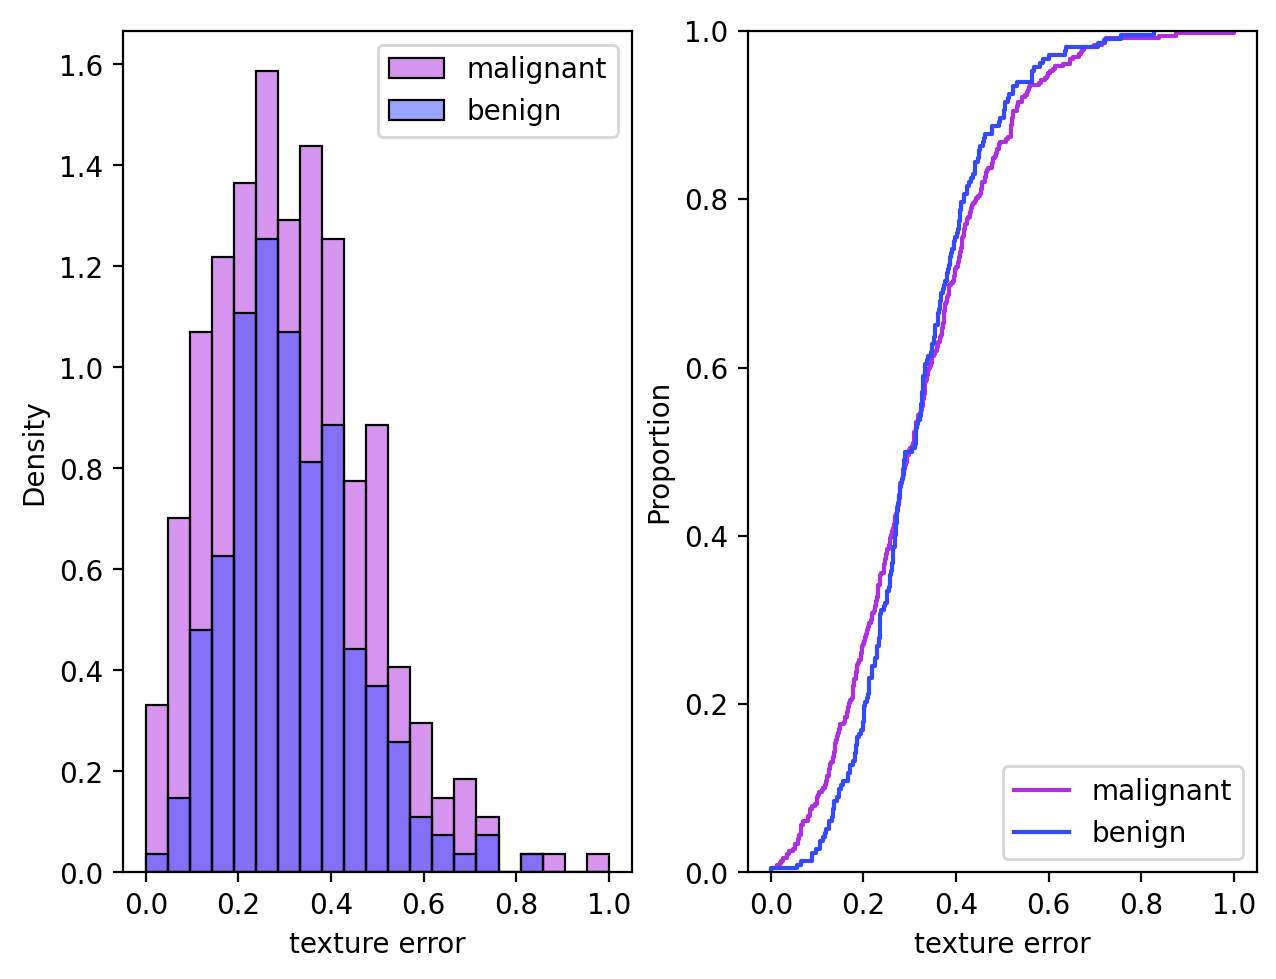

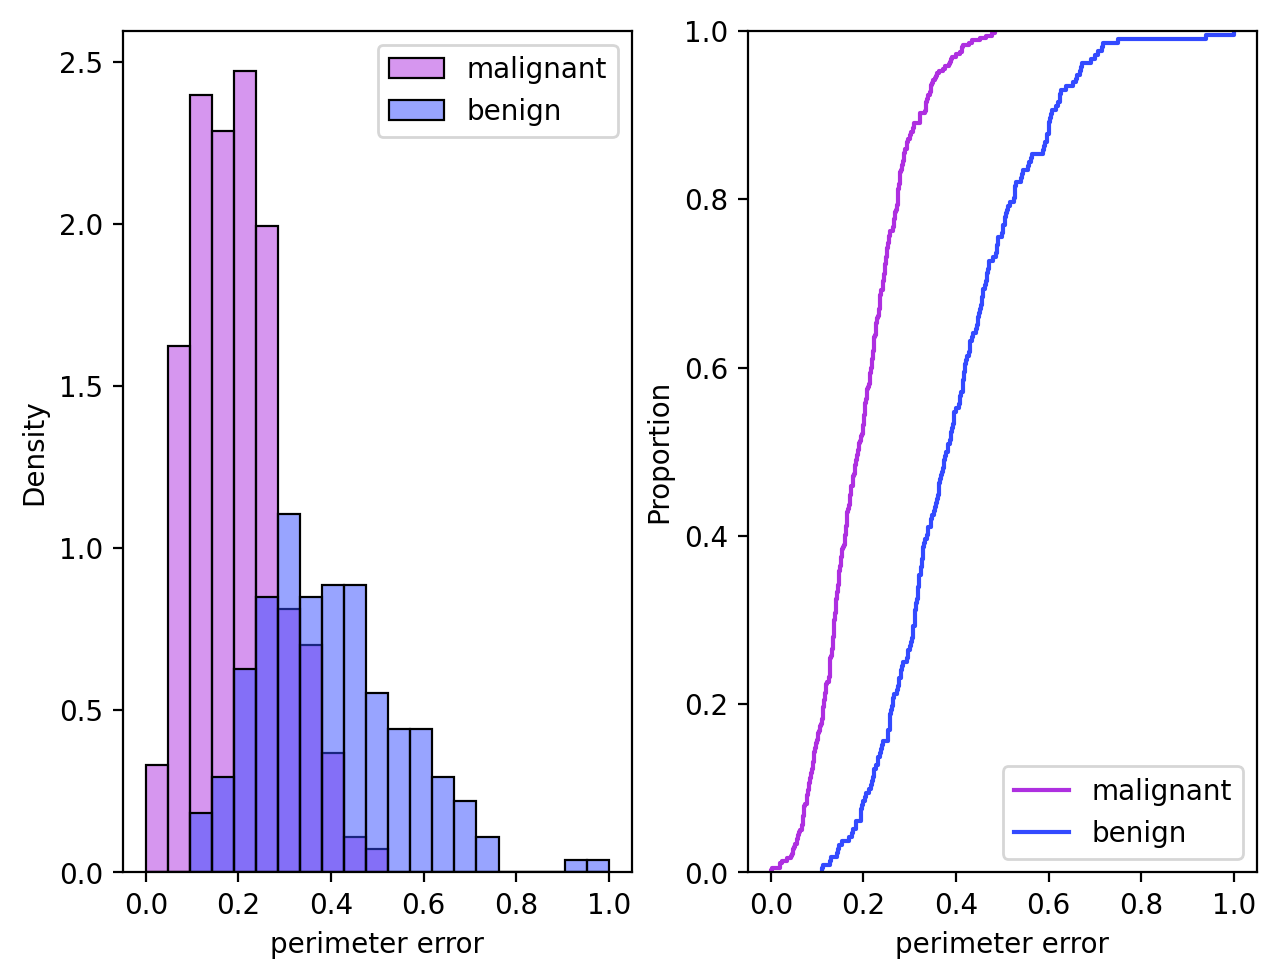

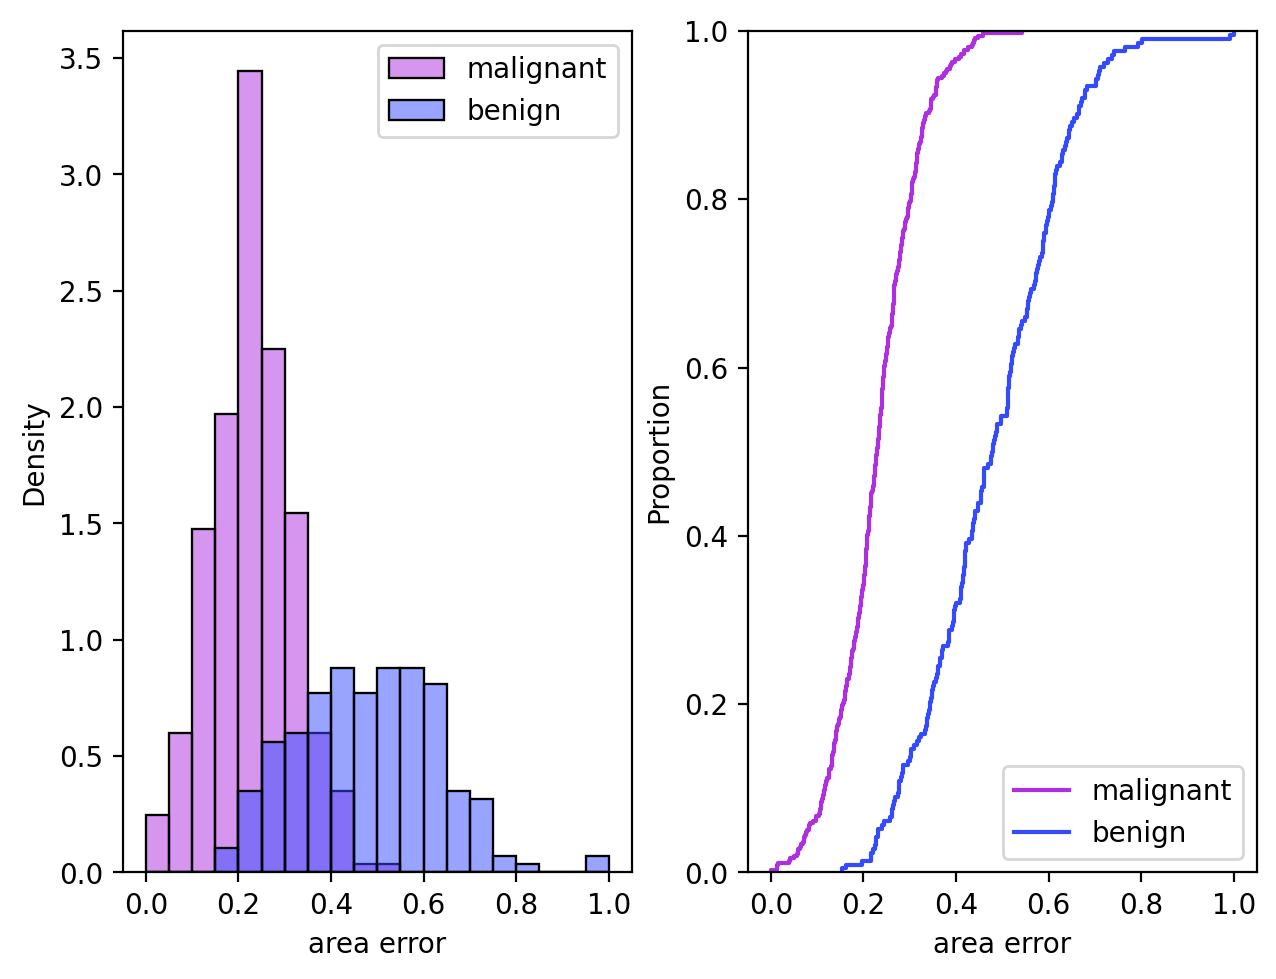

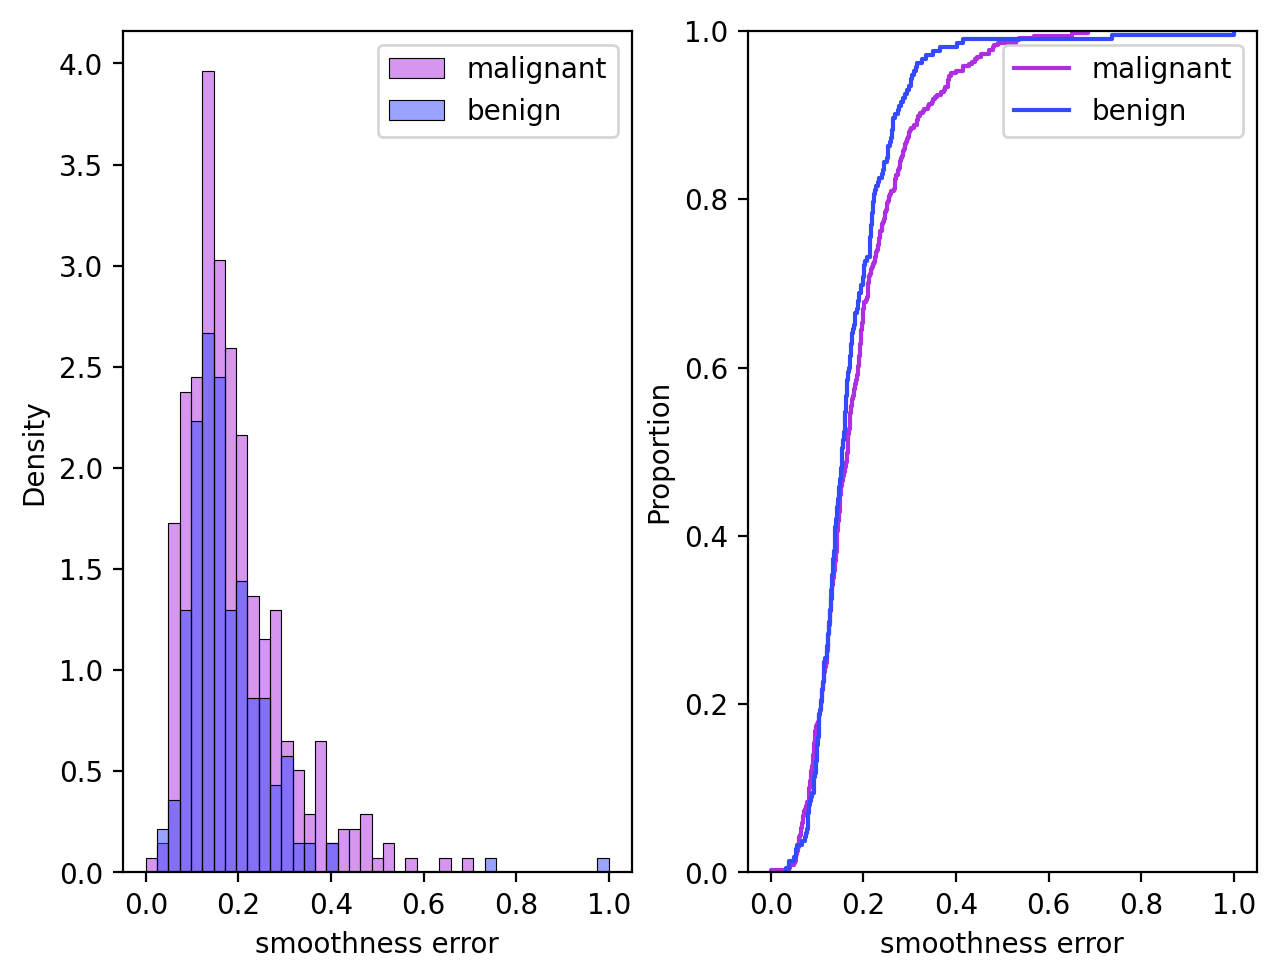

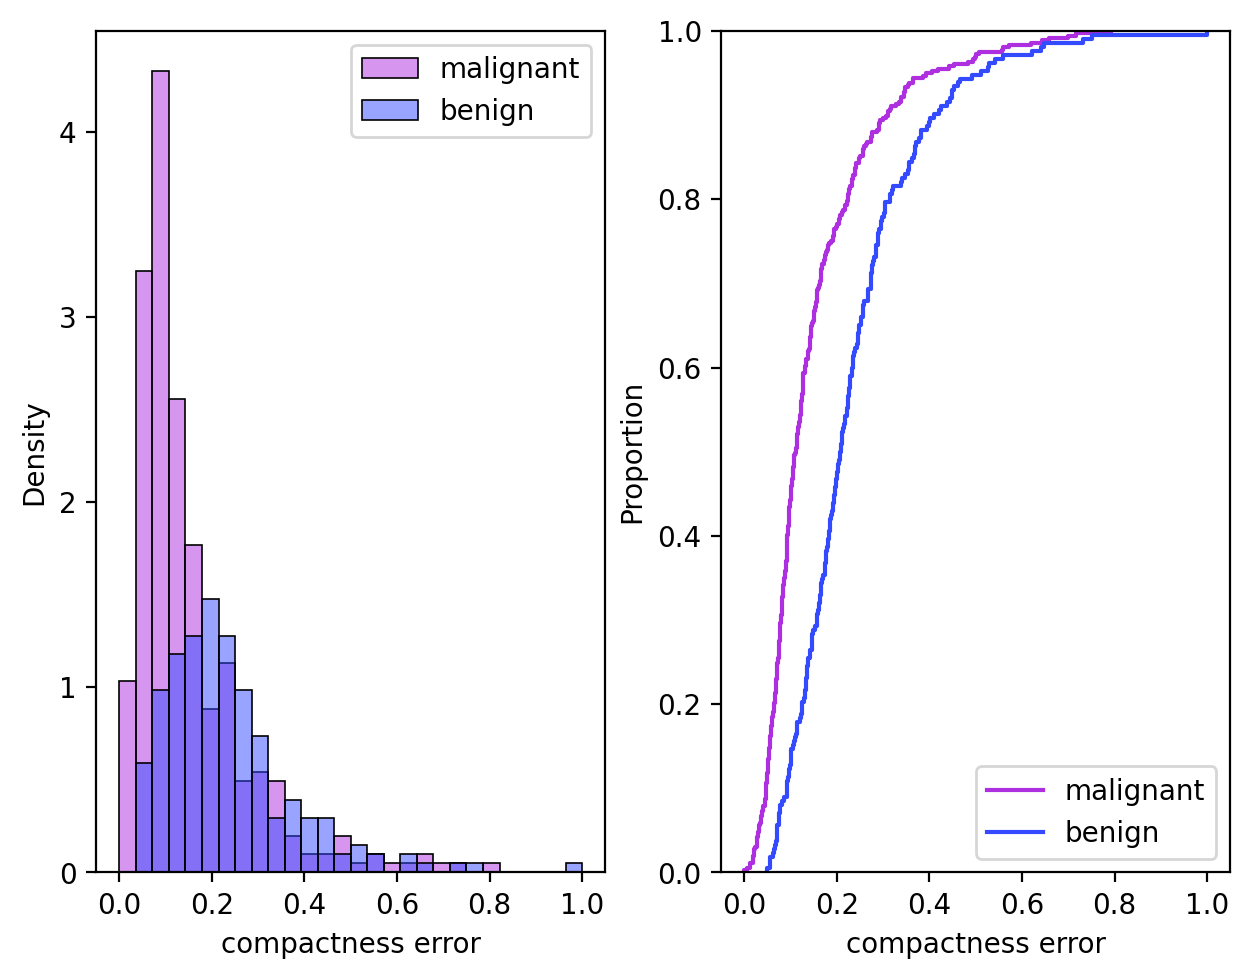

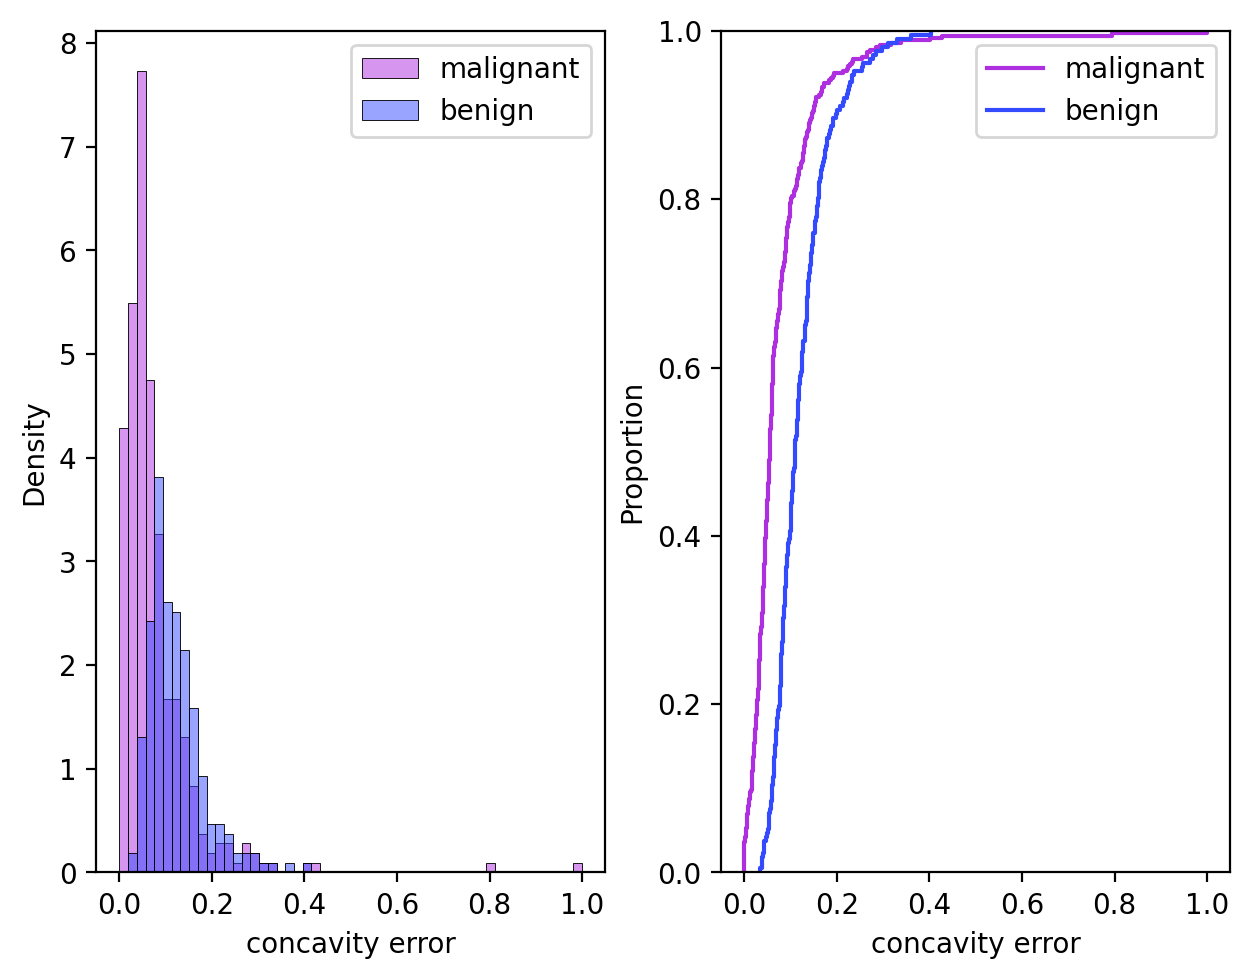

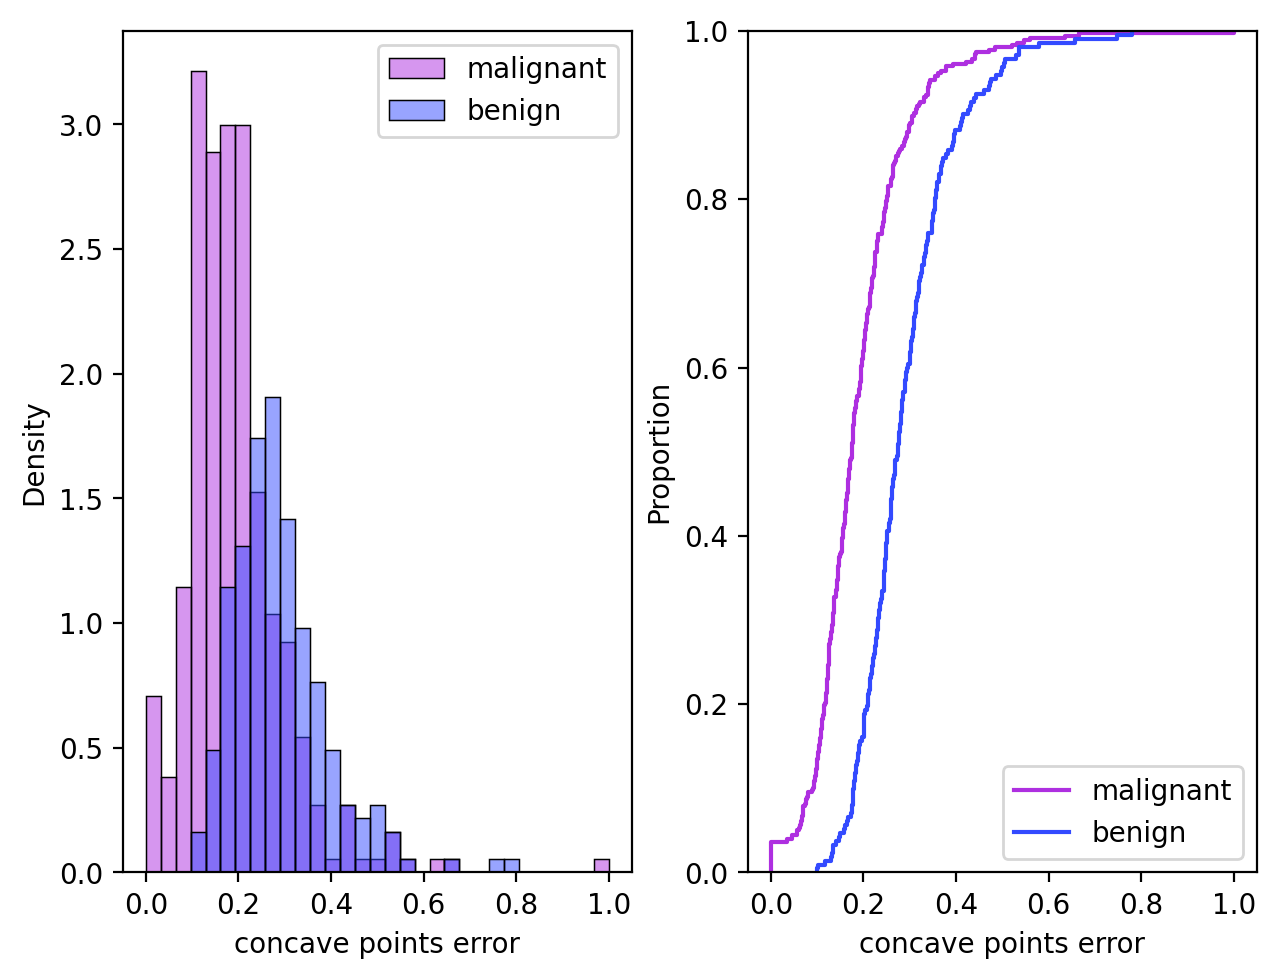

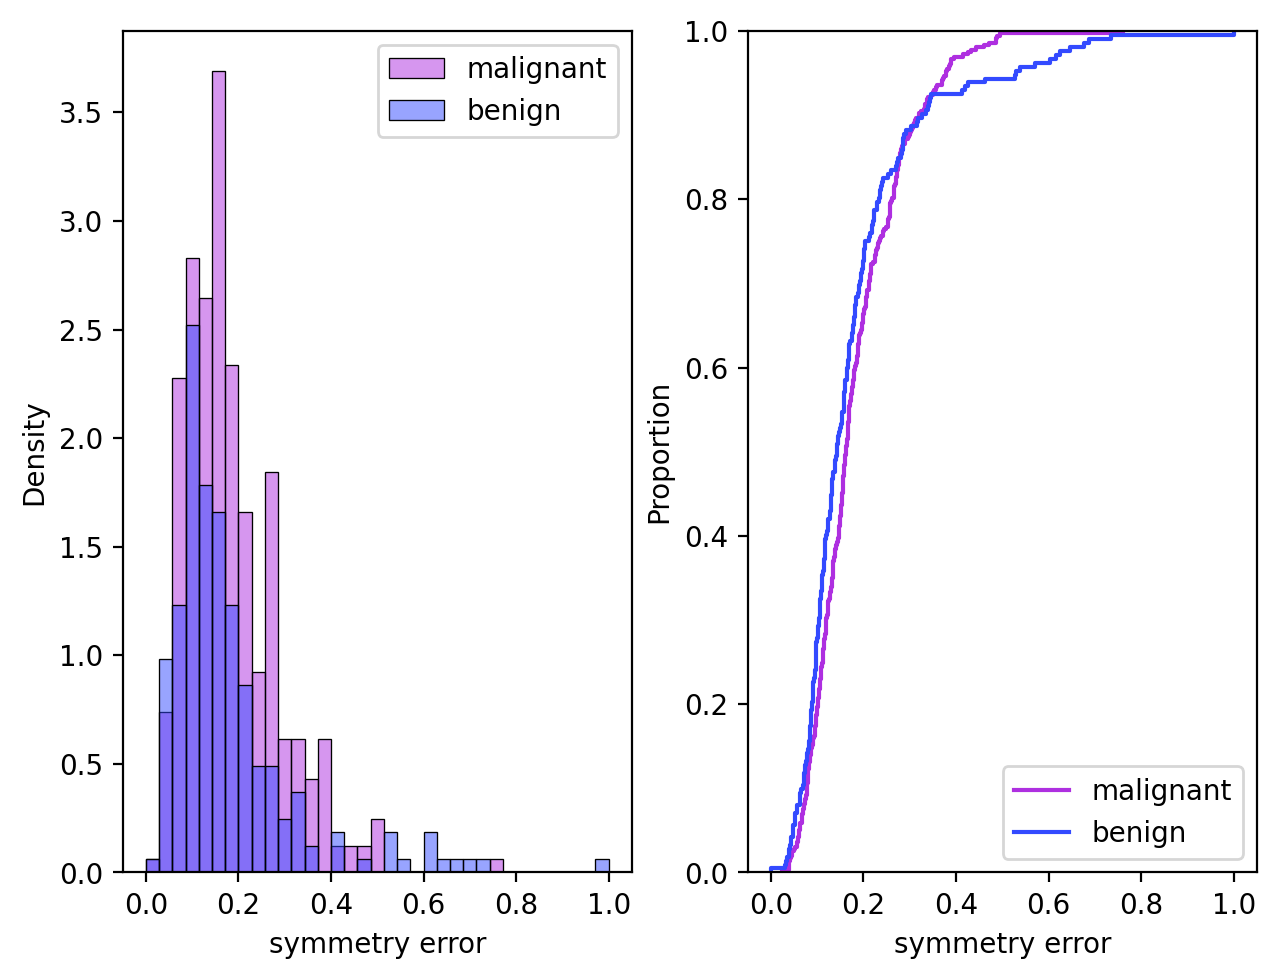

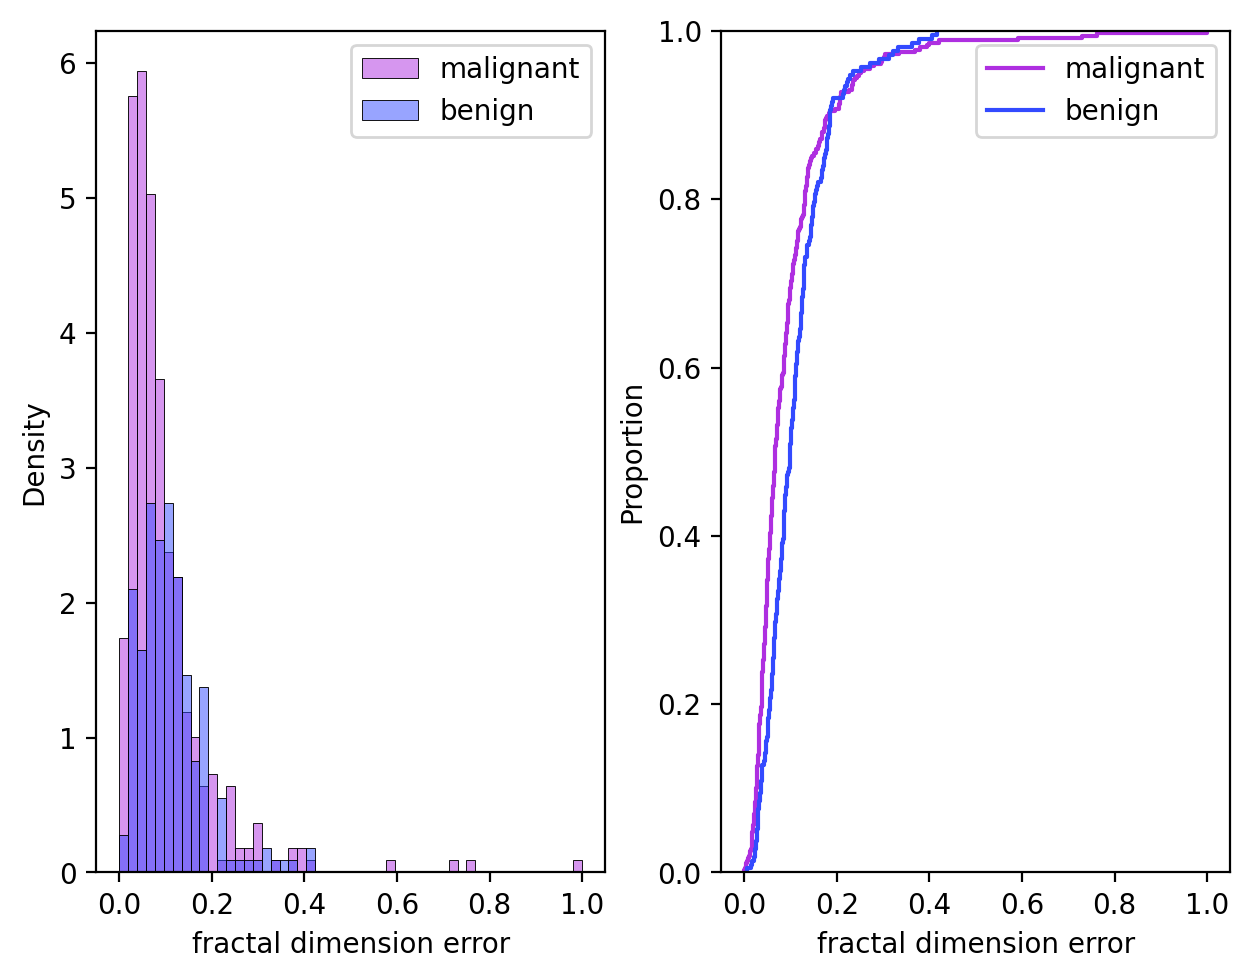

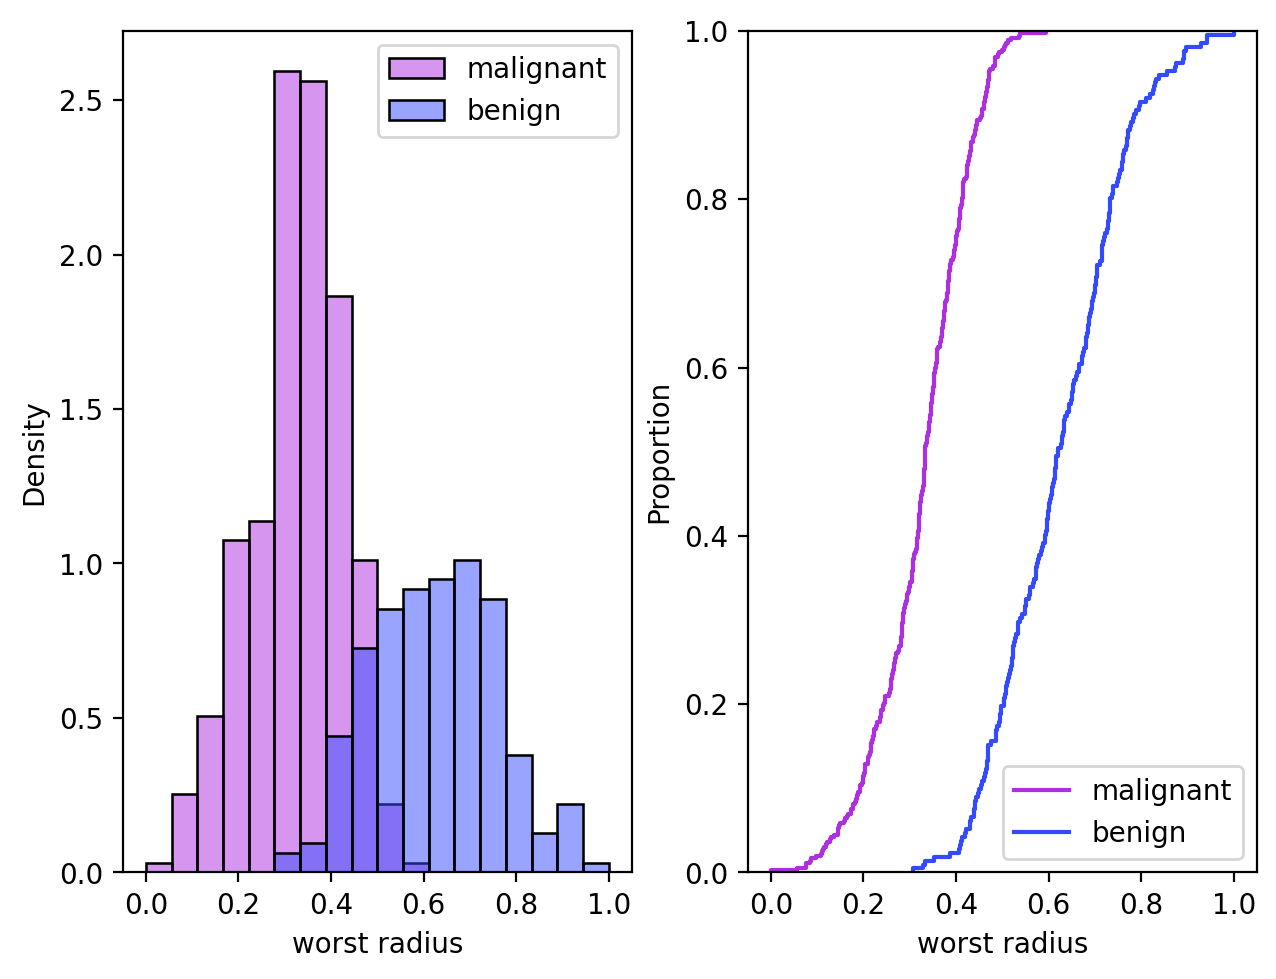

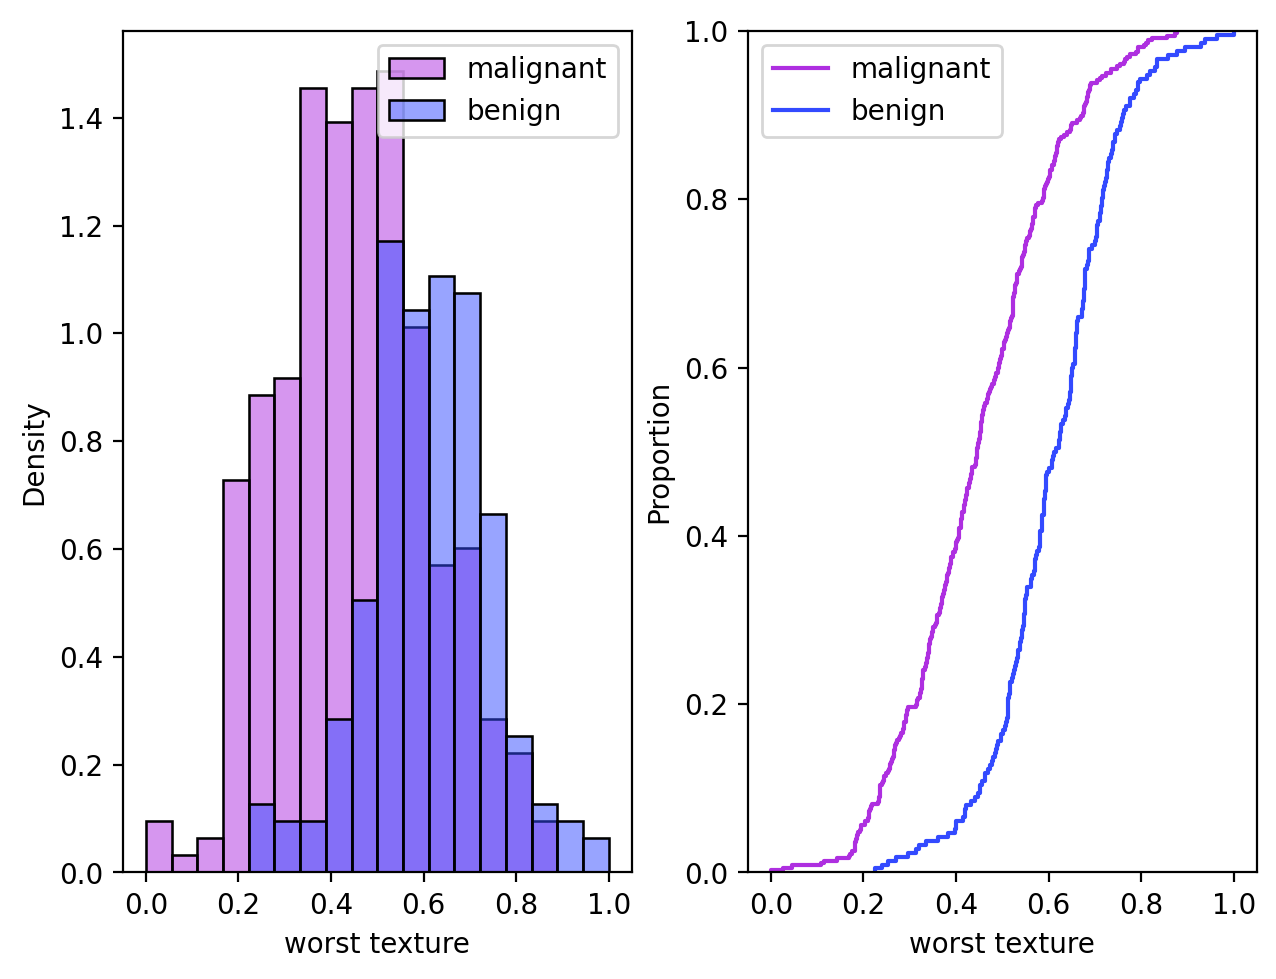

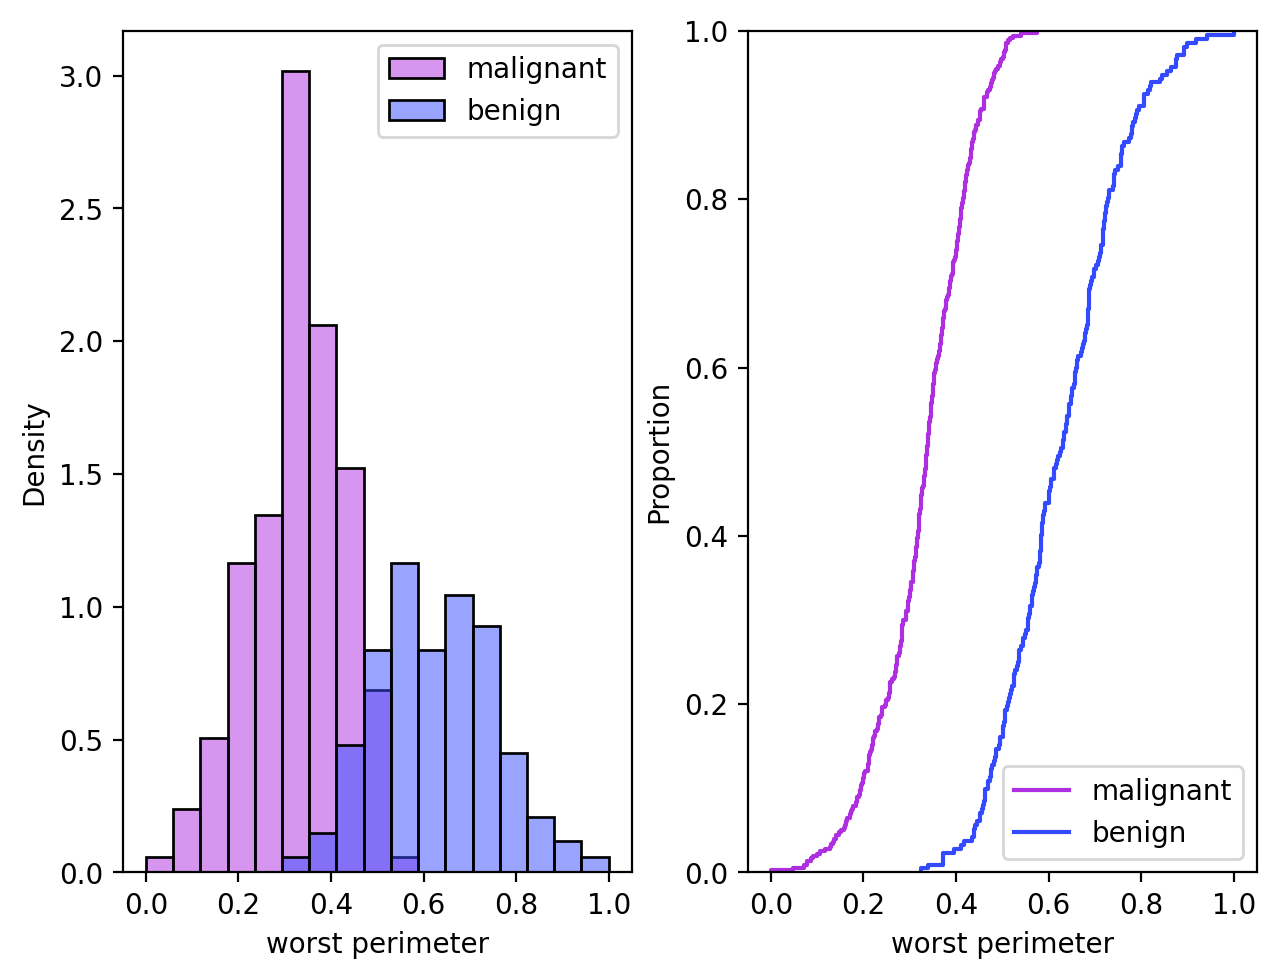

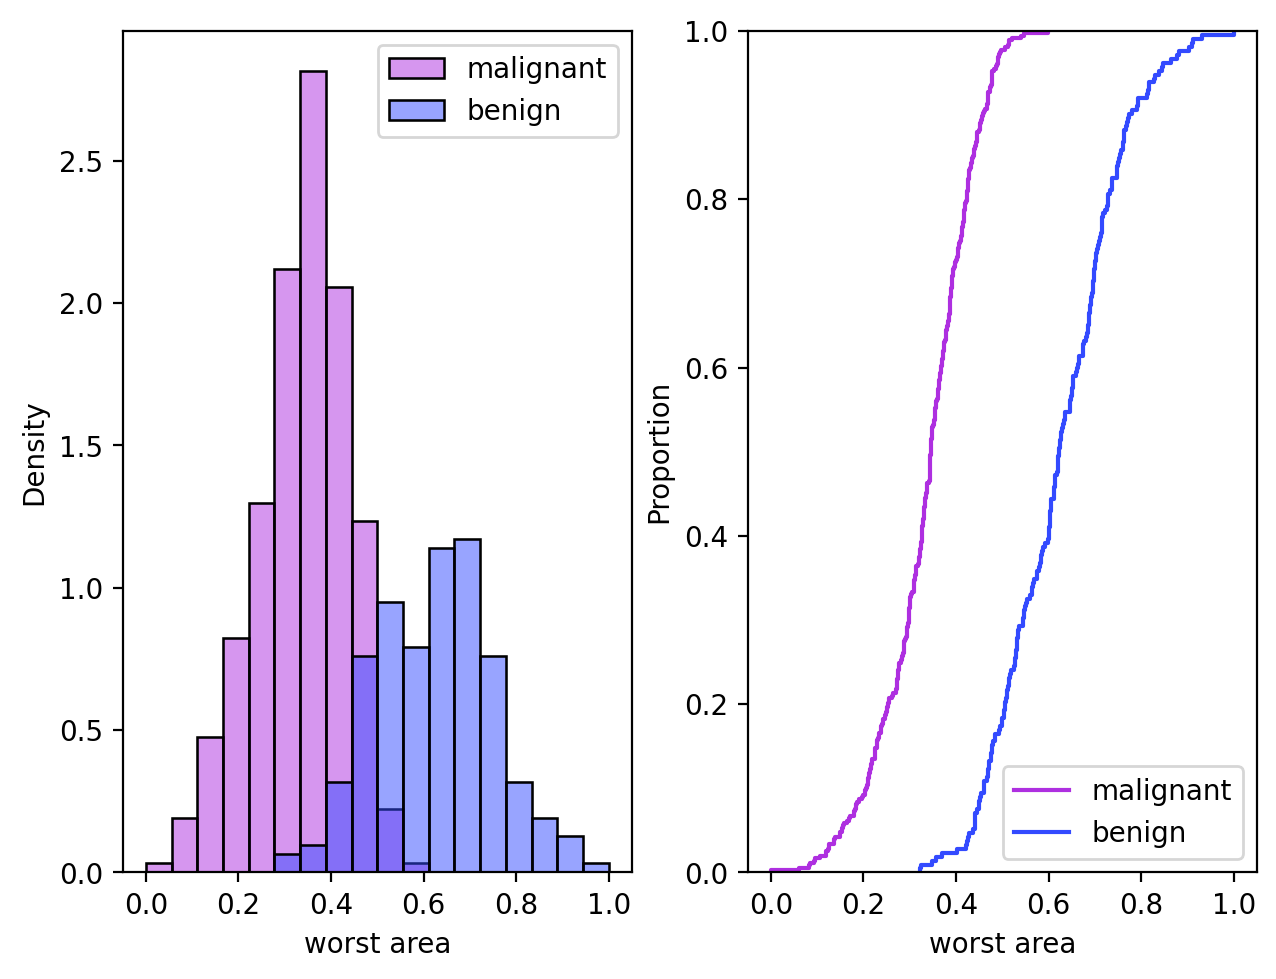

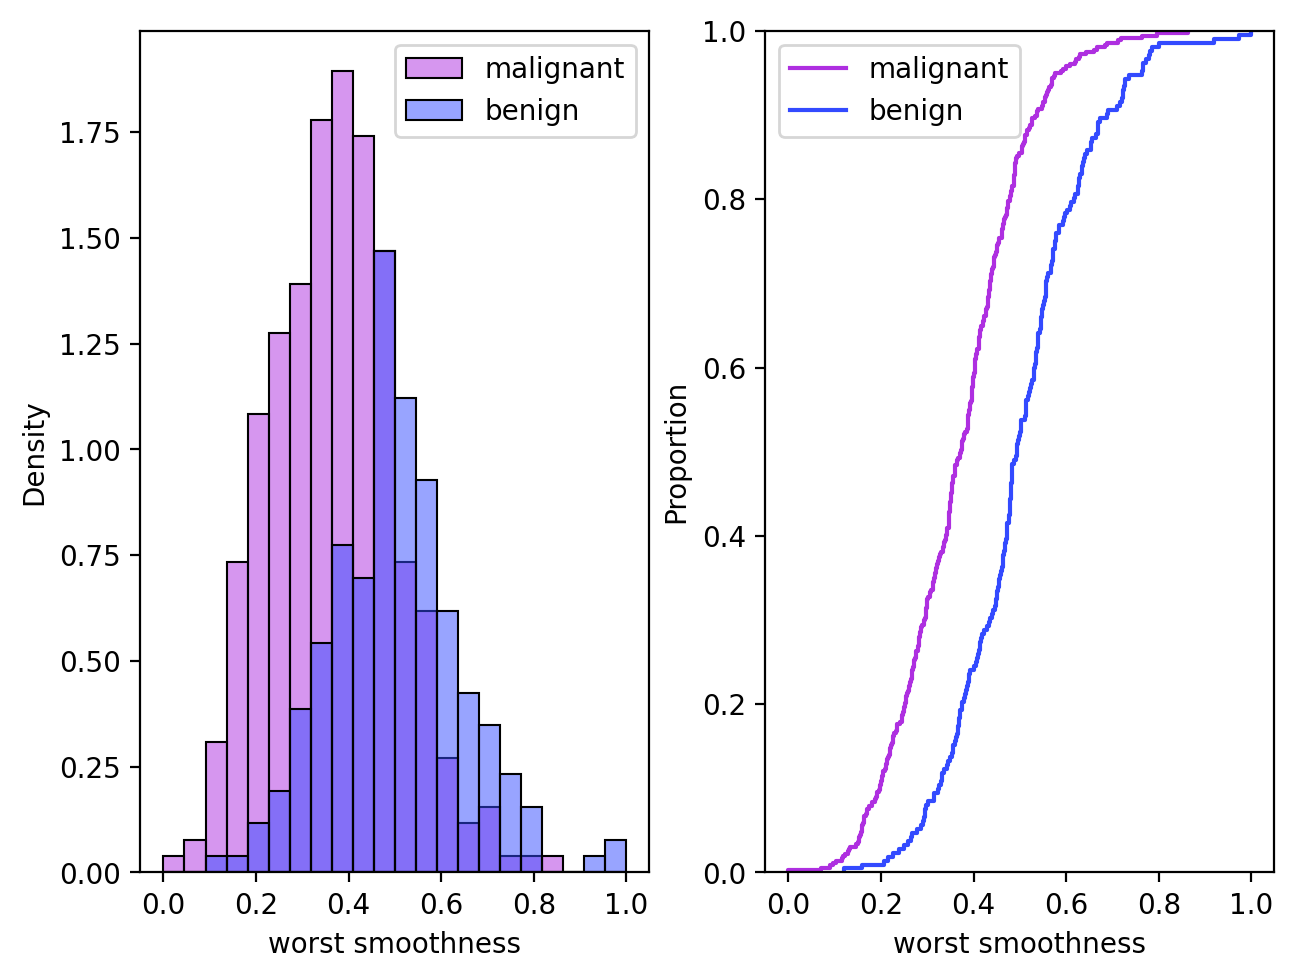

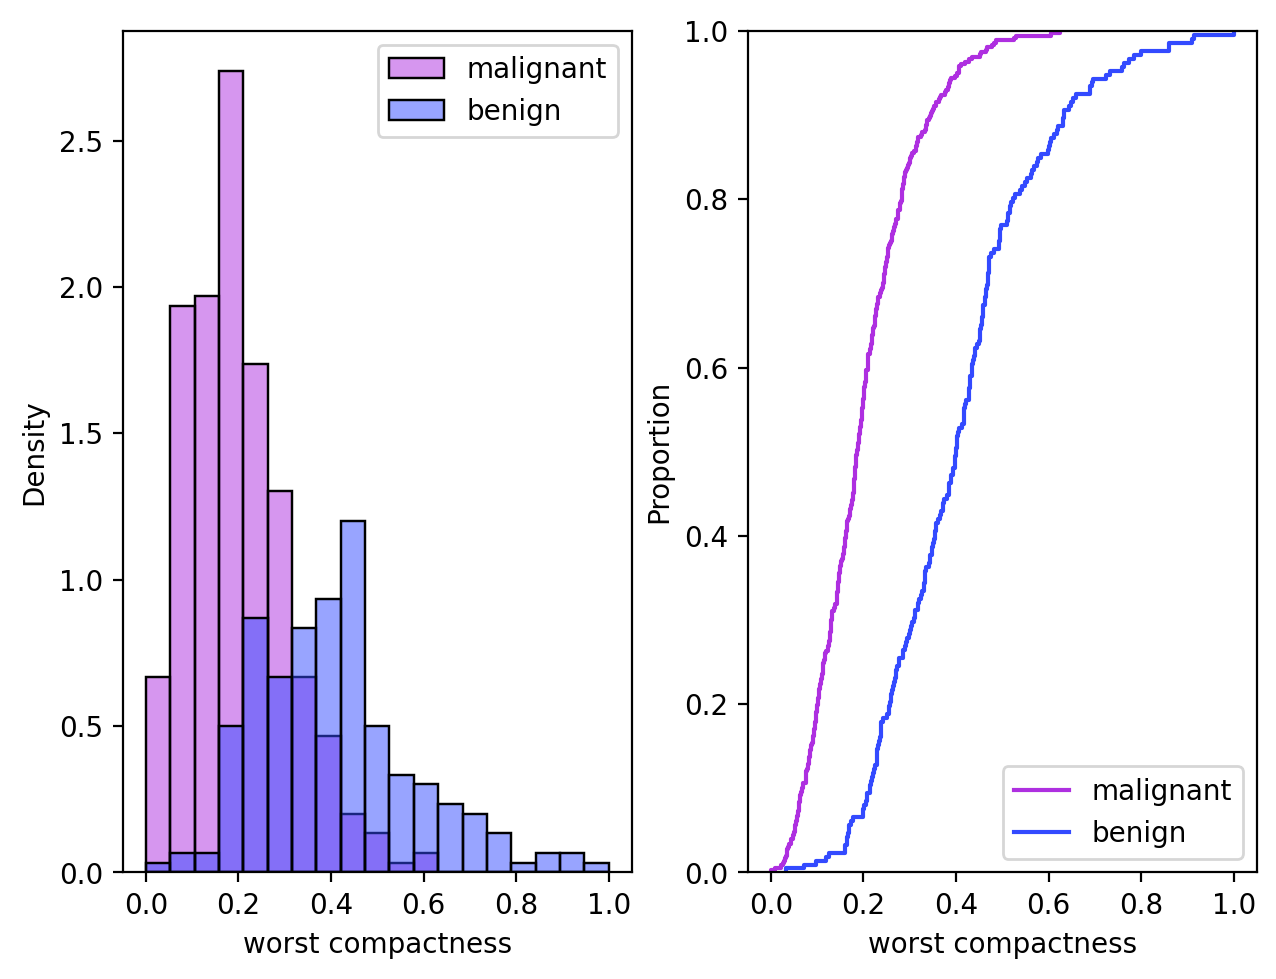

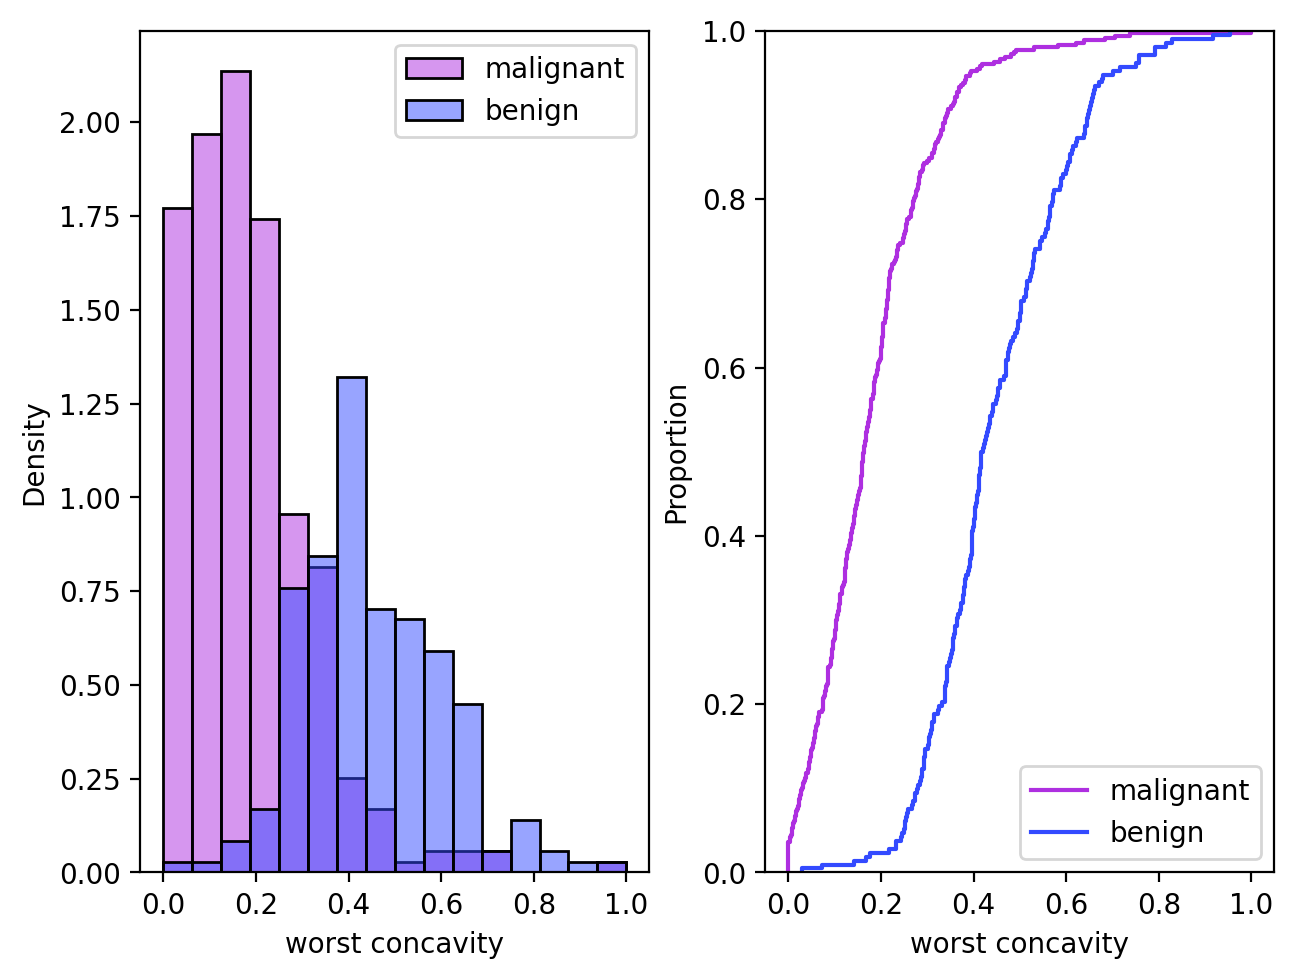

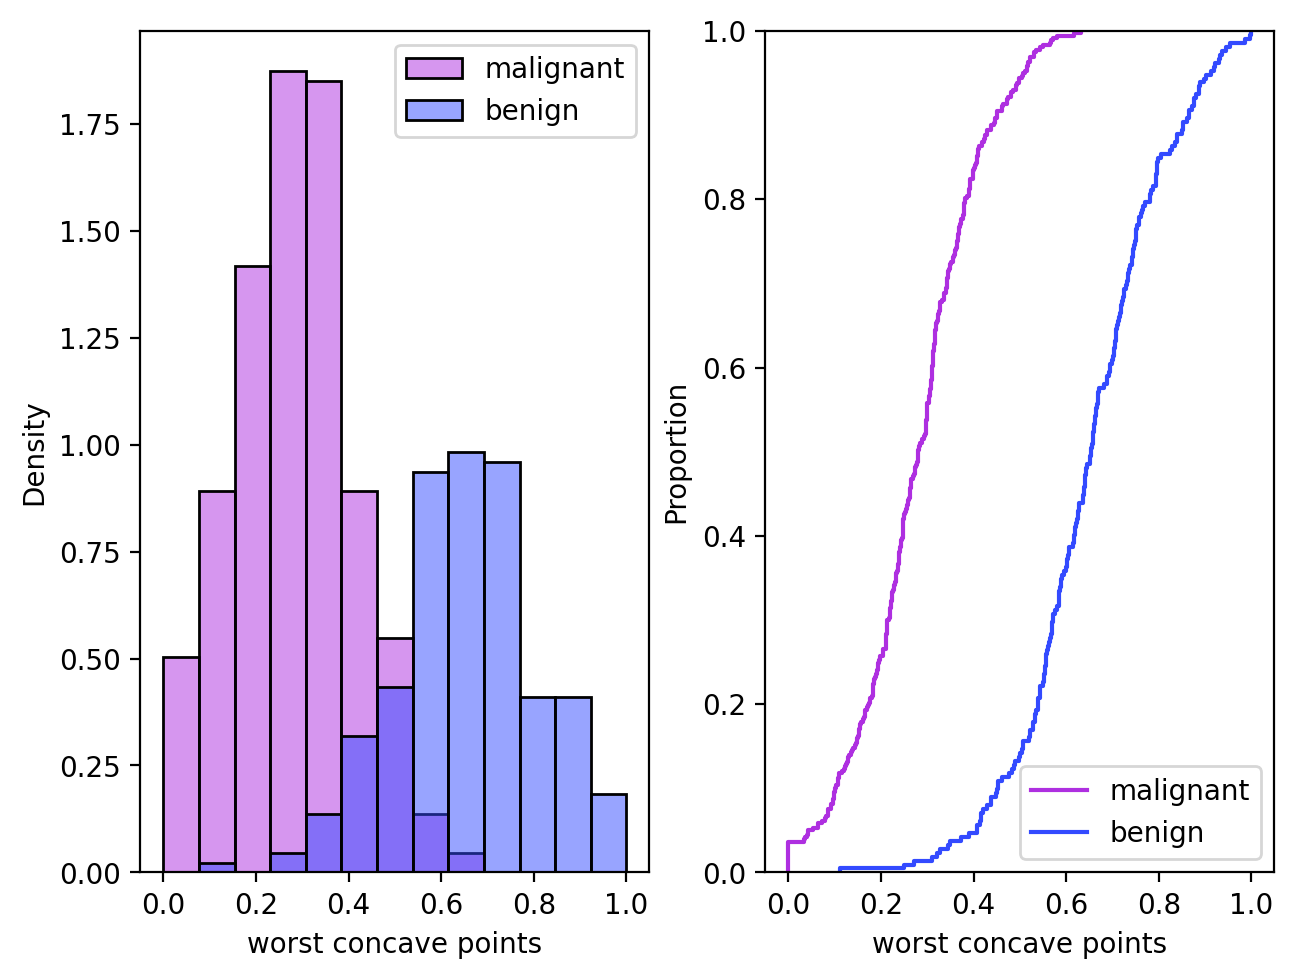

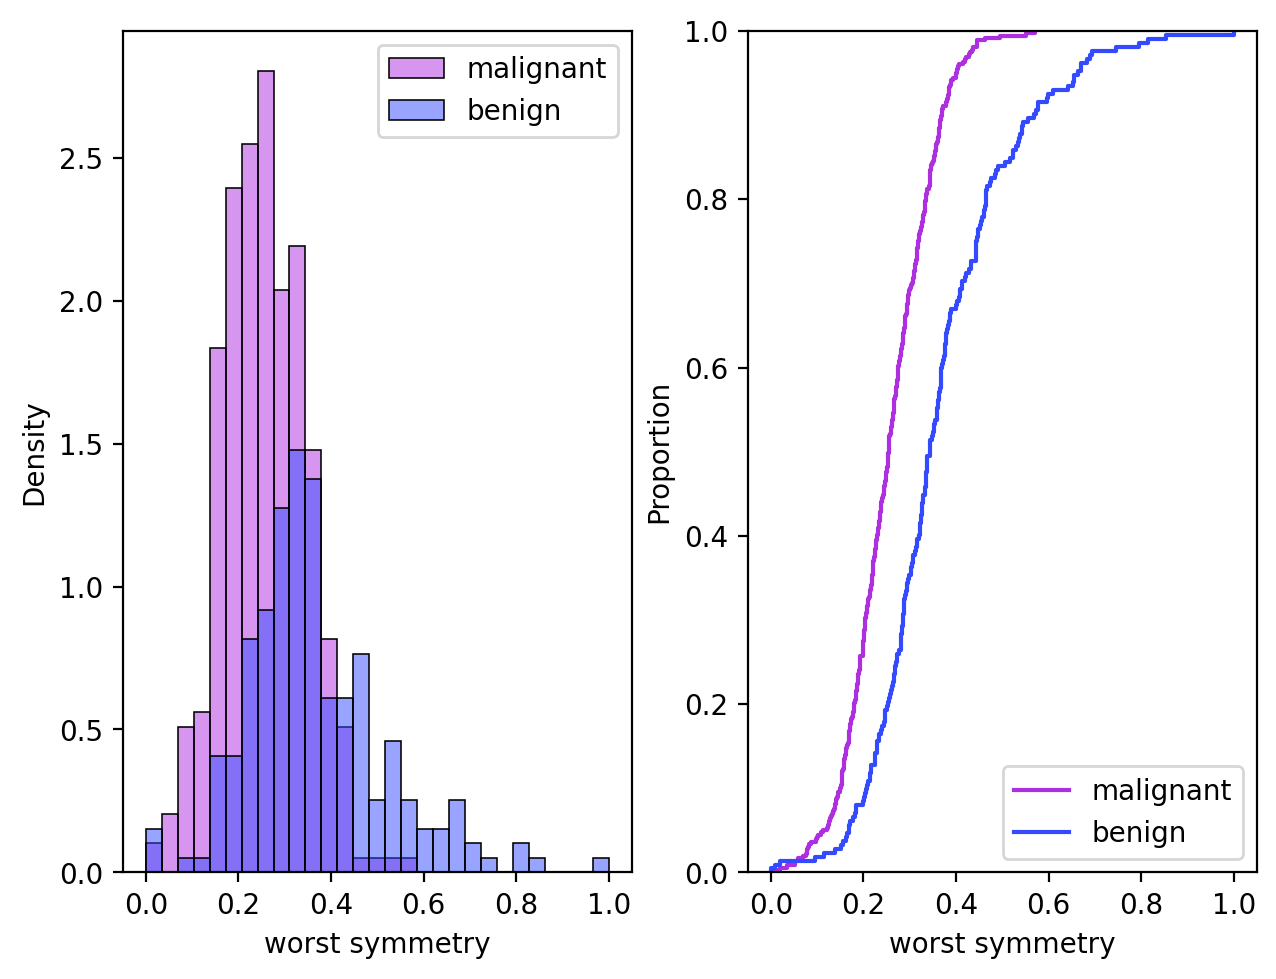

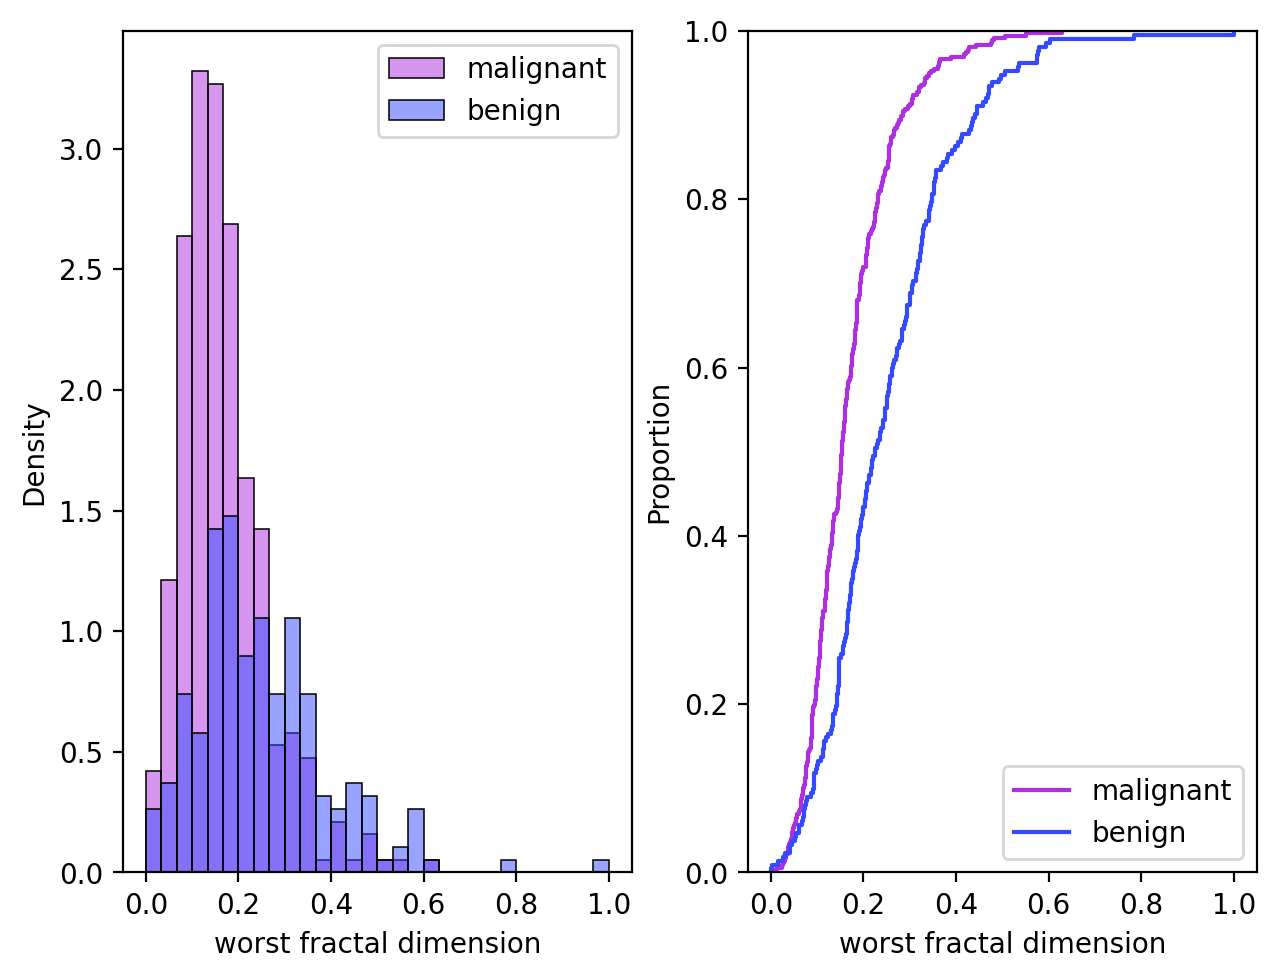

In [8]:
from scipy import stats

# Define the Feature Matrix and Target Vector
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

# Preprocessed dataset
dataset_transformed = pd.DataFrame(
    data=np.c_[pipeline_preprocessing.fit_transform(X), y],
    columns=np.append(cancer["feature_names"], ["target"])
)

for feature in cancer["feature_names"]:
    fig, ax = plt.subplots(1, 2)
    fig.tight_layout()
    
    sns.histplot(data=dataset_transformed, x=feature, ax=ax[0], hue="target", stat="density")
    sns.ecdfplot(data=dataset_transformed, x=feature, ax=ax[1], hue="target")

    # Configure individual axis
    ax[0].legend(labels = cancer["target_names"])
    ax[1].legend(labels = cancer["target_names"])
    
    plt.show()

## Our Baseline Machine Learning
Now that we are able to preprocessed our data, some of our features now were normally distributed. Let's now proceed to our first machine learning model: Logistic Regression.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

metrics = [accuracy_score, precision_score, recall_score, f1_score]

X_transformed = dataset_transformed.iloc[:,0:-1]
y_transformed = dataset_transformed.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed)

The following code below will train the logistic regression model and then shows it classification metrics.

In [10]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

y_pred = logistic_regressor.predict(X_test)

pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1"],
    "Value": [metric(y_test, y_pred) for metric in metrics]
})

Metric     Value
0   Accuracy  0.993007
1  Precision  0.989474
2     Recall  1.000000
3         F1  0.994709

> Based on above metrics, our logistic regression model works really well in data it hasn't seen before.

Once trained, we can also see the confusion matrix generated from our trained logistic regression model

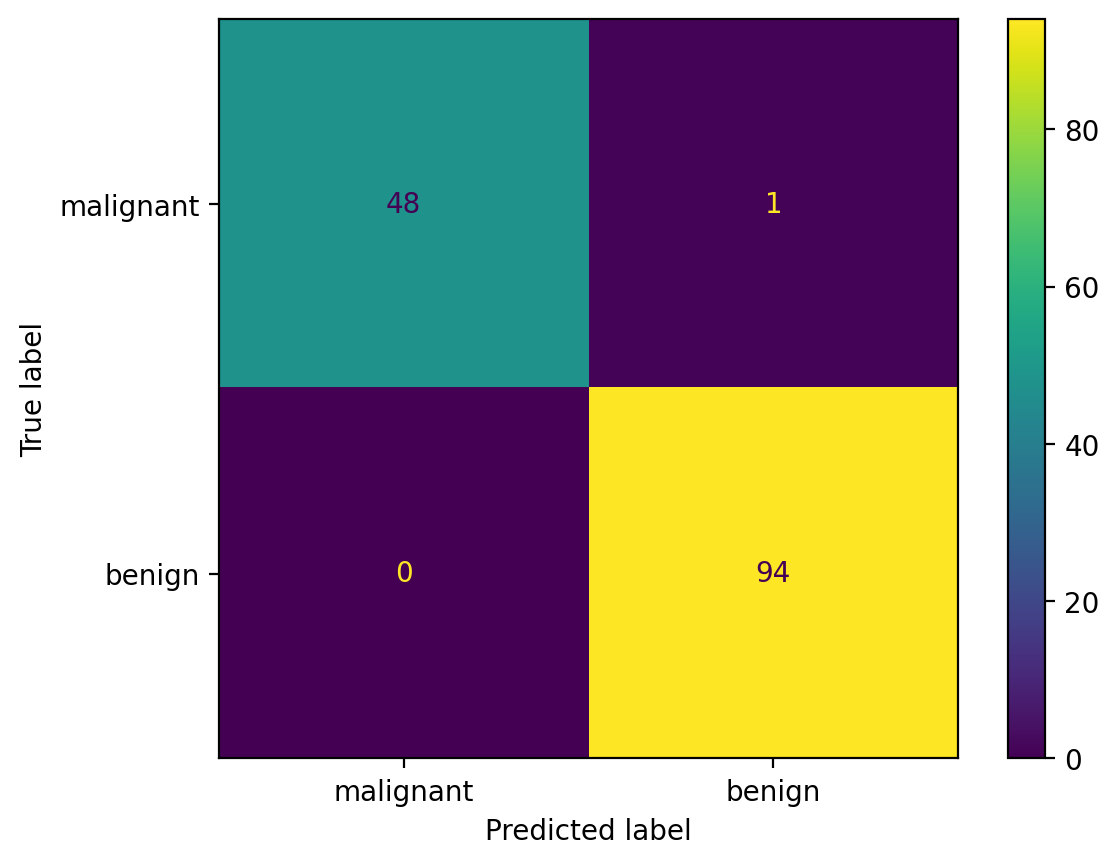

In [11]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer["target_names"]);
disp.plot();

## Seeing the Decision Boundaries
Our dataset contains more than 30 features which can be hard to visualize. In order to see the decision boundary, we can reduce the number of features down to 2 without loosing too much information. This can be achieved using principal component analysis. Once the principal components were calculated, we can plot it in a scatter plot so that we can see the decision boundaries.

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X_test)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
pca_df["target"] = y_pred

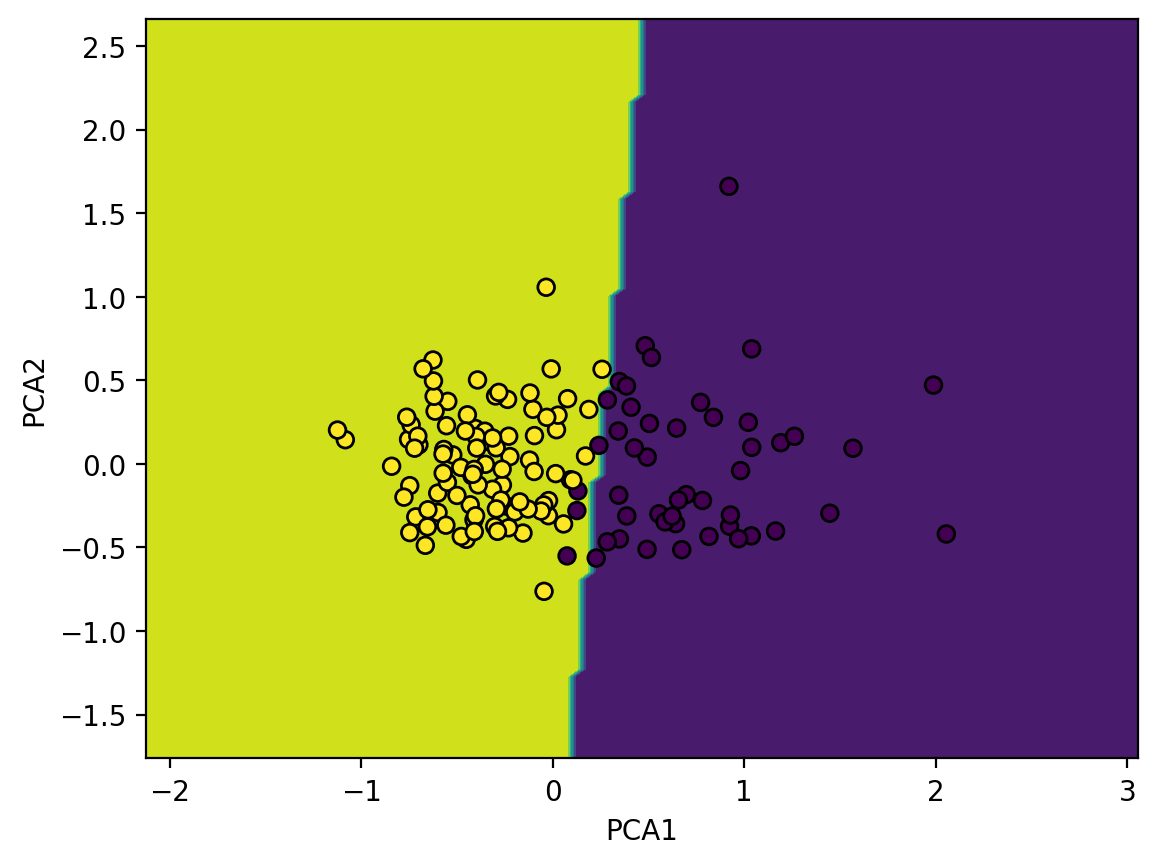

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

classifier = LogisticRegression()
classifier.fit(pca_df.values[:, 0:-1], pca_df.values[:,-1])

disp = DecisionBoundaryDisplay.from_estimator(
    classifier,
    pca_df.values[:, 0:-1],
    response_method="predict",
    xlabel="PCA1",
    ylabel="PCA2",
    # alpha=0.5,
)

disp.ax_.scatter(pca_df["PCA1"].values, pca_df["PCA2"].values, c=pca_df["target"].values, edgecolor="k");

## The Coefficients on Logistic Regression
So far, since our model's performance in predicting new data were excellent, let's check the coefficients of its log likehood.

In [14]:
log_likelihood_df = pd.DataFrame({
    "Feature": cancer["feature_names"],
    "Log-likelihood": logistic_regressor.coef_[0]
})

log_likelihood_df = log_likelihood_df.sort_values(by="Log-likelihood")
log_likelihood_df

Feature  Log-likelihood
27     worst concave points       -2.205041
21            worst texture       -1.992463
20             worst radius       -1.828464
23               worst area       -1.823643
13               area error       -1.735204
7       mean concave points       -1.720443
22          worst perimeter       -1.717410
1              mean texture       -1.532774
24         worst smoothness       -1.464192
3                 mean area       -1.316379
26          worst concavity       -1.288275
0               mean radius       -1.283919
2            mean perimeter       -1.272383
28           worst symmetry       -1.218456
6            mean concavity       -1.178367
10             radius error       -1.173720
12          perimeter error       -1.173024
25        worst compactness       -0.717097
4           mean smoothness       -0.614863
8             mean symmetry       -0.360442
29  worst fractal dimension       -0.301140
5          mean compactness       -0.255285
17     concave points error       -0.163512
14         smoothness error       -0.090091
11            texture error        0.151017
18           symmetry error        0.264706
16          concavity error        0.281405
9    mean fractal dimension        0.655313
19  fractal dimension error        0.675505
15        compactness error        0.727783

> Based on the above table, the top features that can help us determine if a tumor is malignant were `worst concave points`, `worst texture	`, `worst radius`, `worse area`, and `mean concave points`. Knowing that `0 = Malignant` and `1 = Benign`, a unit increase in these features significantly reduces the odds that a tumor is benign.

## Conclusion
In this case study, we are able to identify the top features that can help us in identifying whether a tumor is malignant or benign.
We are able to achieve that with the use of statistical learning tool called Logistic Regression. Before modelling, we addressed several data issues such as un-normalized data and unbalanced features. In order to decide which preprocessing tool to be used, we first visualized the data in order to identify potential data issues.

Since we are only using a dummy dataset, in this case study we are not able to perform some tasks such as dealing with missing values, and outliers.
Since the baseline model was already performing excellently, we did not proceed to other machine learning tasks such as feature selection, model tuning, and model selection.